Data source:https://www.kaggle.com/datasets/purumalgi/music-genre-classification
https://machinehack.com/hackathons/music_genre_classification_weekend_hackathon_edition_2_the_last_hacker_standing/overview

Part 1. Exploratory Data Analysis (EDA)

The description of variables(columns)

Artist Name: The name of the artist who performed or created the track. This is a categorical text variable, useful for identifying tracks by specific artists.

Track Name: The title of the music track. Like 'Artist Name', this is a categorical text variable and can be used to identify specific songs or styles within an artist's work.

Popularity: A numerical score typically ranging from 0 to 100 that reflects the current popularity of the track. Higher values indicate greater popularity.

Danceability: A measure from 0.0 to 1.0 indicating how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and overall regularity. Higher values suggest the track is more danceable.

Energy: A measure from 0.0 to 1.0 that represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

Key: The key the track is in, encoded as integers where C=0, C#=1, D=2, etc., up to B=11. It can reflect the tonal center of the music.

Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for understanding the relative loudness of tracks in a dataset.

Mode: Indicates the modality (major or minor) of a track, derived from the scale used. Mode is binary (0 = minor, 1 = major), and major is generally associated with a happier and brighter sound.

Speechiness: Measures the presence of spoken words in a track. A higher value indicates that the track contains more spoken word content (e.g., talk shows, audio books, poetry).

Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic. Higher values represent a higher likelihood the track is acoustic.

Instrumentalness: Predicts whether a track contains no vocals. Values closer to 1.0 indicate the track contains no vocal content (instrumental), which might be important for certain applications like background music.

Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric).

Tempo: The overall estimated tempo of a track in beats per minute (BPM). Tempo is a useful feature for genre classification as certain genres often fall into specific tempo ranges.

Duration in min/ms: The length of the track either in minutes or milliseconds, a numeric variable that can influence the structure and style of a track.

Time Signature: A notational convention to specify how many beats are in each bar (or measure). Common time signatures include 4 (common time), which is very typical in most forms of music.

Class: This is the target variable for classification tasks. It likely represents a numeric encoding of different music genres or classes.

Class label meanings:

Acoustic/Folk:0

Alt_Music:1

Blues: 2

Bollywood:3

Country:4

HipHop:5

Indie Alt:6

Instrumental: 7

Metal:8

Pop:9

Rock:10


In [7]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv("music.csv")
print(df.dtypes)

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object


In [8]:
print(df.head(10))
print(f"We have {df.shape[0]} rows and {df.shape[1]} columns.") #number of rows and columns

                 Artist Name                             Track Name  \
0                 Bruno Mars  That's What I Like (feat. Gucci Mane)   
1                     Boston                           Hitch a Ride   
2              The Raincoats                     No Side to Fall In   
3                       Deno             Lingo (feat. J.I & Chunkz)   
4      Red Hot Chili Peppers      Nobody Weird Like Me - Remastered   
5                The Stooges      Search and Destroy - Iggy Pop Mix   
6              Solomon Burke                    None Of Us Are Free   
7               Randy Travis                      On the Other Hand   
8  Professional Murder Music                                   Slow   
9                Dudu Aharon        ◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î   

   Popularity  danceability  energy   key  loudness  mode  speechiness  \
0        60.0         0.854   0.564   1.0    -4.964     1       0.0485   
1        54.0         0.382   0.814   3.0    -7.230     1       0.0406

For reference: in many audio contexts, loudness values can be negative because they are typically measured relative to a reference level (often 0 dB), which is the threshold of hearing. Therefore, many musical tracks may have loudness values between -60 dB and 0 dB, where 0 dB is the loudest sound before distortion occurs. We don't need to change the negative values to positive. 

In [9]:
 #we also need to unify the unit of the duration
df["duration_in min/ms"] = np.where(df["duration_in min/ms"] < 100, df["duration_in min/ms"] * 60000, df["duration_in min/ms"])
df.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace=True)
print(df.head(10))

                 Artist Name                             Track Name  \
0                 Bruno Mars  That's What I Like (feat. Gucci Mane)   
1                     Boston                           Hitch a Ride   
2              The Raincoats                     No Side to Fall In   
3                       Deno             Lingo (feat. J.I & Chunkz)   
4      Red Hot Chili Peppers      Nobody Weird Like Me - Remastered   
5                The Stooges      Search and Destroy - Iggy Pop Mix   
6              Solomon Burke                    None Of Us Are Free   
7               Randy Travis                      On the Other Hand   
8  Professional Murder Music                                   Slow   
9                Dudu Aharon        ◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î   

   Popularity  danceability  energy   key  loudness  mode  speechiness  \
0        60.0         0.854   0.564   1.0    -4.964     1       0.0485   
1        54.0         0.382   0.814   3.0    -7.230     1       0.0406

In [10]:
inds = df.columns
for i in inds:
    print(df[i].describe())

count               17996
unique               9149
top       Backstreet Boys
freq                   69
Name: Artist Name, dtype: object
count      17996
unique     15129
top       Dreams
freq           9
Name: Track Name, dtype: object
count    17568.000000
mean        44.512124
std         17.426928
min          1.000000
25%         33.000000
50%         44.000000
75%         56.000000
max        100.000000
Name: Popularity, dtype: float64
count    17996.000000
mean         0.543433
std          0.166268
min          0.059600
25%          0.432000
50%          0.545000
75%          0.659000
max          0.989000
Name: danceability, dtype: float64
count    17996.000000
mean         0.662777
std          0.235373
min          0.000020
25%          0.509000
50%          0.700000
75%          0.860000
max          1.000000
Name: energy, dtype: float64
count    15982.000000
mean         5.952447
std          3.196854
min          1.000000
25%          3.000000
50%          6.000000
75%   

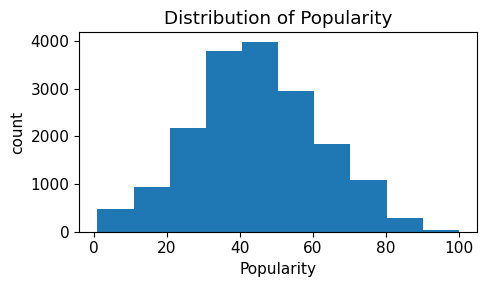

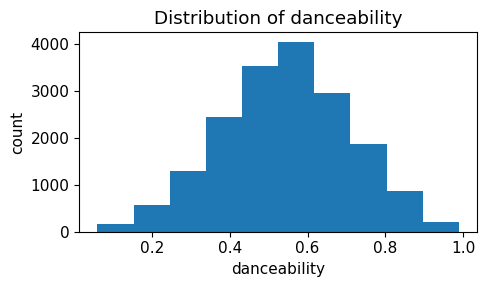

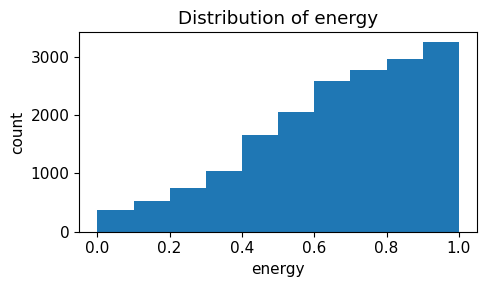

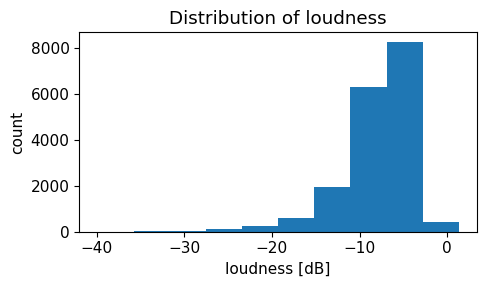

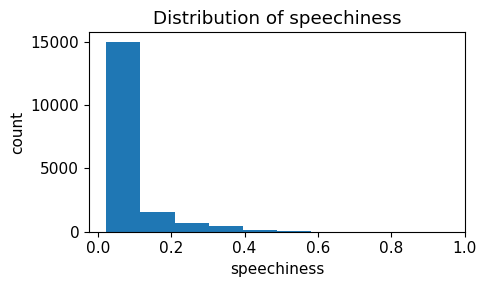

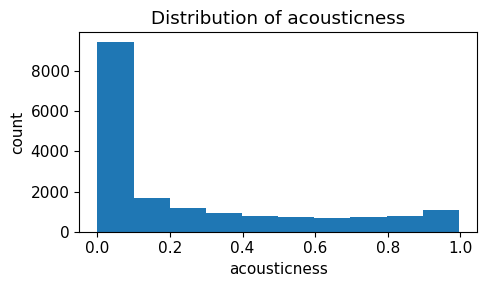

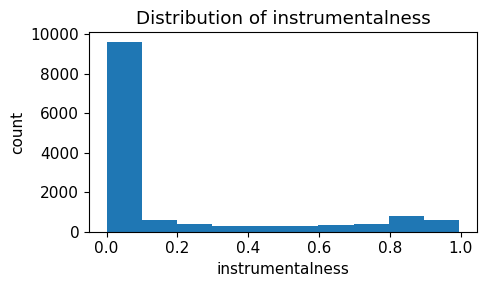

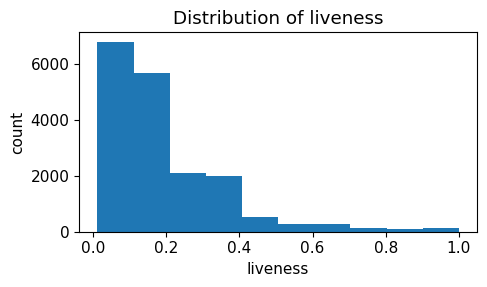

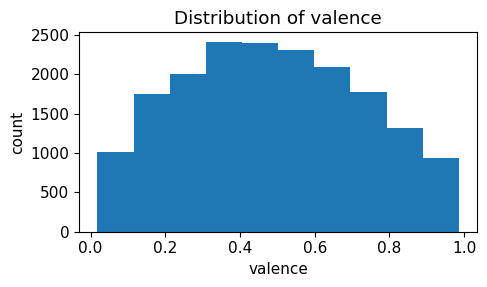

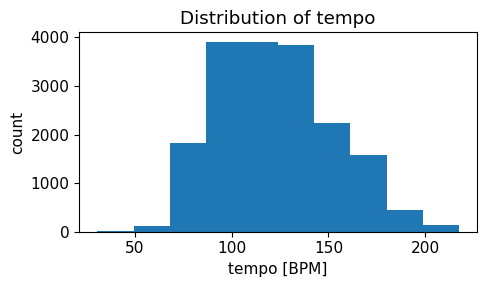

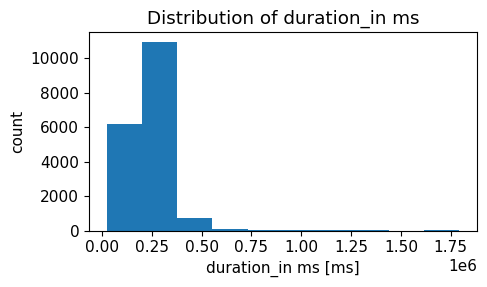

In [11]:
#plotting histograms for continuous variables/features
for i in ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_in ms"]:
    plt.figure(figsize = (5,3))
    df[i].plot.hist()
    if i == "tempo":
        plt.xlabel(f"{i} [BPM]")
    elif i == "duration_in ms":
        plt.xlabel(f"{i} [ms]")
    elif i == "loudness":
        plt.xlabel(f"{i} [dB]")
    else: 
        plt.xlabel(f"{i}")
    plt.ylabel("count")
    plt.title(f"Distribution of {i}")
    plt.tight_layout()
    plt.show()

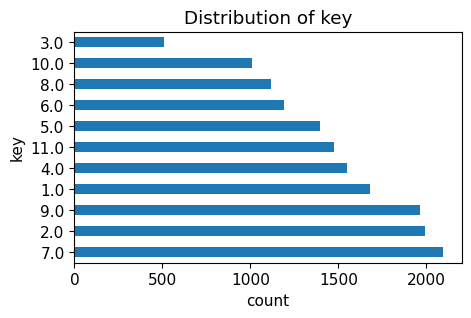

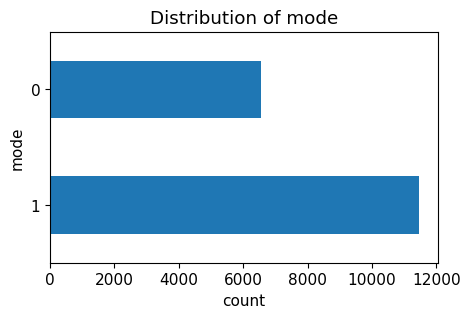

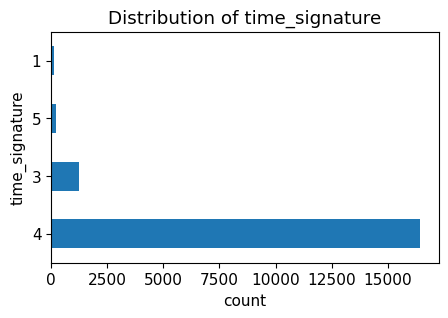

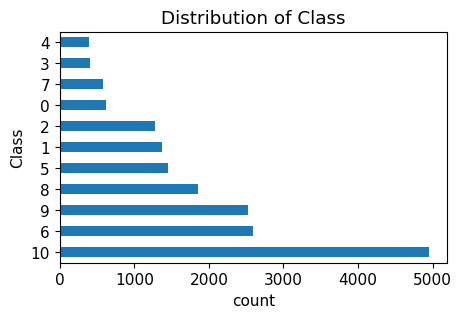

In [12]:
#plotting bar plots for categorical variables/features and the target variable class
for i in ["key","mode","time_signature","Class"]:
    plt.figure(figsize = (5,3))
    df[i].value_counts().plot.barh()
    plt.xlabel("count")
    plt.ylabel(f"{i}")
    plt.title(f"Distribution of {i}")
    plt.show

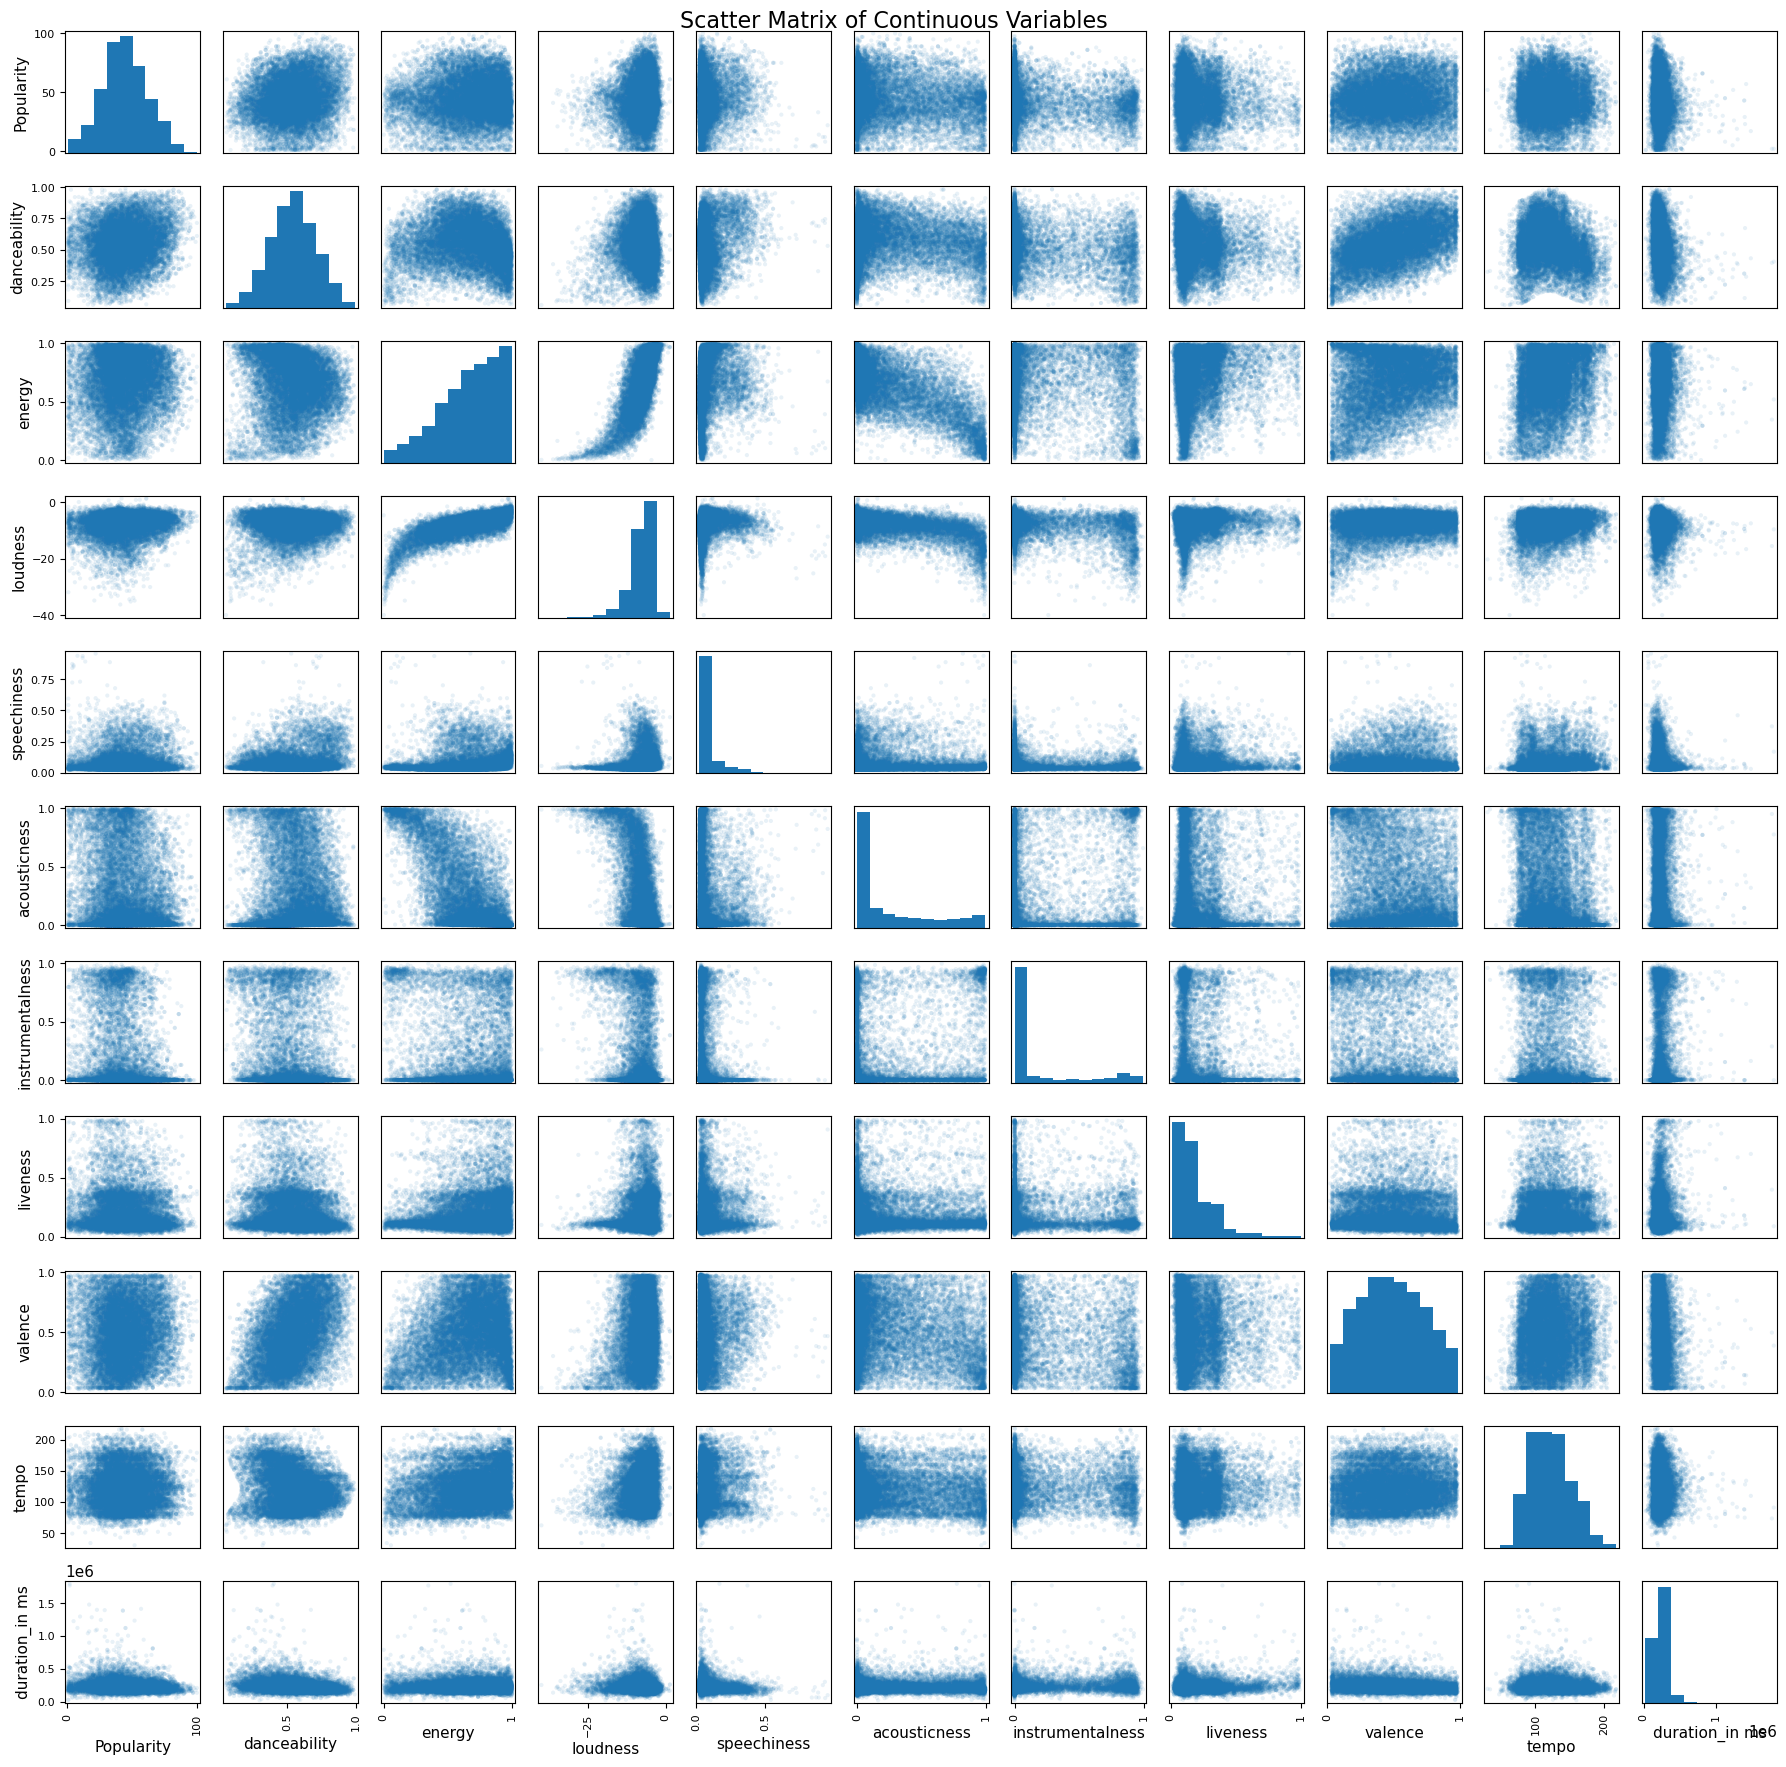

In [13]:
#more EDAs on relationships between features
#continuous vs continuous
from pandas.plotting import scatter_matrix
vars_cont = ["Popularity", "danceability", "energy", "loudness", "speechiness", 
             "acousticness", "instrumentalness", "liveness", "valence", 
             "tempo", "duration_in ms"]
scatter_matrix(df[vars_cont], figsize=(18, 18), alpha=0.1)
plt.suptitle('Scatter Matrix of Continuous Variables', fontsize=16)
plt.tight_layout()
plt.show()

(I also wrote codes for the individual scatterplots:)
import itertools

vars_cont = ["Popularity", "danceability", "energy", "loudness", "speechiness", 
             "acousticness", "instrumentalness", "liveness", "valence", 
             "tempo", "duration_in min/ms"]

pairs = itertools.combinations(vars_cont, 2)

for (i, k) in pairs:

    df.plot.scatter(i, k, figsize=(5, 3), alpha=0.1)

    plt.title(f"{k} vs {i}")

    plt.show()

It seems like there's a positive correlation between valence and danceability，loudness and energy, and a negative correlation between acousticness and energy. 
I will dive deeper later using correlation matrix as well as f_classif when Class is involved.

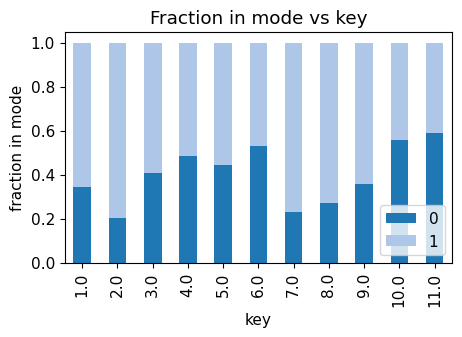

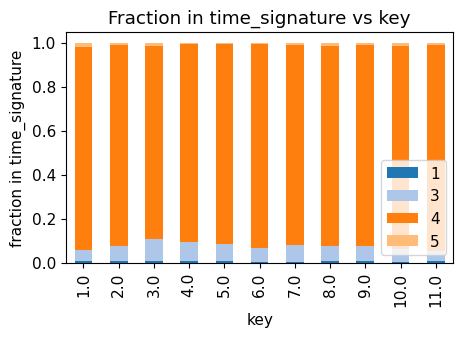

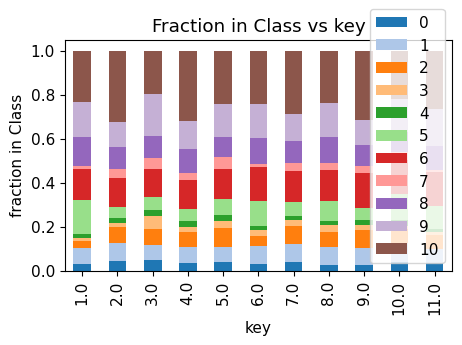

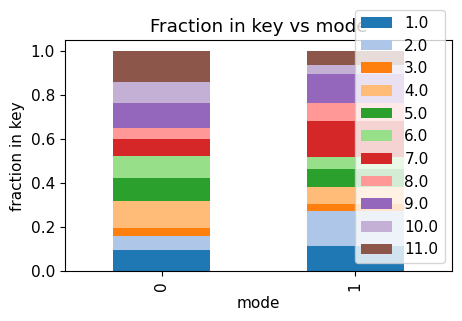

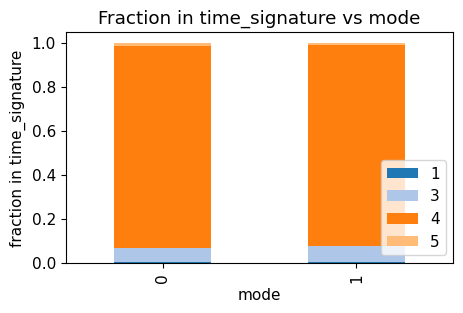

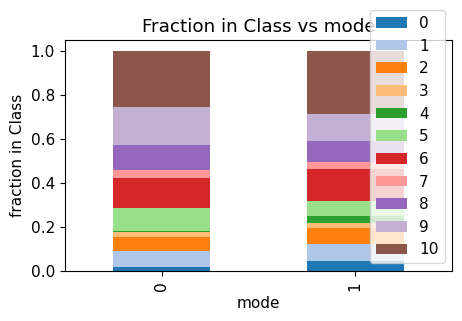

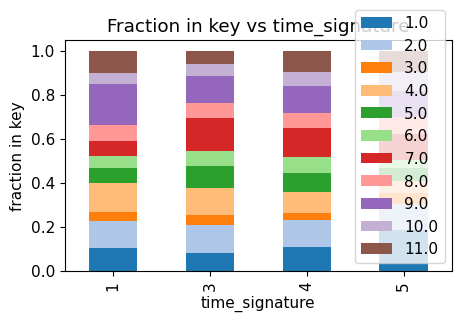

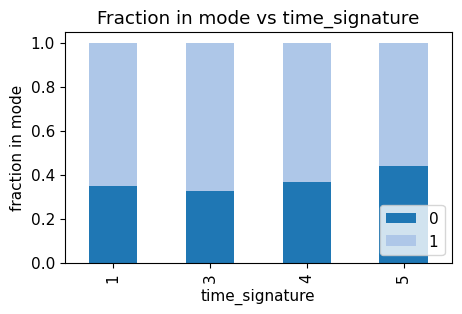

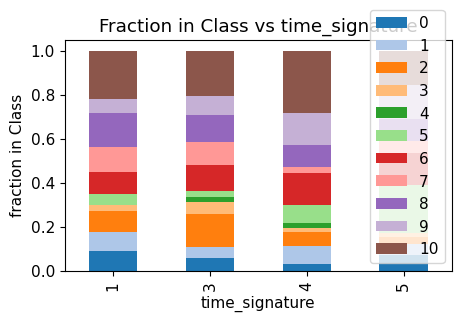

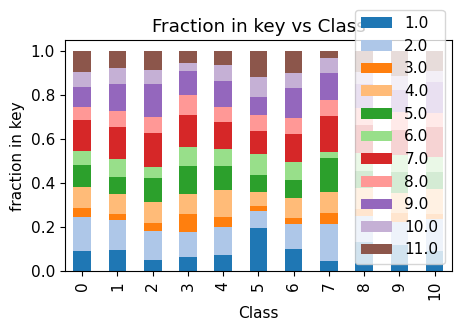

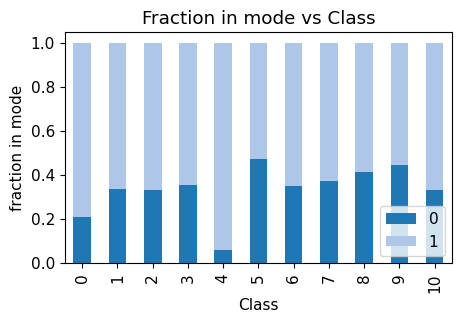

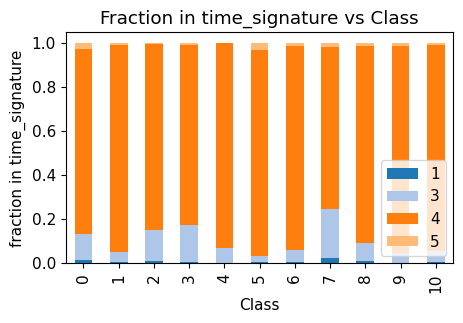

In [14]:
#categorical vs categorical 
vars_cat = ["key","mode","time_signature","Class"]
num_colors = max(len(df[col].unique()) for col in vars_cat)
colors = plt.cm.tab20(range(num_colors))
for i in ["key","mode","time_signature","Class"]:   
    for k in ["key","mode","time_signature","Class"]:
        if i != k:
            count_matrix = df.groupby([i, k]).size().unstack()
            count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
            count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5, 3), color=colors)
            plt.ylabel(f"fraction in {k}")
            plt.title(f"Fraction in {k} vs {i}")
            plt.legend(loc=4)
            plt.show()

From fraction in mode vs class graph, we could find that the songs in country music(4) is disproportionally(more than 90%) written in mode1, which refers to a major key. Similarly, acoustic/folk music songs are around 80% written in a major key.

<Figure size 800x500 with 0 Axes>

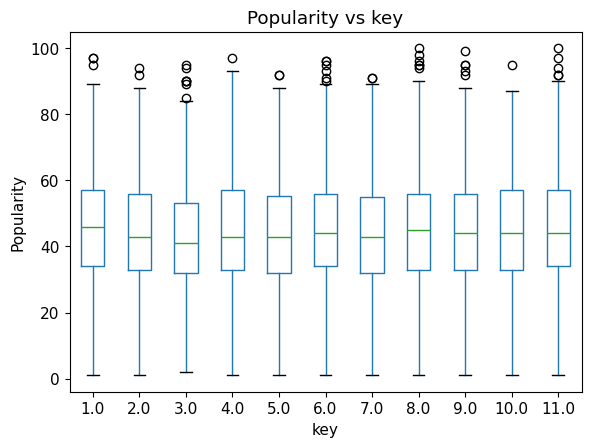

<Figure size 800x500 with 0 Axes>

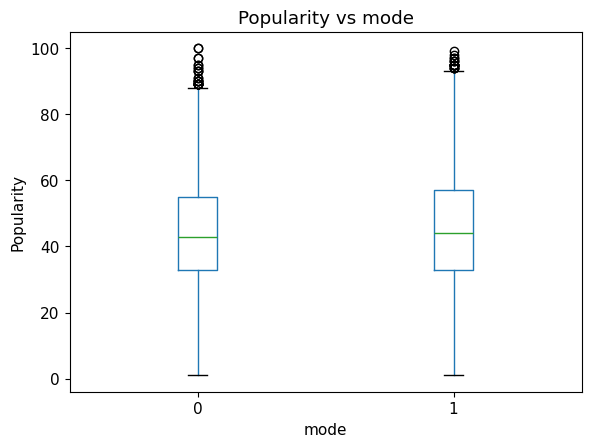

<Figure size 800x500 with 0 Axes>

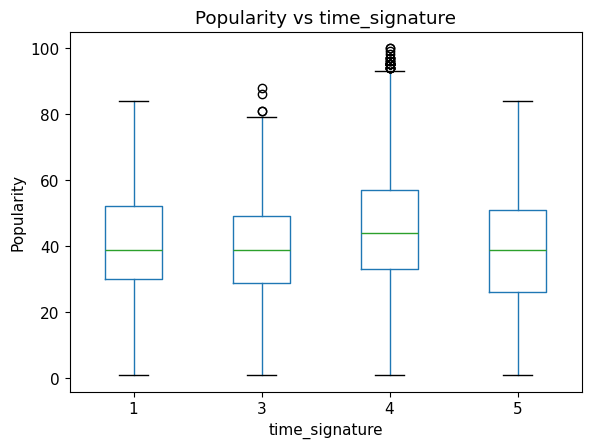

<Figure size 800x500 with 0 Axes>

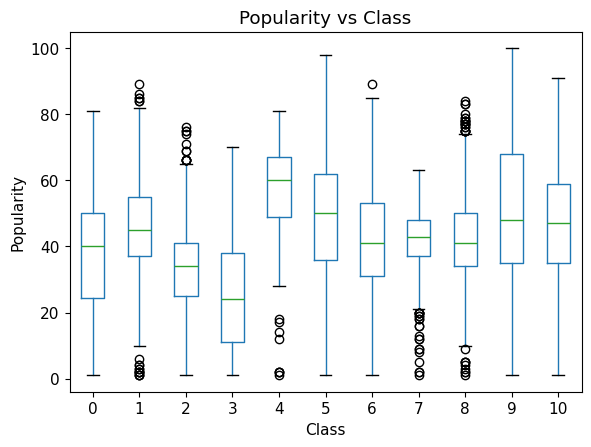

<Figure size 800x500 with 0 Axes>

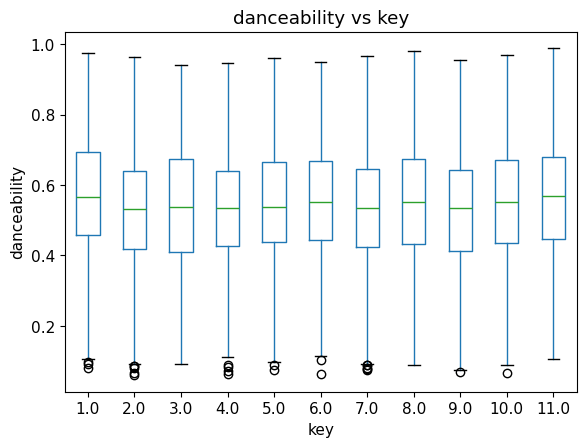

<Figure size 800x500 with 0 Axes>

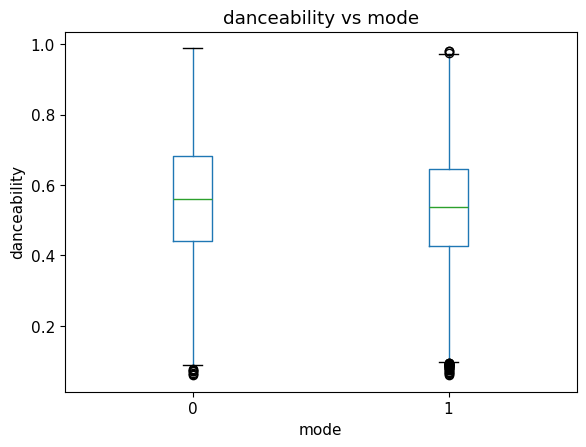

<Figure size 800x500 with 0 Axes>

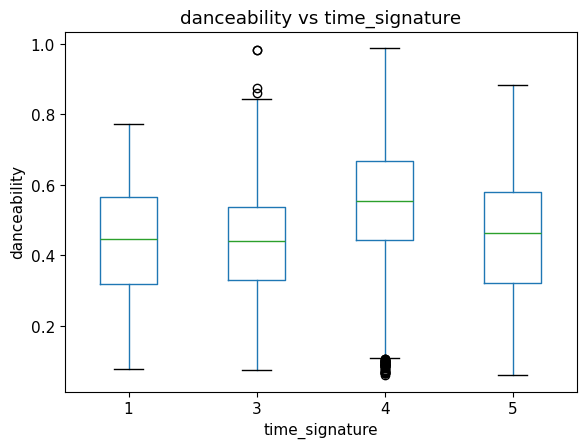

<Figure size 800x500 with 0 Axes>

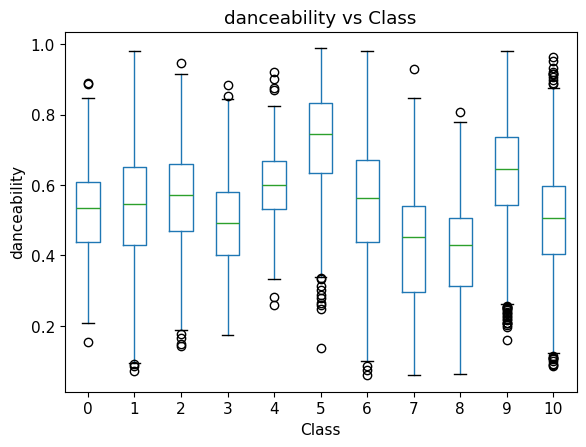

<Figure size 800x500 with 0 Axes>

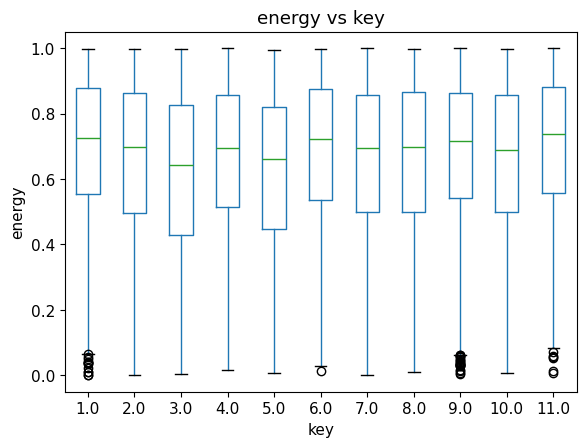

<Figure size 800x500 with 0 Axes>

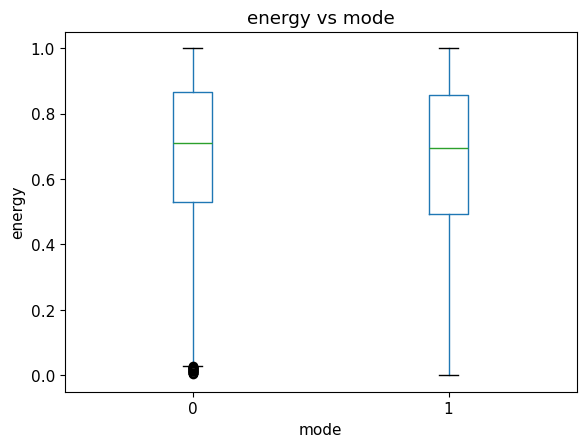

<Figure size 800x500 with 0 Axes>

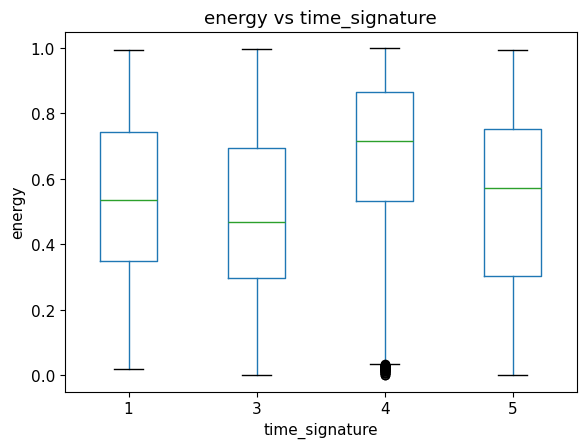

<Figure size 800x500 with 0 Axes>

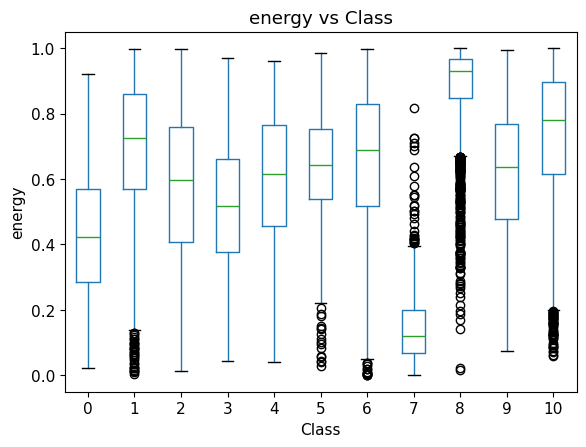

<Figure size 800x500 with 0 Axes>

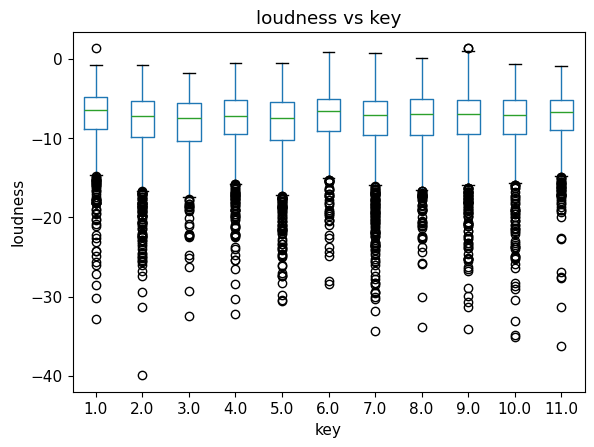

<Figure size 800x500 with 0 Axes>

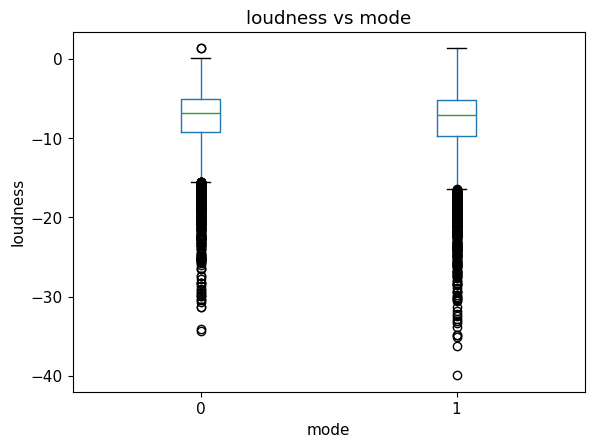

<Figure size 800x500 with 0 Axes>

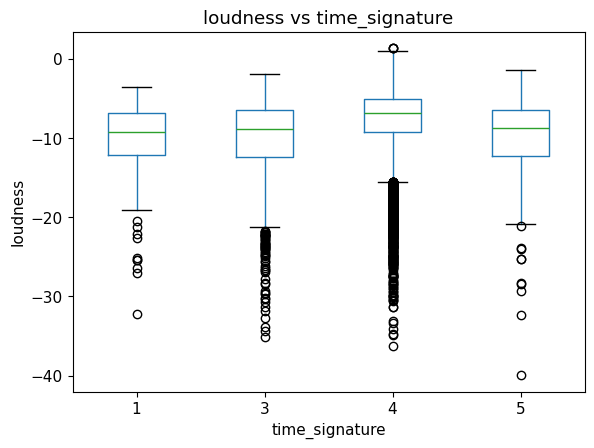

<Figure size 800x500 with 0 Axes>

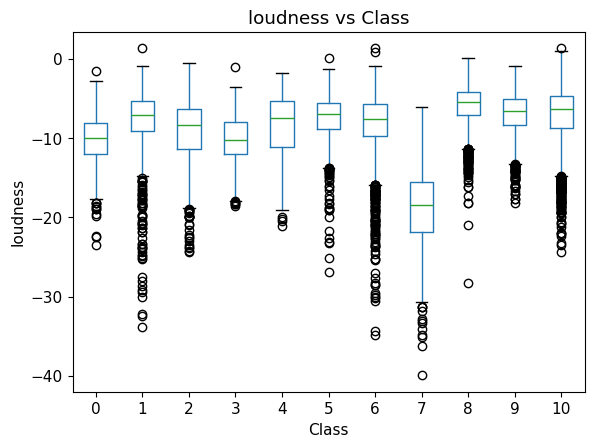

<Figure size 800x500 with 0 Axes>

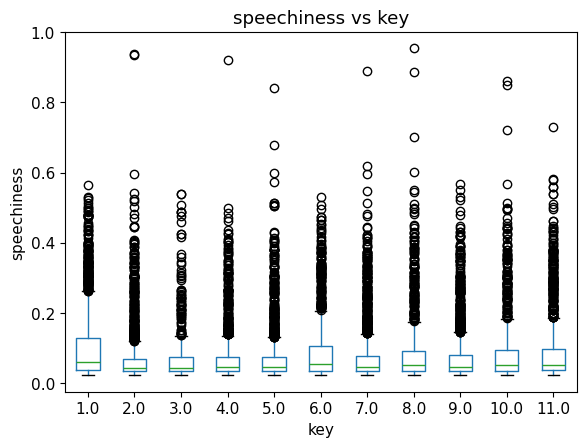

<Figure size 800x500 with 0 Axes>

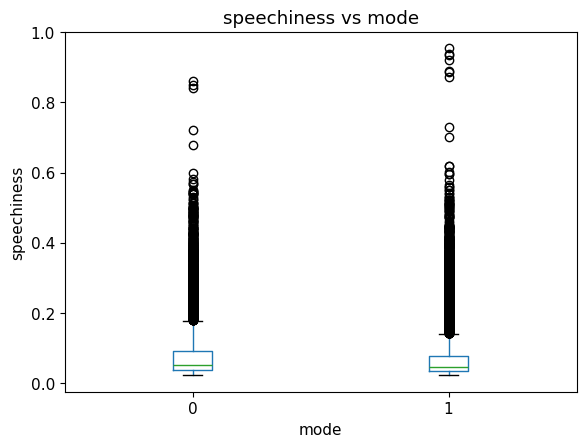

<Figure size 800x500 with 0 Axes>

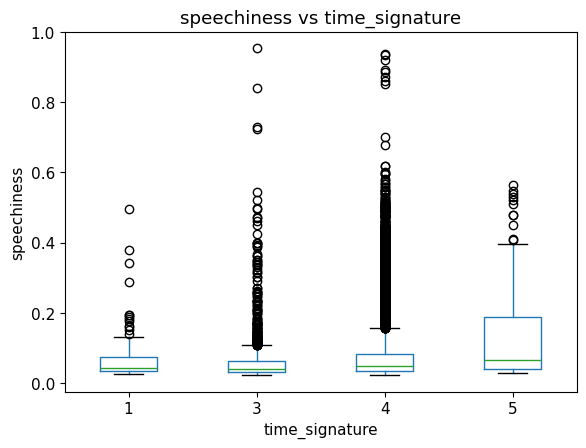

<Figure size 800x500 with 0 Axes>

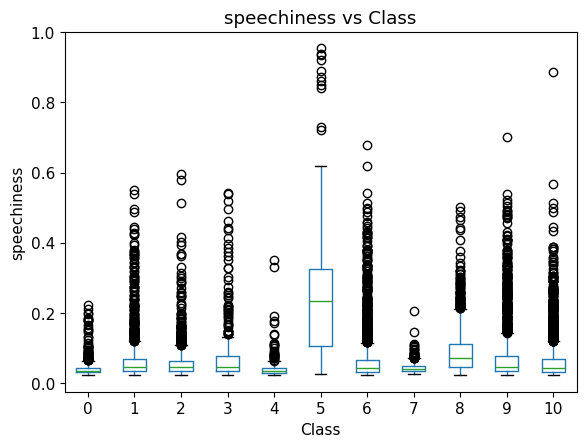

<Figure size 800x500 with 0 Axes>

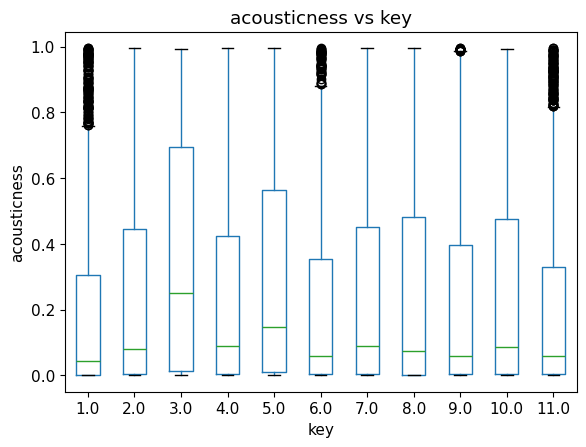

<Figure size 800x500 with 0 Axes>

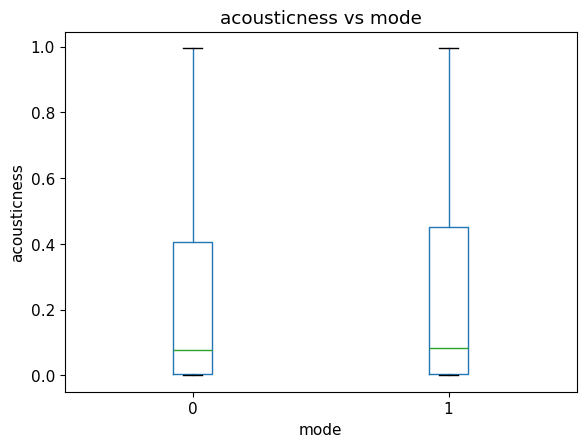

<Figure size 800x500 with 0 Axes>

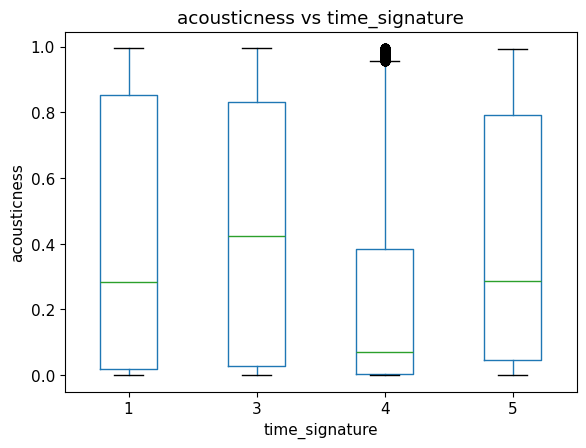

<Figure size 800x500 with 0 Axes>

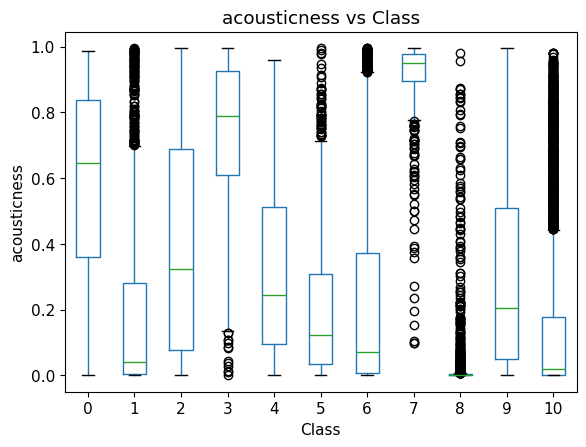

<Figure size 800x500 with 0 Axes>

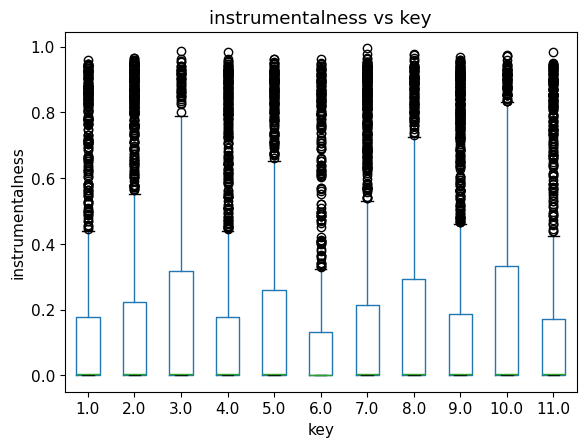

<Figure size 800x500 with 0 Axes>

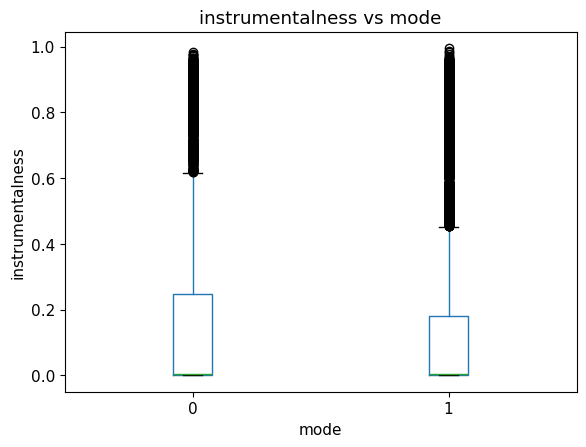

<Figure size 800x500 with 0 Axes>

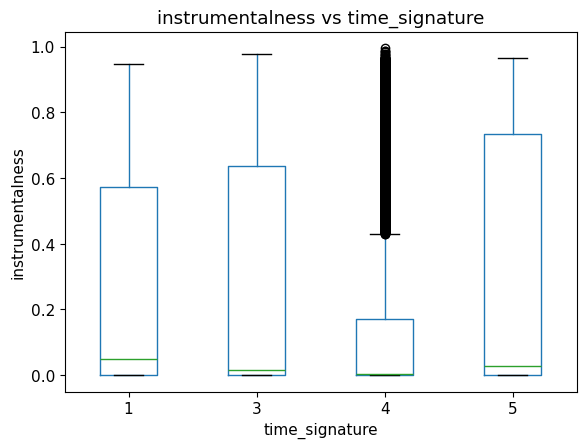

<Figure size 800x500 with 0 Axes>

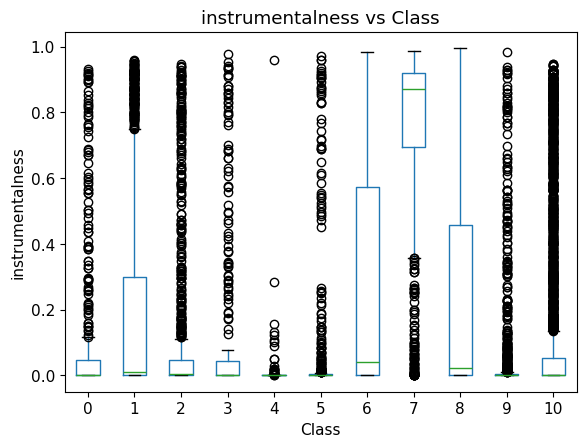

<Figure size 800x500 with 0 Axes>

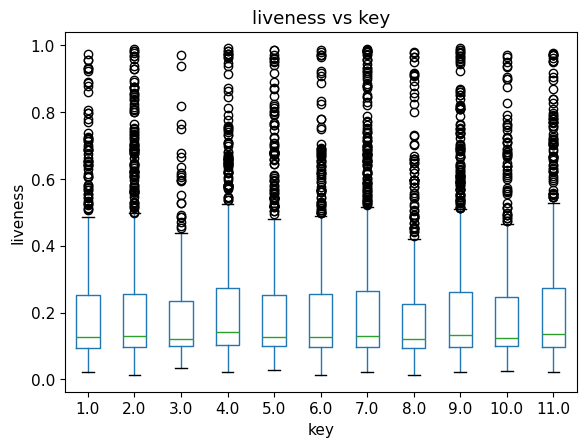

<Figure size 800x500 with 0 Axes>

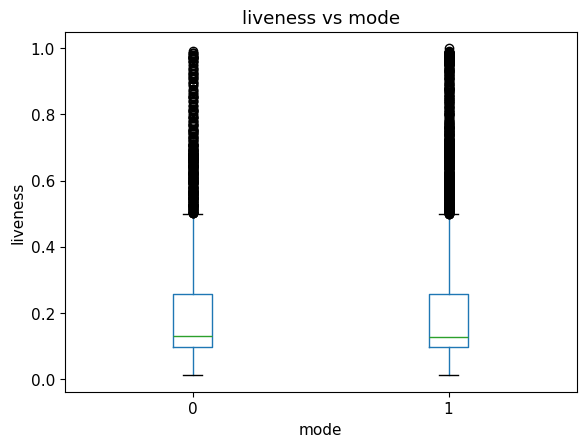

<Figure size 800x500 with 0 Axes>

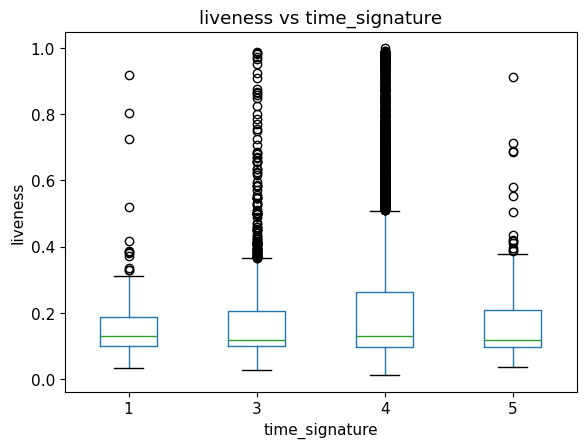

<Figure size 800x500 with 0 Axes>

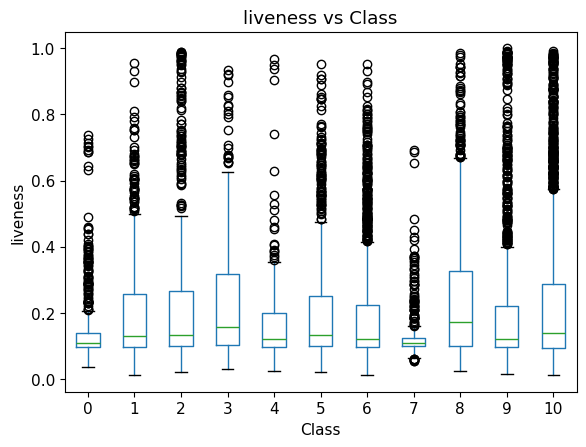

<Figure size 800x500 with 0 Axes>

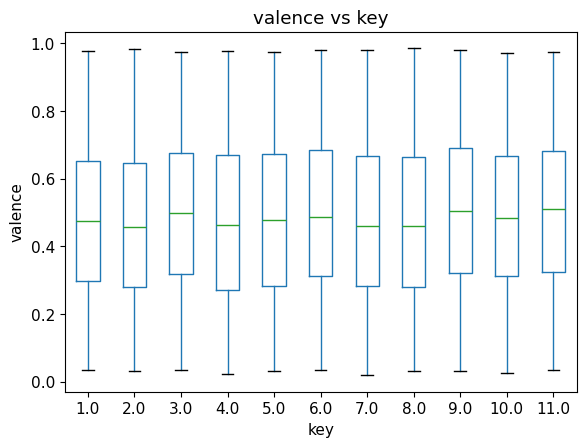

<Figure size 800x500 with 0 Axes>

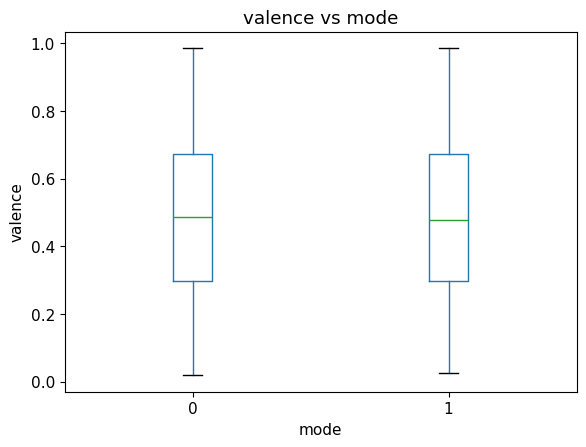

<Figure size 800x500 with 0 Axes>

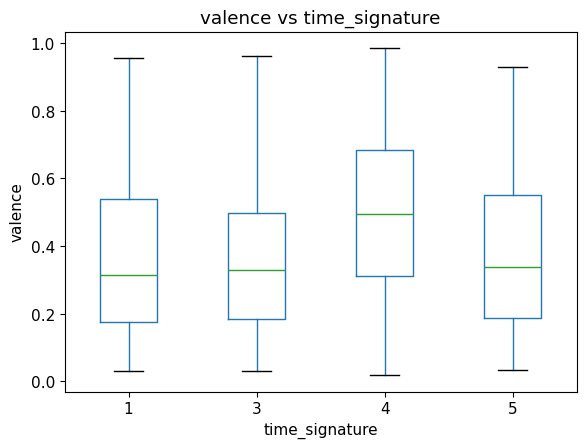

<Figure size 800x500 with 0 Axes>

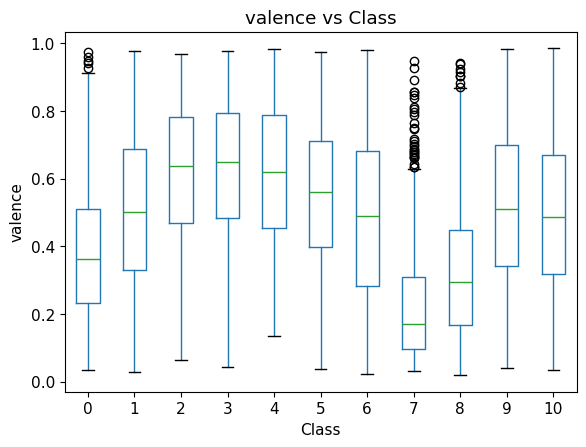

<Figure size 800x500 with 0 Axes>

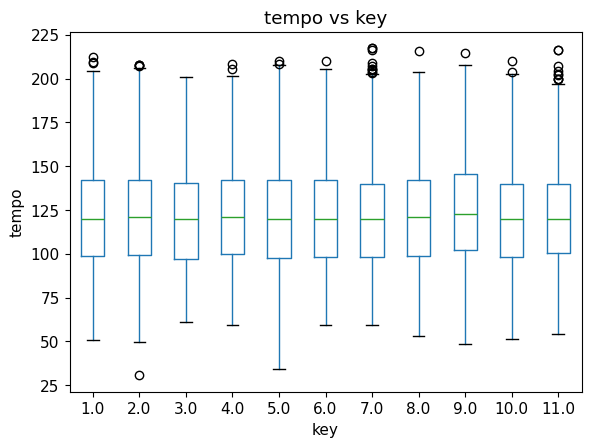

<Figure size 800x500 with 0 Axes>

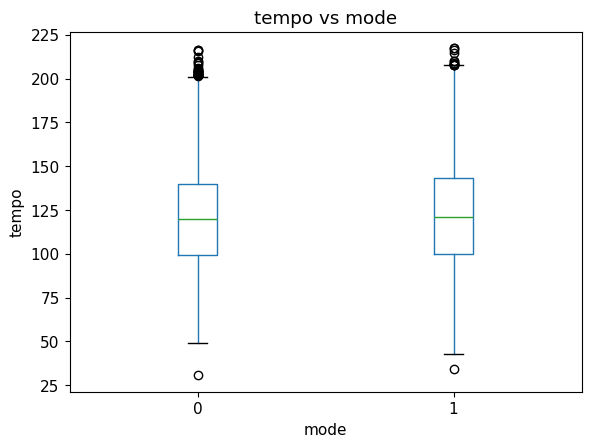

<Figure size 800x500 with 0 Axes>

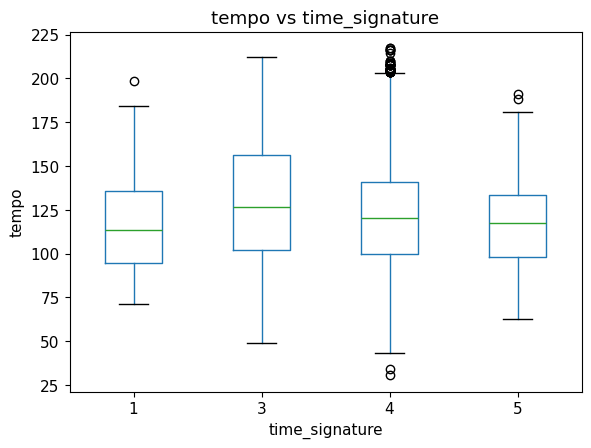

<Figure size 800x500 with 0 Axes>

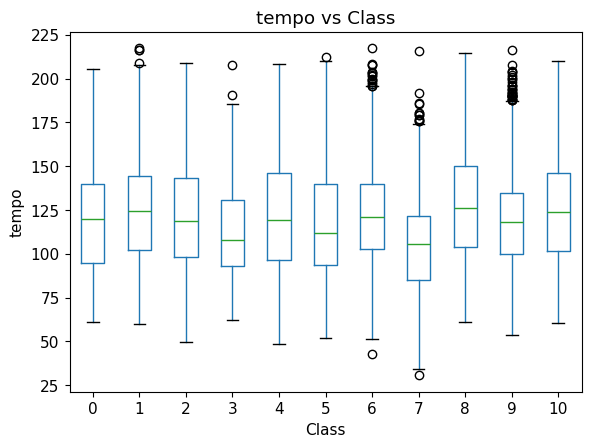

<Figure size 800x500 with 0 Axes>

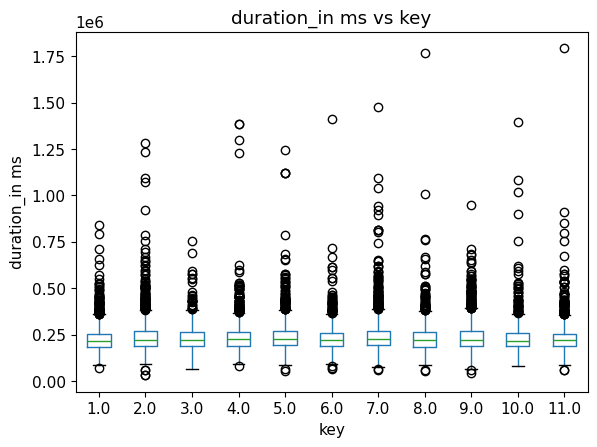

<Figure size 800x500 with 0 Axes>

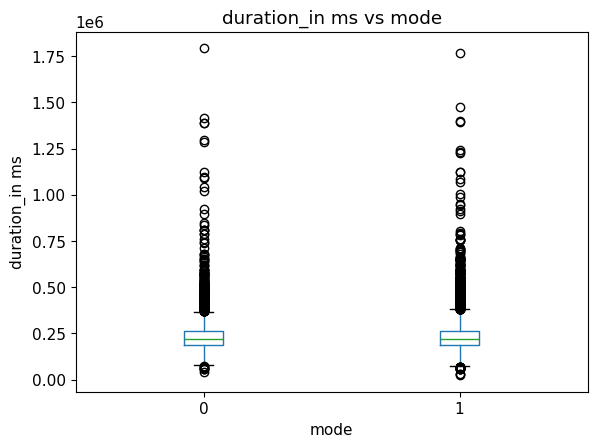

<Figure size 800x500 with 0 Axes>

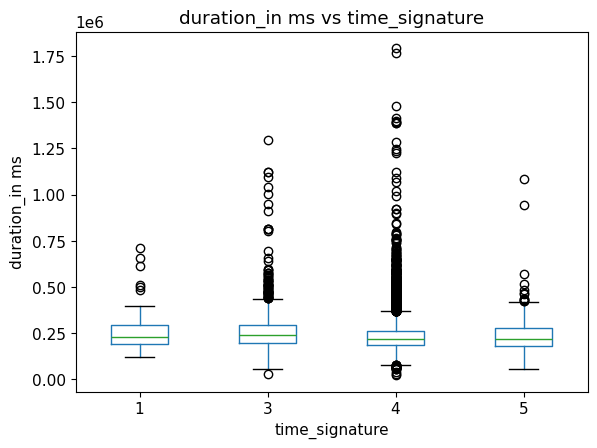

<Figure size 800x500 with 0 Axes>

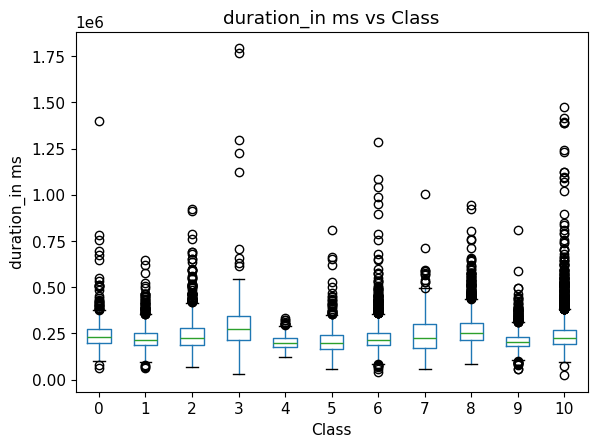

In [15]:
#continuous vs categorical
#box plots
for var_cont in vars_cont:
    for var_cat in vars_cat:
        plt.figure(figsize=(8, 5))
        df.boxplot(column=var_cont, by=var_cat, grid=False)
        plt.title(f"{var_cont} vs {var_cat}")
        plt.suptitle("") 
        plt.ylabel(var_cont)
        plt.xlabel(var_cat)
        plt.show()

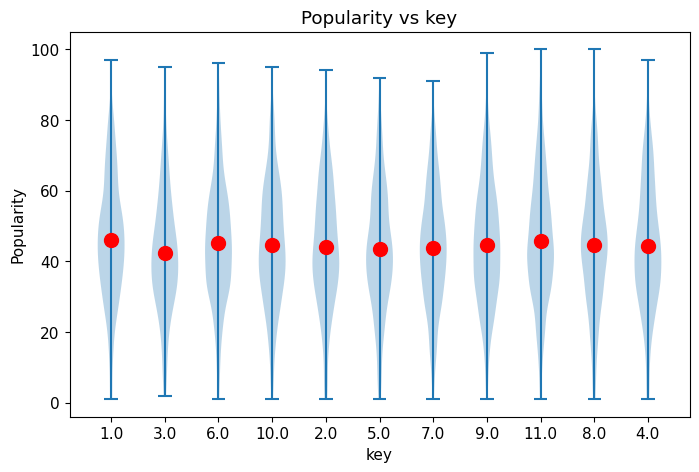

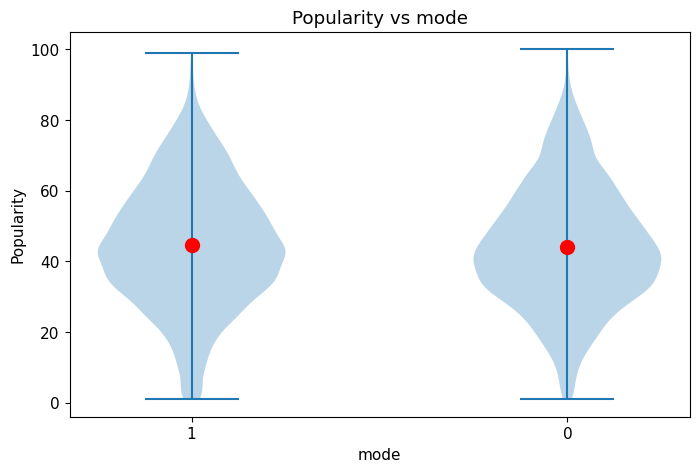

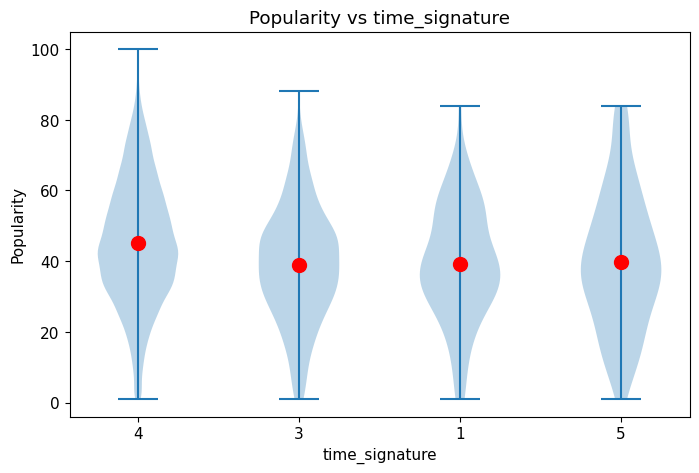

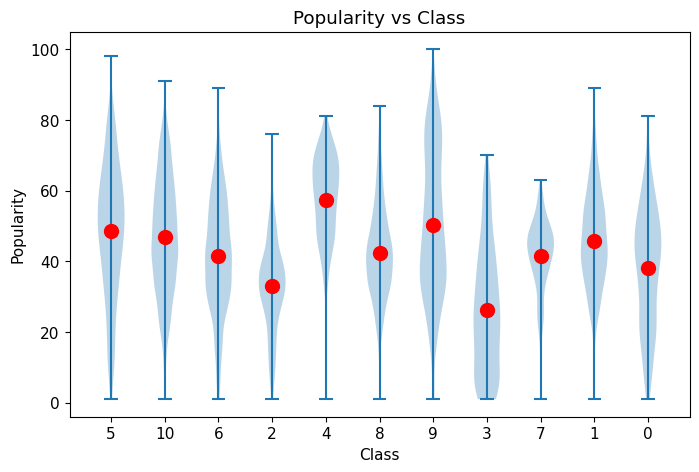

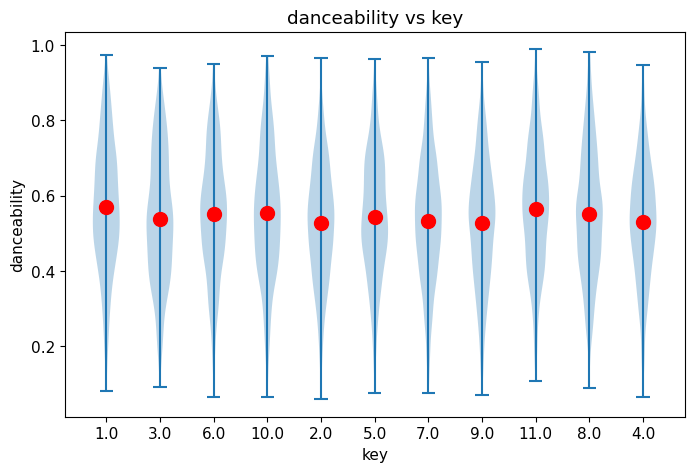

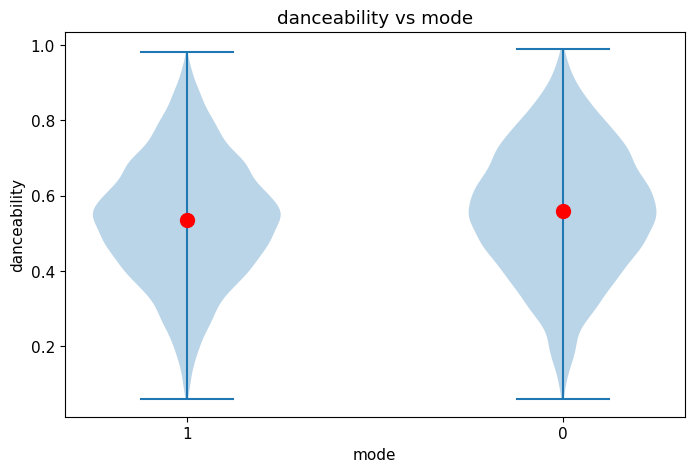

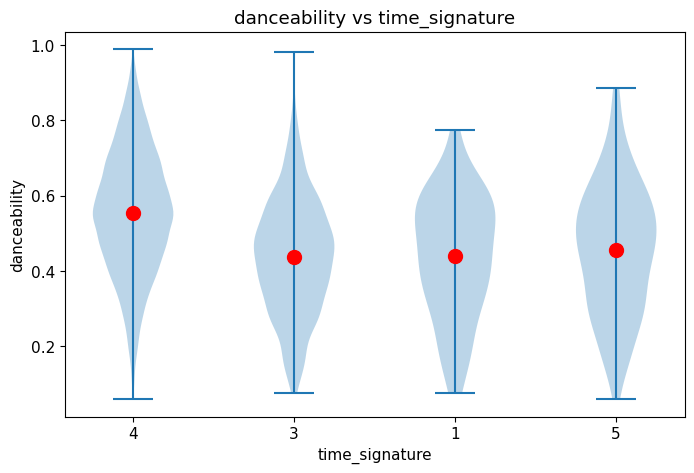

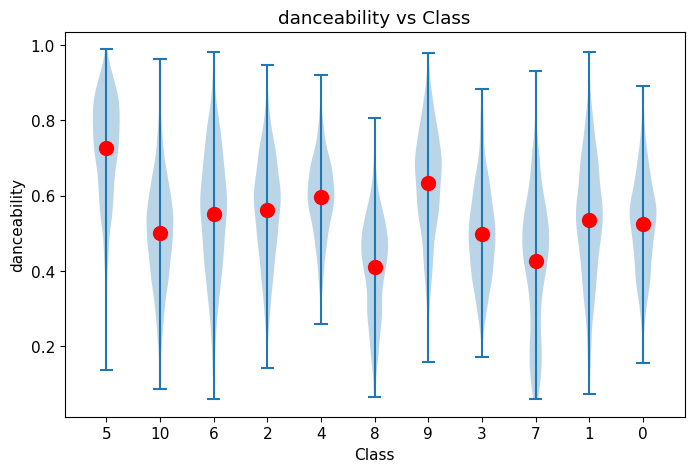

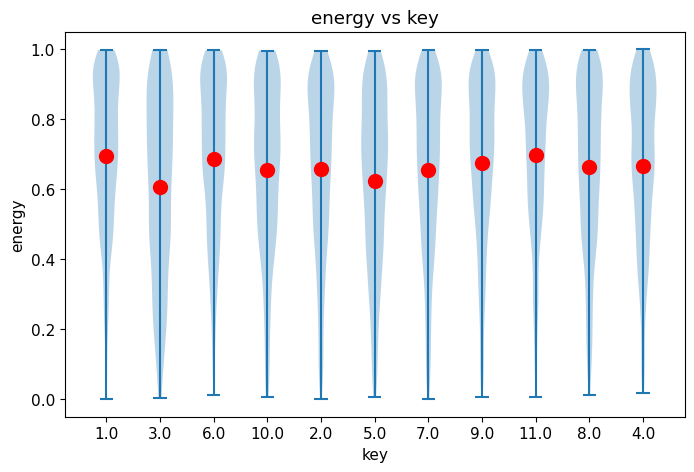

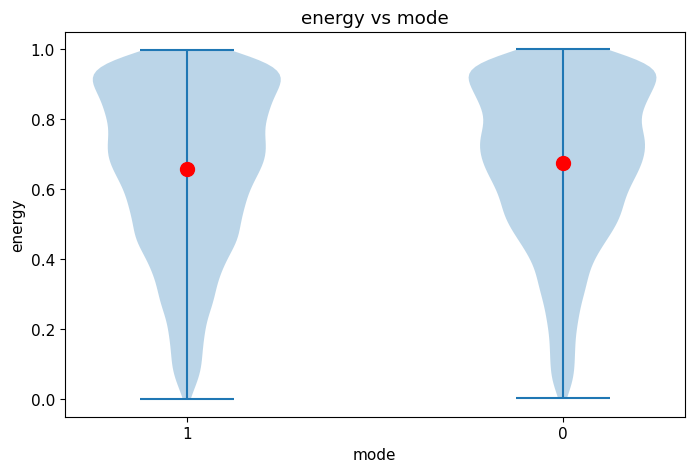

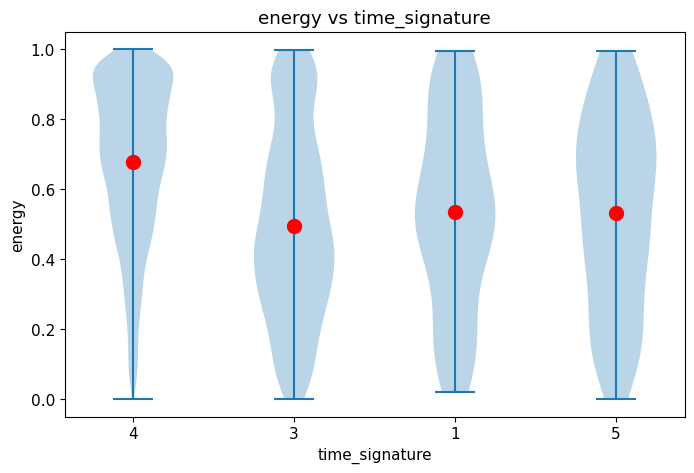

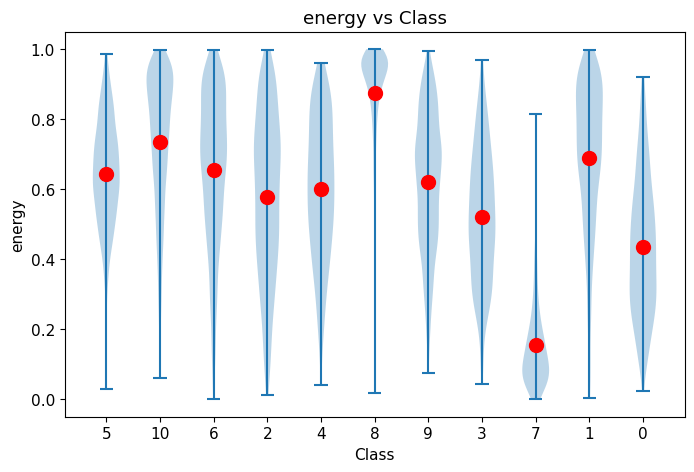

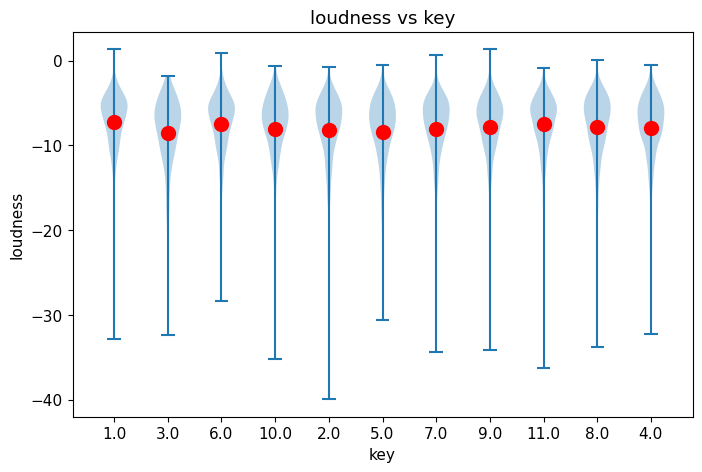

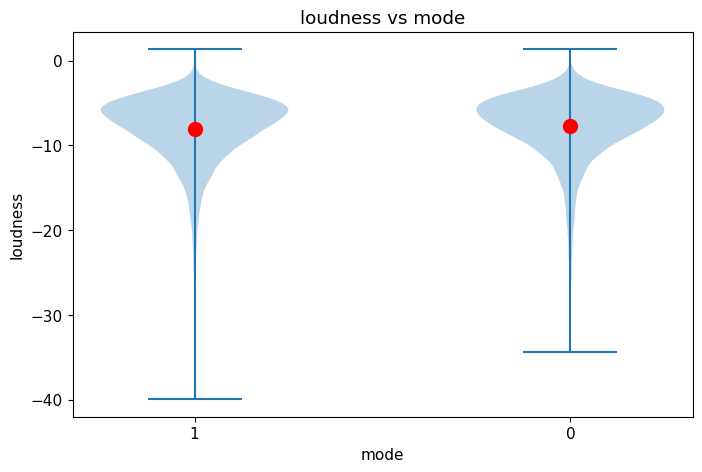

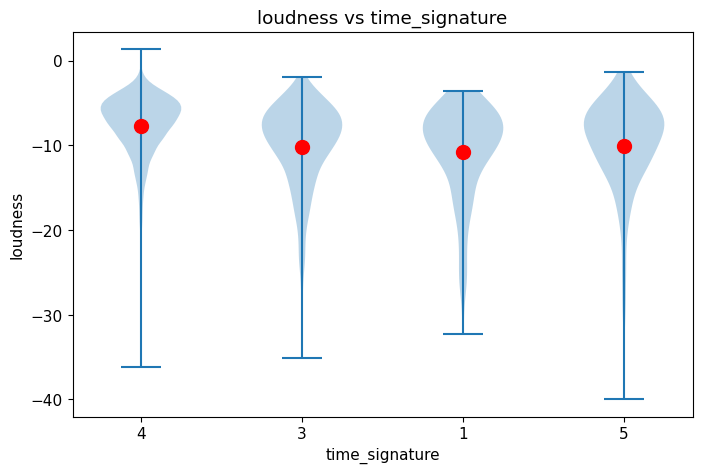

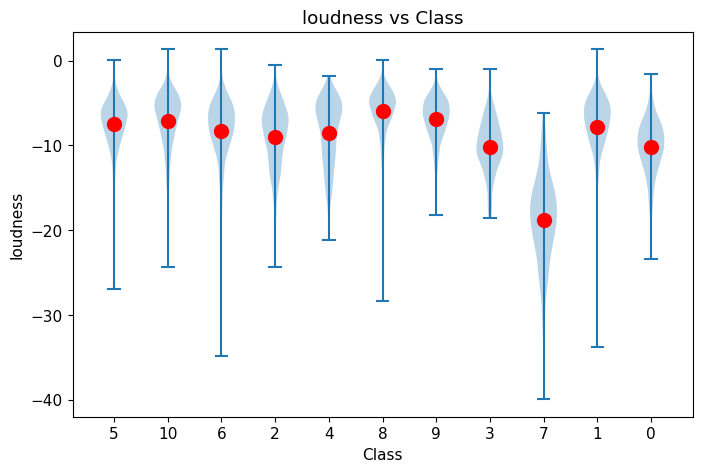

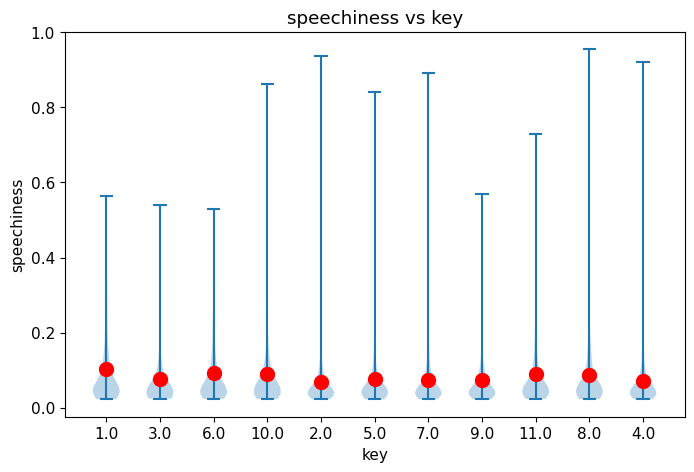

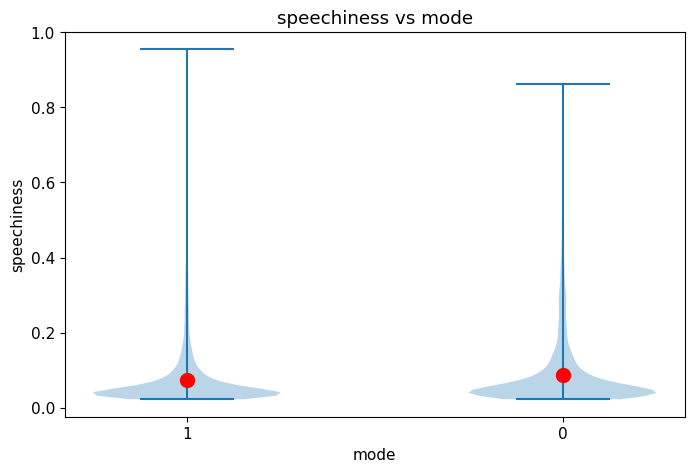

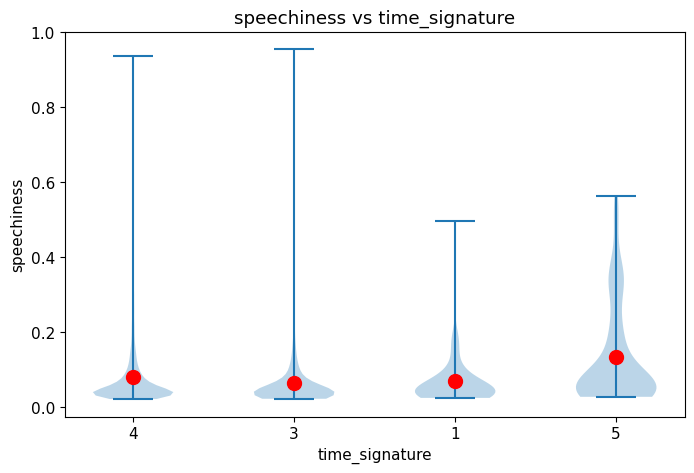

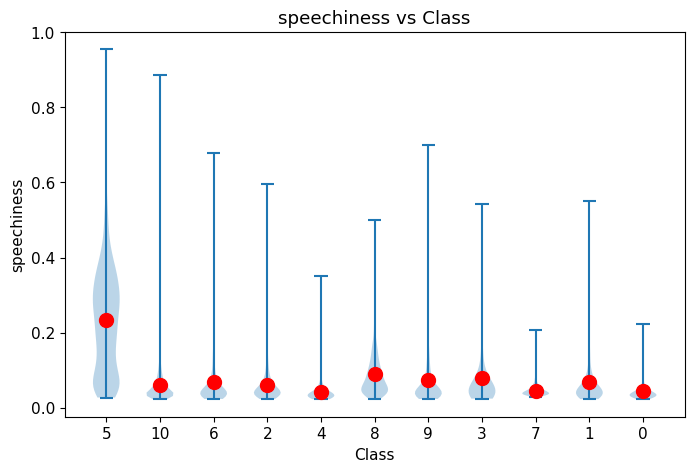

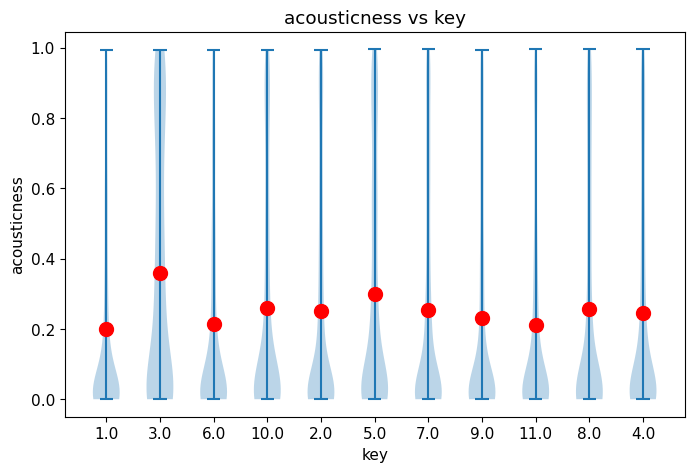

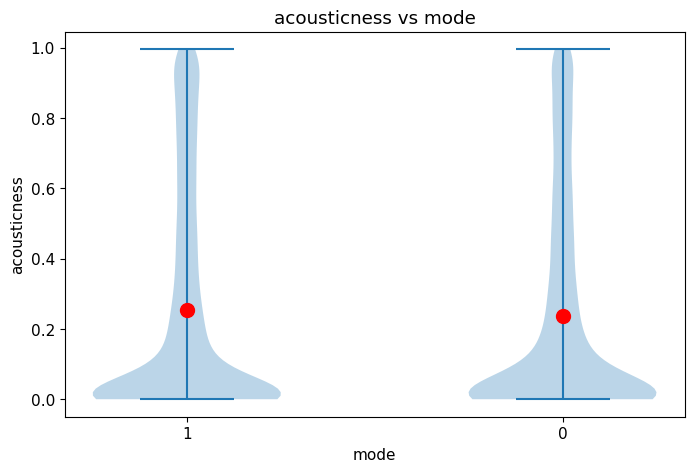

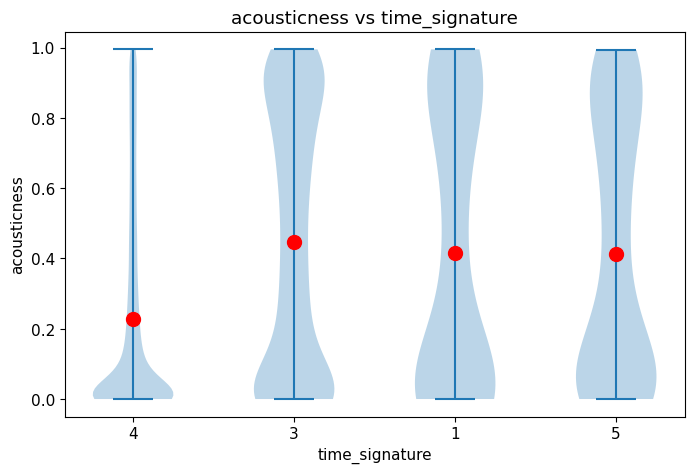

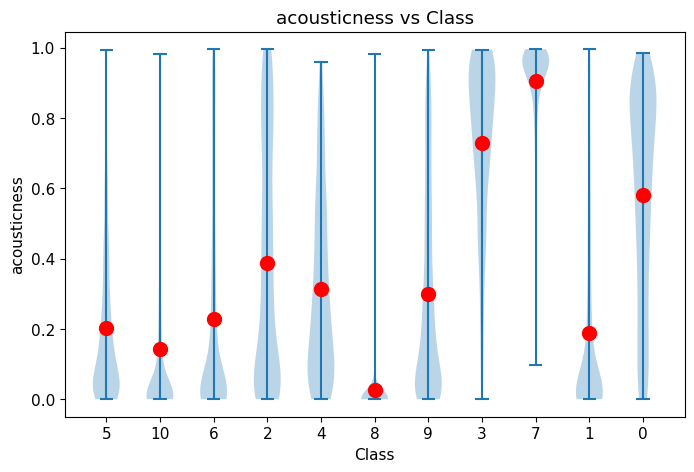

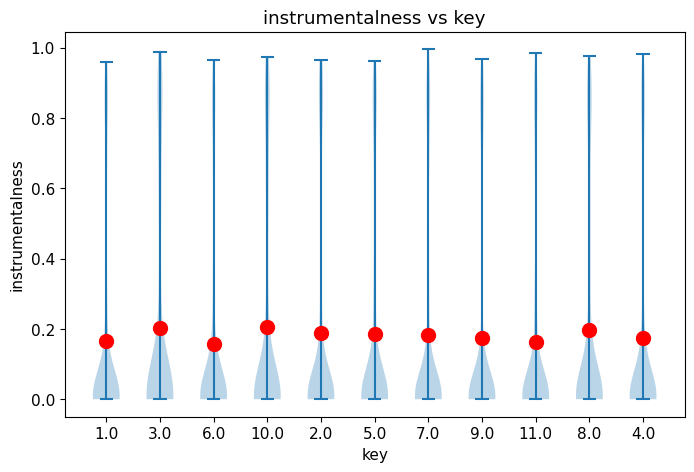

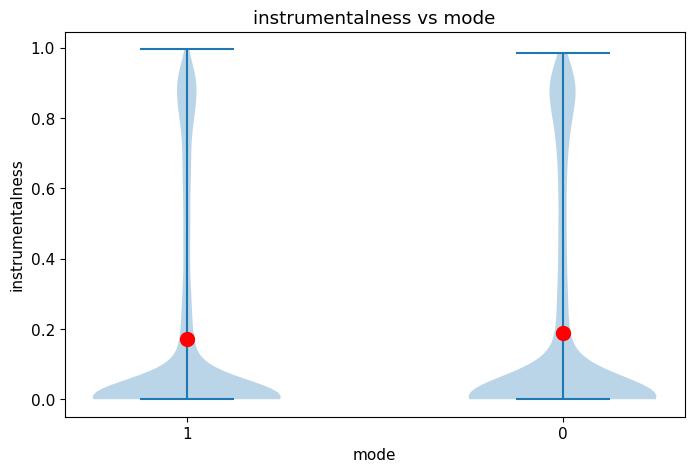

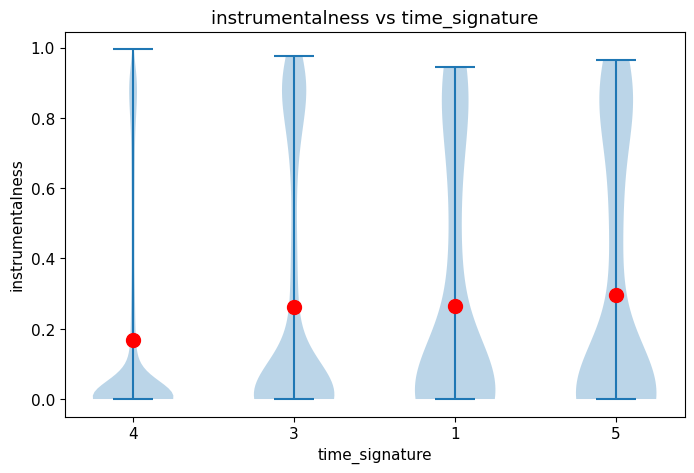

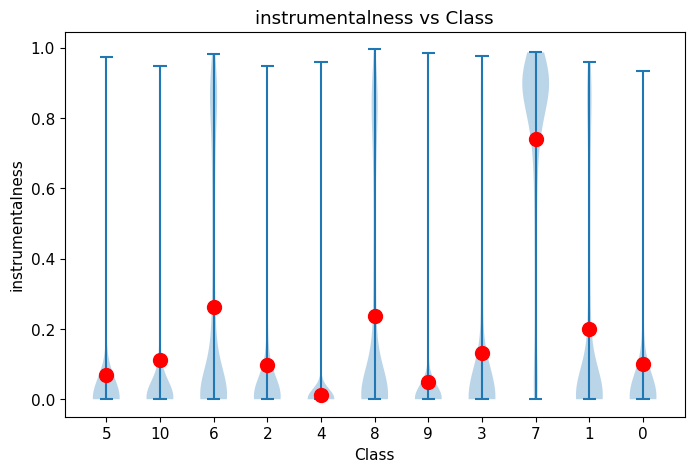

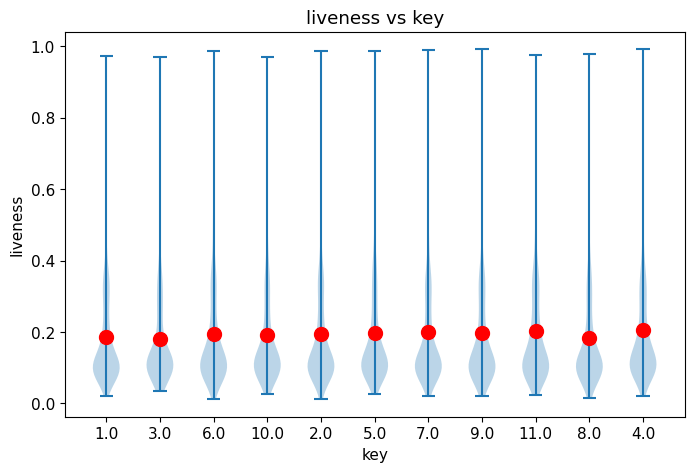

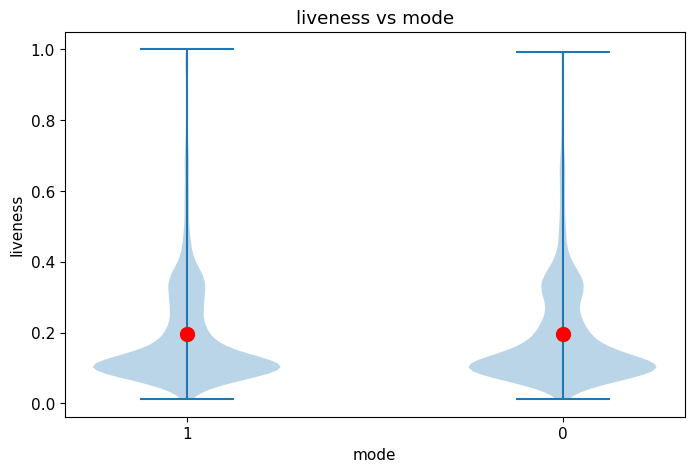

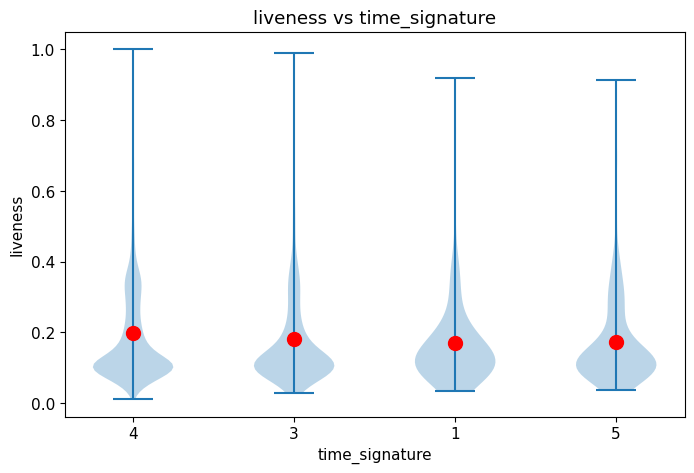

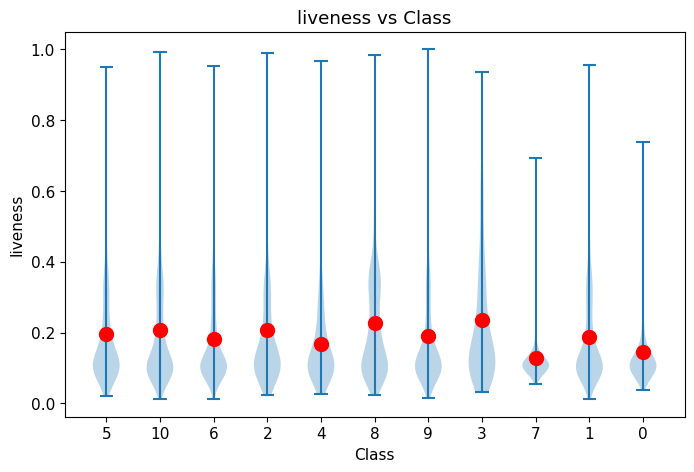

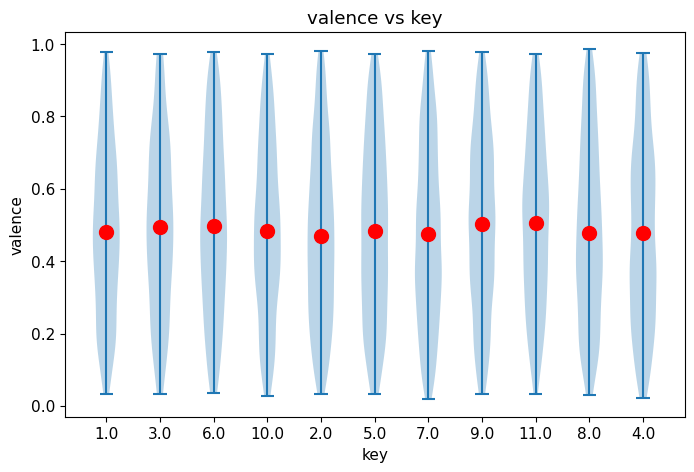

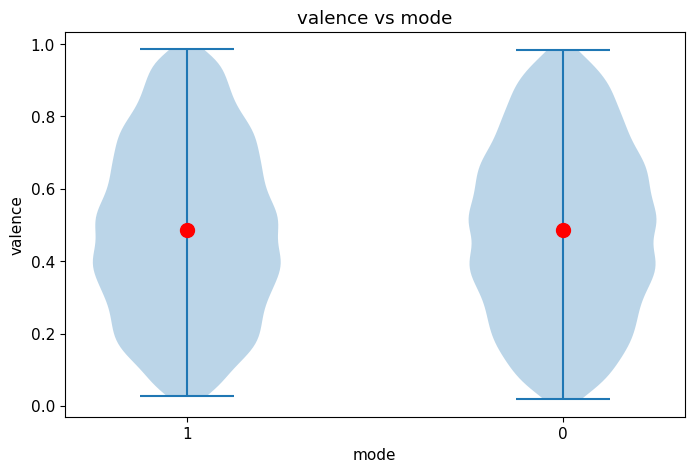

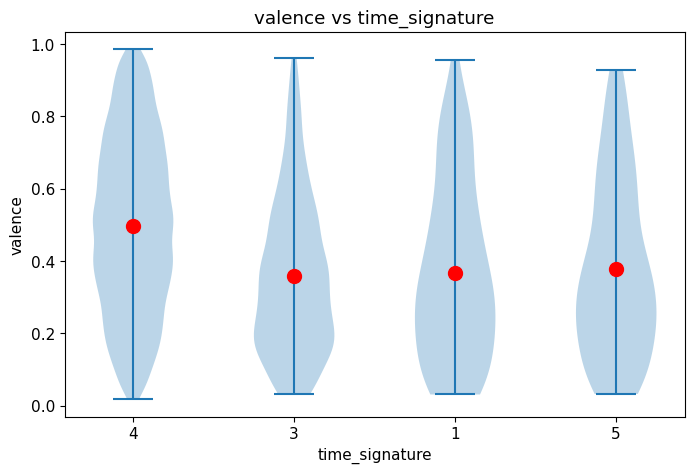

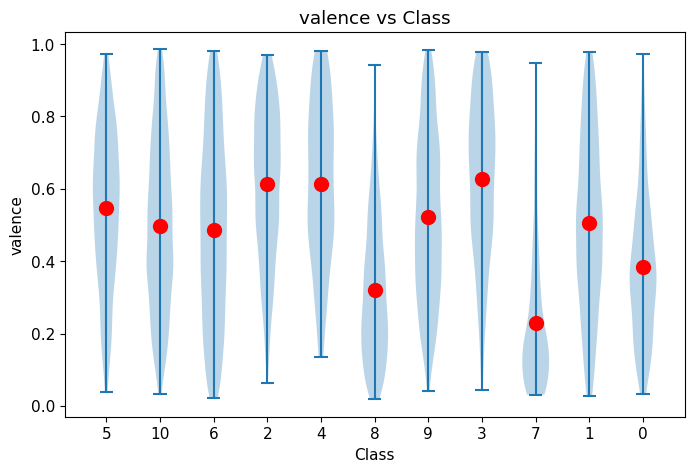

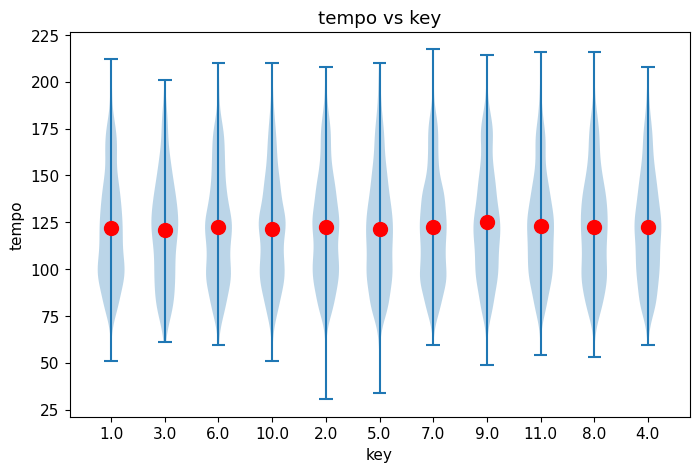

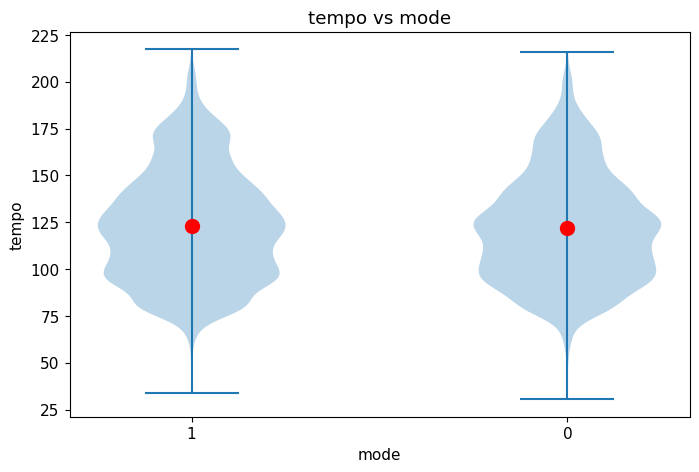

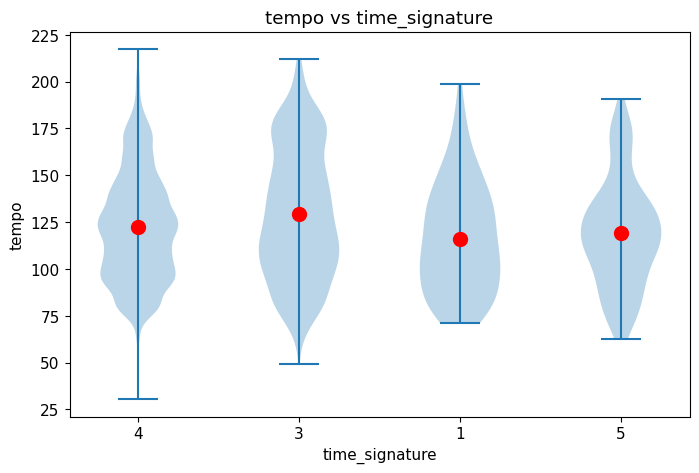

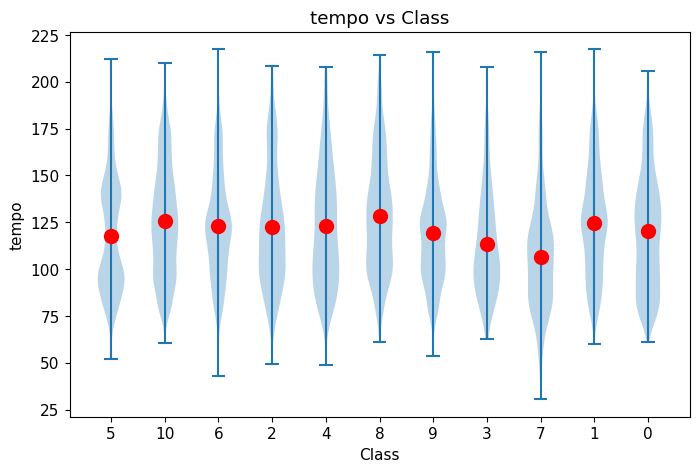

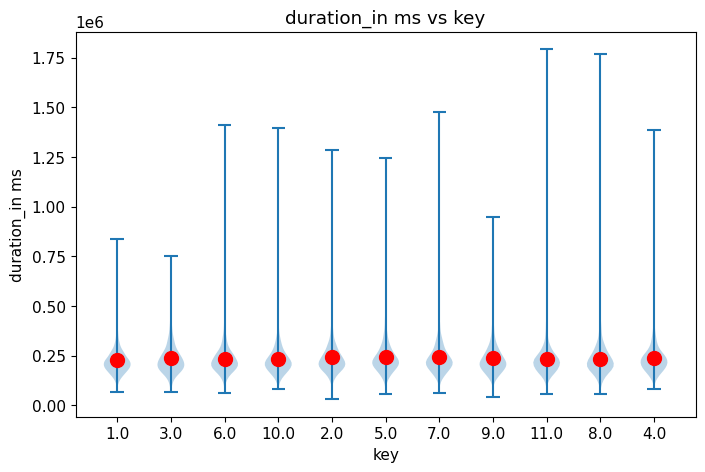

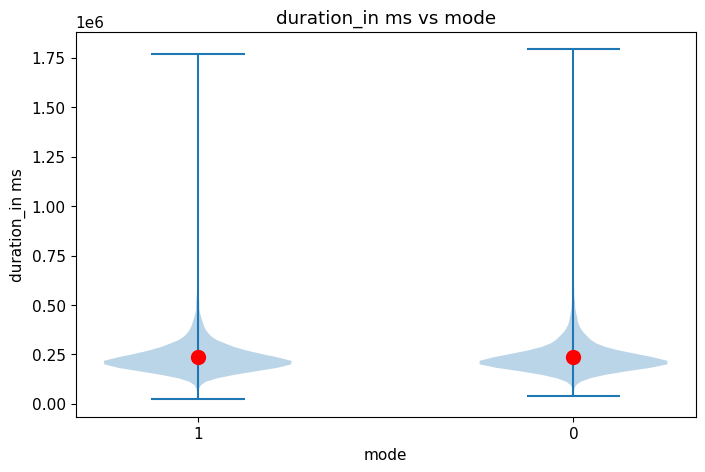

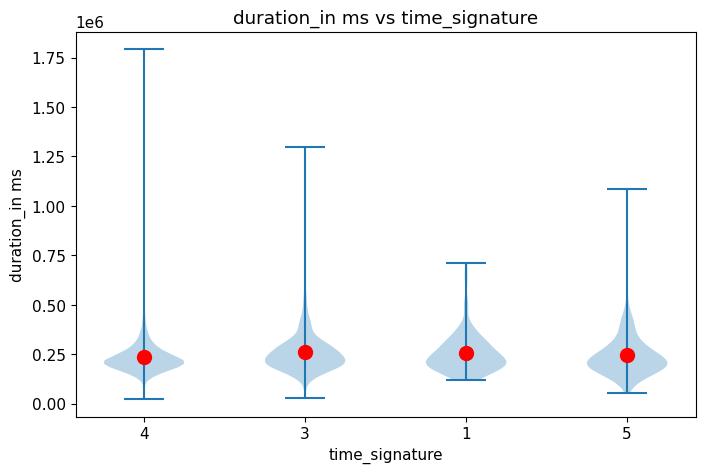

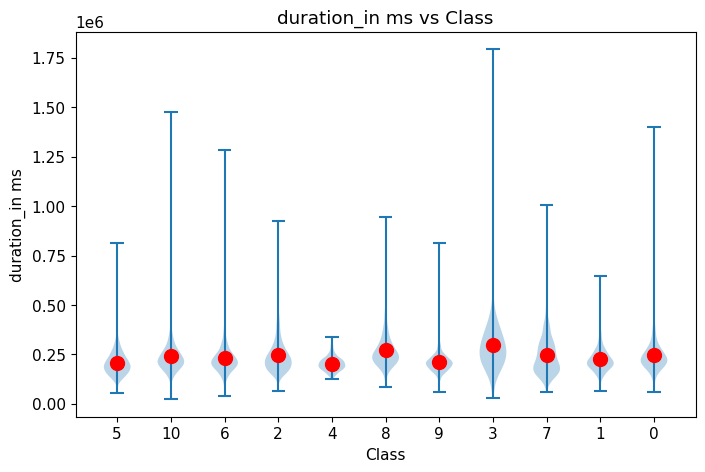

In [16]:
#violin plots
for cont_var in vars_cont:
    for cat_var in vars_cat:
        plt.figure(figsize=(8, 5))
        data = [df[cont_var][df[cat_var] == category].dropna() for category in df[cat_var].unique()]
        data = [d for d in data if len(d) > 0]
        plt.violinplot(data, positions=range(1, len(data) + 1))
        means = [d.mean() for d in data]
        #adding a mean to the violinplot
        for position, mean in zip(range(1, len(means) + 1), means):
            plt.scatter([position], [mean], color='red', label='Mean' if position == 1 else "", s=100, zorder=5)
        plt.xticks(range(1, len(data) + 1), df[cat_var].unique()[[len(df[cat_var][df[cat_var] == category]) > 0 for category in df[cat_var].unique()]])
        plt.title(f"{cont_var} vs {cat_var}")
        plt.ylabel(cont_var)
        plt.xlabel(cat_var)
        plt.show()

Interesting observations: 
(“Graphs” refer to both violin and box plots)

In the graphs showing danceability versus time_signature, the songs with 4 time_signature (namely 4/4) have a higher danceability level than other time signatures (1,3 or 5) with the highest mean, median, max/min values and first/third quartiles.

In the graphs showing danceability versus class, the songs in hiphop(5) or pop(9) have a higher danceability level than other classes as they have higher mean, median, max/min values and first/third quartiles.

In the graphs showing energy versus time_signature, the songs with 4 time_signature (namely 4/4) have a higher energy level than other time signatures (1,3 or 5) with the highest mean, median, max/min values and first/third quartiles.

In the graphs showing energy versus class, the songs in metal(8) have a higher energy level than other classes as it has higher mean, median, max/min values and first/third quartiles. On the contrary, instrumental(7) is the class with the lowest energy on a general level. 

In the graphs showing speechiness versus class, the songs in hiphop(5) have a higher speechiness level than other classes as it has higher mean, medan and maximum values.

In the graphs showing acousticness versus class, the songs in bollywood(3) and instrumental(7) have a higher acousticness level than other classes as they have higher mean, median, max/min values and first/third quartiles.

In the graphs showing instrumentalness versus class, the songs in instrumental(7), not surprisingly, have a higher instrumentalness level than other classes, while country(4), hiphop(5) and pop(9) have the lowest instrumentalness level (country is the lowest among them as it doesn’t have as many outliers having high values as hiphop or pop).

In the graphs showing liveness versus time_signature, the songs with 4 time_signature (namely 4/4) have a higher liveness level than other time signatures (1,3 or 5) with the highest mean, median, maximum value and first/third quartiles.

In the graphs showing valence versus time_signature, the songs with 4 time_signature (namely 4/4) have a higher valence level than other time signatures (1,3 or 5) with the highest mean, median, maximum value and first/third quartiles.

In the graphs showing valence versus class, the songs in metal(8) and instrumental(7) are the classes with the lowest valence on a general level (with lower mean, median, max/min values and first/third quartiles).



Part 2. Splitting and preprocessing

In [17]:
#dropping the "Artist Name" and "Track Name" columns since they do not include effective information
df = df.drop(columns=["Artist Name", "Track Name"])

In [18]:
#dealing with missing values
#first get an overview of how the missing values look like 
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print("fraction of missing values in features:")
print(perc_missing_per_ftr[perc_missing_per_ftr>0])
print("data types of the features with missing values:")
print(df[perc_missing_per_ftr[perc_missing_per_ftr>0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print("fraction of points with missing values:",frac_missing)

fraction of missing values in features:
Popularity          0.023783
key                 0.111914
instrumentalness    0.243221
dtype: float64
data types of the features with missing values:
Popularity          float64
key                 float64
instrumentalness    float64
dtype: object
fraction of points with missing values: 0.34357635030006667


In [20]:
#splitting the data
#since we have an imbalanced data as we can see from the bar plot for "Class"
#and assuming the tracks are chosen randomly
#we should use a stratified split
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Class"])
y = df["Class"]
random_state = 42
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)
print('**balance with stratification:**')
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))

**balance with stratification:**
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 375,  824,  763,  241,  232,  868, 1552,  346, 1113, 1514, 2969]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([125, 274, 255,  81,  78, 289, 517, 115, 370, 505, 990]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([125, 275, 254,  80,  77, 290, 518, 115, 371, 505, 990]))


As I went back to the bar plot of key features (which shows there's no 0 (C key)) and googled the key of around 100 songs out of the rows that have missing values in key and found every single one of them are written in C major/minor, I realized I should replace the missing values with 0, meaning that these songs are in C key!

In [21]:
#preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

onehot_ftrs = ["key","mode","time_signature"]
minmax_ftrs = ["acousticness","instrumentalness"]
std_ftrs = ["Popularity","danceability","energy","loudness","speechiness","liveness","valence","tempo","duration_in ms"]
#treat missing key as C key 
#define the missing key as 0
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='constant',fill_value=0)),
('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
transformers=[
('onehot', categorical_transformer, onehot_ftrs),
('minmax', MinMaxScaler(), minmax_ftrs),
('std', StandardScaler(), std_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)
print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)
print(X_val.shape)
print(X_val_prep.shape)
print(X_val_prep)
print(X_test.shape)
print(X_test_prep.shape)
print(X_test_prep)

(10797, 14)
(10797, 29)
[[ 0.          0.          0.         ...  1.5577134  -0.78146173
   0.03847426]
 [ 0.          0.          1.         ...  1.03668756 -0.50081477
  -0.26128548]
 [ 0.          0.          0.         ... -0.426353   -0.26021207
   0.89949085]
 ...
 [ 0.          0.          0.         ...  0.86162288  0.14107332
  -0.12323082]
 [ 0.          0.          0.         ... -1.83145549  0.58196478
  -0.28871181]
 [ 1.          0.          0.         ...  1.98703869  0.19665665
  -0.07528269]]
(3599, 14)
(3599, 29)
[[ 0.          1.          0.         ... -1.69140374 -0.76733838
  -0.25429704]
 [ 0.          0.          0.         ...  1.49102209 -0.79373119
  -1.09866364]
 [ 0.          0.          0.         ... -0.58474485 -1.19966819
  -0.4940377 ]
 ...
 [ 0.          0.          0.         ... -1.31418103  0.10810758
   1.77231467]
 [ 0.          0.          0.         ... -1.20163945  0.44480978
   0.46684287]
 [ 0.          0.          0.         ...  0.7865951

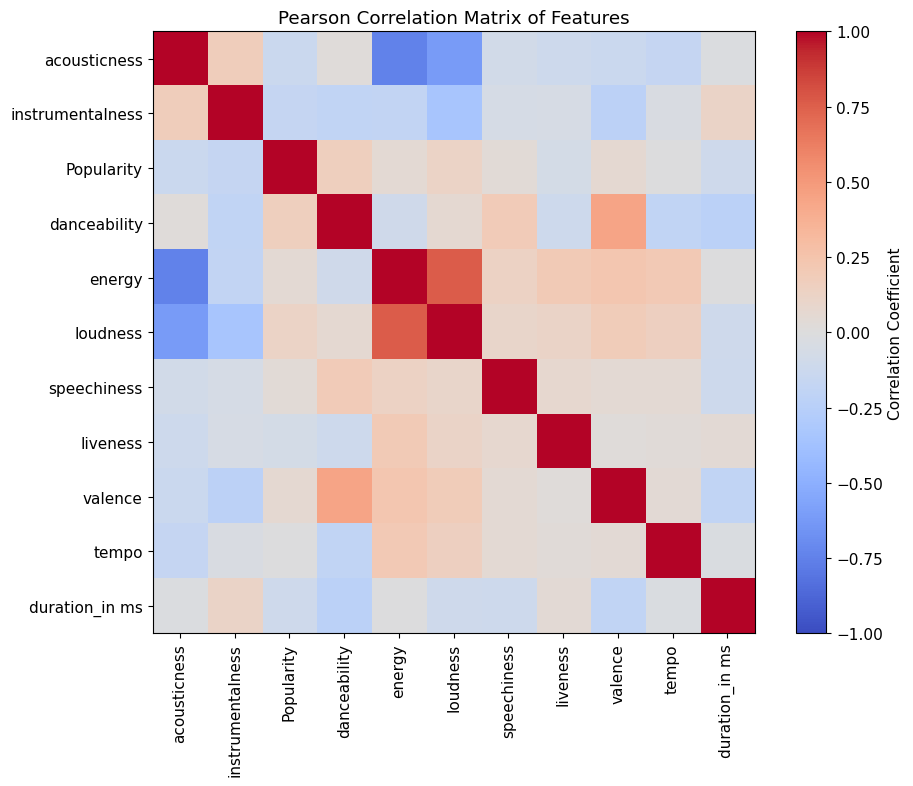

In [22]:
#correlation matrix on preprocessed train set 
#focus only on the continuous features
X_train_prep_cont = X_train_prep[:, 18:]
minmax_columns = minmax_ftrs  
std_columns = std_ftrs  
cont_columns = minmax_columns + std_columns
X_train_df = pd.DataFrame(X_train_prep_cont,columns = cont_columns)
correlation_matrix = X_train_df.corr(method="pearson", min_periods=1, numeric_only=False)
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation = 90 )
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar(label="Correlation Coefficient")
plt.title("Pearson Correlation Matrix of Features")
plt.tight_layout()
plt.show()

Findings:

Positively Correlated: energy & loudness; danceability & valence

Negatively Correlated: energy & acousticness; loudness & acousticness

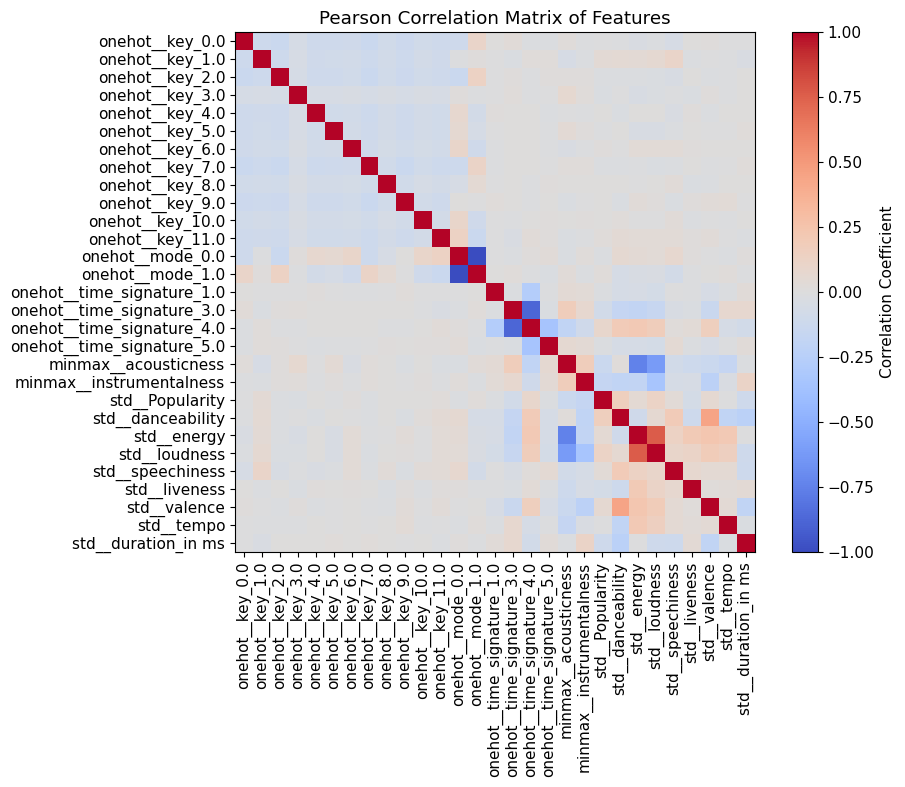

In [23]:
#A correlation matrix with all features(continuous and categorical)
colnames = preprocessor.get_feature_names_out()
X_train_df_all = pd.DataFrame(X_train_prep,columns = colnames)
correlation_matrix = X_train_df_all.corr(method="pearson", min_periods=1, numeric_only=False)
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation = 90 )
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar(label="Correlation Coefficient")
plt.title("Pearson Correlation Matrix of Features")
plt.tight_layout()
plt.show()

As we can see above, in the case of one-hot enocding for a binary categorical variable like "mode" (either major or minor mode), one of the two columns should be dropped as they are perfectly negatively correlated. Dropping one avoids introducing unnecessary redundancy into the dataset and helps prevent multicollinearity issues in models sensitive to it (like linear regression or logistic regression). This is a dummy variable trap avoidance strategy. For algorithms like decision trees or ensemble methods, the impact of reatining both columns is minimal, but for a cleaner approach I will drop one regardless.

There's also a strong negative correlation between time signature 3 and 4, indicating some redundacy generated from the one hot encoder. Dropping one of them could help simplify the model and reduce multicollinearity. 

In [24]:
#Convert the transformed arrays into DataFrames with proper column names
X_train_df = pd.DataFrame(X_train_prep, columns=colnames)
X_val_df = pd.DataFrame(X_val_prep, columns=colnames)
X_test_df = pd.DataFrame(X_test_prep, columns=colnames)

#Drop columns ('onehot__mode_0.0' and 'onehot__time_signature_3.0')
columns_to_drop = ['onehot__mode_0.0', 'onehot__time_signature_3.0']
X_train_df = X_train_df.drop(columns=columns_to_drop, axis=1)
X_val_df = X_val_df.drop(columns=columns_to_drop, axis=1)
X_test_df = X_test_df.drop(columns=columns_to_drop, axis=1)

#results
print("X_train_df shape:", X_train_df.shape)
print("X_val_df shape:", X_val_df.shape)
print("X_test_df shape:", X_test_df.shape)

X_train_df shape: (10797, 27)
X_val_df shape: (3599, 27)
X_test_df shape: (3600, 27)


Next step: Choosing an evaluation metric

1. accuracy

Accuracy is the proportion correctly classified samples out of all samples. Accuracy = (TP+TN)/(TP+FP+TN+FN). It's simple and intuitive, and works well if the dataset is balanced across all classes. However, it's not suitable for imbalanced datasets. If one genre takes up 50% of the data, a model could achieve 50% accuracy just by always predicting the majority class, even if it performs poorly on minority classes. It does not give insight into how well the model performs for individual classes. Therefore, it's not ideal for my problem given the class imbalance.

2. precision

Precision measures how many of the predicted positive samples are actually positive (Precision = TP/(TP+FP)). It's useful when false positives are more critical than false negatives. However, it doesn’t account for false negatives, so it might ignore how well the model captures minority classes. It can also be misleading for imbalanced datasets without recall. In genearl, it works well together with recall in F1 / PR curve but not as a standalone metric. 

3. recall

Recall (or TPR) measures how many of the actual positive samples are correctly identified (Recall = TP/(TP+FN)). It is useful when false negatives are more critical than false positives. It highlights how well the model identifies all examples of a given genre. However, recall ignores precision, so it might inflate performance for models that classify too many samples as positive (leading to high FP). It doesn’t account for overall classification performance. Therefore, recall is important for the imbalanced problem but should be balanced with precision using F1 / PR curve.


*In my music genre classification problem, the key issue is misclassification. Both false positives and false negatives result in the same outcome: misclassifying a song into the wrong genre. Therefore, we can say that a false positive for one genre is inherently a false negative for another genre, which means recall or precision is not ideal as the only evaluation metric.

4. f1

F1 score measures the harmonic mean of precision and recall: F1 = 2 * Precision * Recall/(Precision + Recall). It's well-suited for imbalanced datasets since it balances precision and recall. However, it doesn’t provide an intuitive sense of the overall performance of the model on all classes. Aggregating F1 scores across multiple classes can also be tricky: Macro F1 treats all classes equally Weighted F1 adjusts for class imbalance but can still be skewed by majority classes. In general, f1 is a strong candidate for my imbalanced dataset if I want to balance between identifying all genres  and minimizing misclassifications.

5. ROC_AUC 

The drawback of ROC is that it uses TN, not good for imbalanced problems. In multi-class classification (like classifying music genres here), the ROC curve and AUC are computed for each class separately. After calculating the AUC for each class individually, we need to combine them into a single score for the entire dataset. This is typically done using averaging, usually Macro-Averaging or Weighted-Averaging. For each class, that class is treated as the positive class and all the other classes are combined into a single negative class. This is the One-vs-Rest (OvR) approach, which essentially converts the multi-class problem into multiple binary problems. When we calculate the AUC for a single class, the imbalance arises because we’re comparing that one class (positive) against all other classes (negative). For example, if one genre accounts for only 10% of the data, the rest (90%) are lumped together as negatives, making the class inherently imbalanced during evaluation. When there are many True Negatives (TN), the FPR tends to be small because: FPR = FP/(FP+TN), even if the model makes many False Positive predictions (FP), the large TN denominator keeps the FPR small. The TPR is independent of TN because TPR = TP/(TP+FN). For imbalanced datasets, the x-axis (FPR) doesn’t expand much, even as False Positives increase, due to the overwhelming number of True Negatives. This compresses the ROC curve horizontally, making the curve appear steeper toward the top-left corner, even if the model isn’t truly good at distinguishing the minority class. The area under the curve (AUC) becomes artificially inflated. The ROC curve would look better than it actually is.


6. precison-recall curve

This is beter than ROC_AUC.

The Precision-Recall (PR) curve and its associated PR-AUC (area under the PR curve) are better for imbalanced datasets because they focus only on the positive class and do not involve True Negatives (TN). Precision measures how many of the predicted positive samples are actually positive (Precision = TP/(TP+FP)), and Recall (or TPR) measures how many of the actual positive samples are correctly identified (Recall = TP/(TP+FN)). Unlike the ROC curve, which uses True Negatives (TN) in the calculation of FPR, the PR curve focuses only on TP, FP, and FN. PR curves emphasize how well the model identifies the minority (positive) class, which is often the focus in imbalanced datasets. For multi-class problems , the PR curve is extended using the One-vs-Rest (OvR) method: Compute the PR curve for each class individually (treating that class as positive and all others as negative);Combine the results using macro-averaging or weighted-averaging, just like with the ROC curve.

7. Logloss (FINAL CHOICE)

### <center>$$logloss = - \frac{1}{m}\sum_{i=0}^{m-1} (y_{i, true}\ln(p_{i, pred}) + (1-y_{i, true})\ln(1-p_{i, pred}))$$</center>

Log loss measures the accuracy of probability predictions, not just the final class predictions. It penalizes predictions that are both: Confidently wrong(If a model predicts a probability close to 1 for the wrong class, the penalty is very high, Log loss is particularly harsh in such cases, as the penalty grows exponentially as the predicted probability for the true class approaches 0); underconfident or uncalibrated for the true class(If the predicted probability for the true class is too low, log loss penalizes the model. This happens even if the prediction is technically correct because the confidence level does not align with the model’s certainty based on the features.).

Usually, when we convert probabilities into classes (e.g., 0.8 → “Jazz” and 0.3 → “Rock”), we lose valuable information about uncertainty. However, log loss avoids this by evaluating the full probability distribution. This is especially useful in situations where we need to rank predictions (e.g. in a music recommendation system, we want to rank songs by their likelihood of belonging to a specific genre) or handle cost-sensitive decisions. 

I decided to use logloss as my final evaluation metric since for a multi-class problem like mine, we care about the model’s confidence in assigning a genre rather than just the final prediction; Log loss penalizes confident errors, ensuring the model doesn’t overfit to majority genres at the cost of minority genres, dealing with the imbalance in the dataset; what's more, for music classification, real world applications involve ranking songs by their probability of belonging to a genre (e.g., for recommendations), and this makes log loss an ideal metric.

*Log loss inherently works for multi-class problems without the need to split the classes into a binary “one-vs-rest” mindset, which could be another benefit of using it too. It automatically focuses on the predicted probability for the correct class while ignoring probabilities for incorrect classes. It penalizes predictions that assign low probabilities to the true class, regardless of the probabilities assigned to the incorrect classes.

8. Mean Squared Error (MSE) and R2: Regression metrics only apply to continuous target variables.




NEXT STEP: Trying different model/algorithms and recreating pipelines for cross validation

1. Logistic Regression

(I want to use L2 regularization or elastic net (a combination of L1 and L2) as the regularization method here since I want to shrink coefficients toward 0 of some features but I don't want to unnecessarily eliminate features entirely.)

2. Random Forest Classification

3. SVM rbf Classification

4. XGBoost (deals with missing data better)

5. K-Nearest Neighbors (KNN) classifier

I will use logloss as the main evluation metric for model selection, but I'll also provide f1 as a complementary metric since Log loss evaluates how well the model predicts probabilities but doesn’t directly assess the final class predictions. F1 can be more intuitive for stakeholders or practical applications. A low log loss indicates well-calibrated probabilities, but F1 might help understand how that translates to actual predictions.


Random State 0: Starting...
Random State 0 - Baseline F1 Score: 0.0392
Random State 0 - Baseline Log Loss: 2.1237
Random State 0, Parameter Set 1/60: {'max_depth': 1, 'max_features': 0.25, 'n_estimators': 50}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 2/60: {'max_depth': 1, 'max_features': 0.25, 'n_estimators': 100}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 3/60: {'max_depth': 1, 'max_features': 0.25, 'n_estimators': 500}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 4/60: {'max_depth': 1, 'max_features': 0.5, 'n_estimators': 50}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 5/60: {'max_depth': 1, 'ma

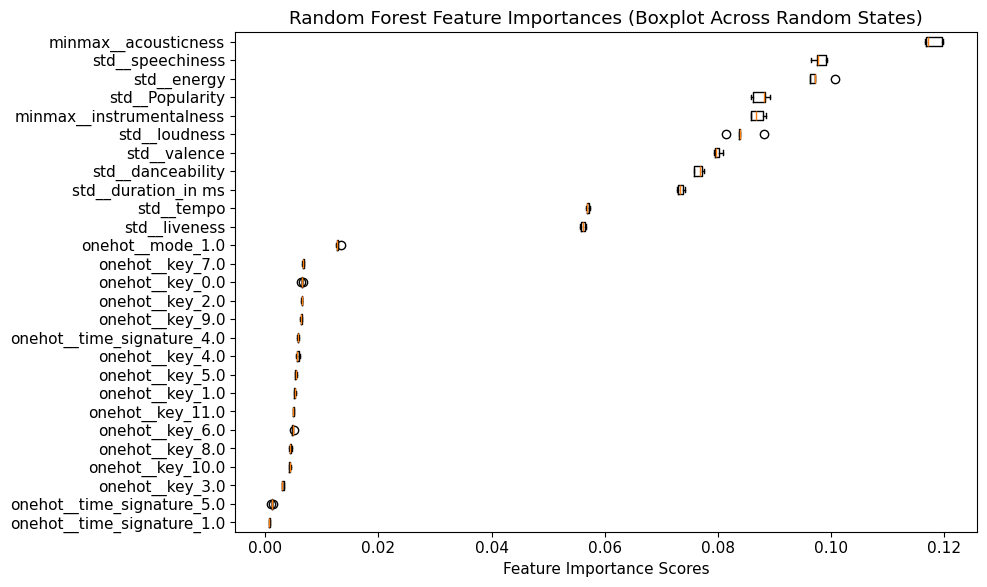


Final Results:
Log Loss Scores: [1.5644558671037176, 1.5691295612313865, 1.580187864962828, 1.5676828918600065, 1.582592881535265]
F1 Scores: [0.4381753679964389, 0.4266667212350526, 0.43298651432527374, 0.42471703221019275, 0.43020103746420096]
Best Model Parameters: [{'max_depth': 30, 'max_features': 0.25, 'n_estimators': 500}, {'max_depth': 30, 'max_features': 0.25, 'n_estimators': 500}, {'max_depth': 100, 'max_features': 0.25, 'n_estimators': 500}, {'max_depth': 100, 'max_features': 0.25, 'n_estimators': 500}, {'max_depth': 30, 'max_features': 0.25, 'n_estimators': 500}]

Average Log Loss across random states: 1.5728
Log Loss Standard Deviation: 0.0072
Average Test F1 across random states: 0.4305
Test F1 Standard Deviation: 0.0048

Baseline Scores Across Random States:
Average Baseline F1: 0.0392, Std Dev: 0.0000
Average Baseline Log Loss: 2.1237, Std Dev: 0.0000
Pipeline completed.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, f1_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np


#Return baseline logloss and baseline accuracy scores as a reference
def calculate_baseline_scores(y):
    class_counts = y.value_counts(normalize=True)
    baseline_logloss = -np.sum(class_counts * np.log(class_counts))
    most_frequent_class = class_counts.idxmax()
    y_baseline_pred = [most_frequent_class] * len(y)
    baseline_f1 = f1_score(y, y_baseline_pred, average='macro')  # Use macro for multi-class F1
    return baseline_f1, baseline_logloss


def main_pipelinerfc(data_path):
    #Load data
    df = pd.read_csv(data_path)
    df = df.drop(columns=['Artist Name', 'Track Name'], errors='ignore')
    
    #Unify the unit of the duration column
    df["duration_in min/ms"] = np.where(df["duration_in min/ms"] < 100, df["duration_in min/ms"] * 60000, df["duration_in min/ms"])
    df.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace=True)
    
    #Preprocessing pipeline
    onehot_ftrs = ["key", "mode", "time_signature"]
    minmax_ftrs = ["acousticness", "instrumentalness"]
    std_ftrs = [
        "Popularity", "danceability", "energy", "loudness", "speechiness",
        "liveness", "valence", "tempo", "duration_in ms"
    ]

    #Preprocessing transformers
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  #Handle categorical missing values
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    minmax_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical features in minmax_ftrs
        ('scaler', MinMaxScaler())
    ])

    numerical_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical data
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),  #categorical features
        ('minmax', minmax_transformer, minmax_ftrs),       #minmax features with imputation
        ('std', numerical_transformer, std_ftrs)          #other numerical features with imputation
    ])

    #Parameter grid for hyperparameter tuning
    param_grid = {
        "max_depth": [1, 3, 10, 30, 100],  #linearly spaced
        "max_features": [0.25, 0.5, 0.75, 1.0],  #Linearly spaced
        "n_estimators": [50, 100, 500] #Linearly spaced
    }

    #Initialize lists to store results
    logloss_scores = []
    f1_scores = []
    best_models = []
    feature_importances = {}
    baseline_f1_scores = []
    baseline_logloss_scores = []
    fold_scores_list = []
    fold_std_list = []

    target = "Class"  

    #Loop over 5 different random states
    for random_state in range(5):
        print(f"\nRandom State {random_state}: Starting...")

        #Define target and features
        X = df.drop(columns=[target])
        y = df[target]

        #Split data into other and test sets
        X_other, X_test, y_other, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state, stratify=y)
        
        # Calculate baseline scores for this random state using y_test
        baseline_f1, baseline_logloss = calculate_baseline_scores(y_test)
        print(f"Random State {random_state} - Baseline F1 Score: {baseline_f1:.4f}")
        print(f"Random State {random_state} - Baseline Log Loss: {baseline_logloss:.4f}")

        # Append baseline scores
        baseline_f1_scores.append(baseline_f1)
        baseline_logloss_scores.append(baseline_logloss)

        #Prepare StratifiedKFold K-Fold cross-validation
        kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)

        #Initialize variables for the best model
        best_score = float("inf")
        best_params = None
        best_model = None

        #Iterate over parameter grid
        for params_idx, params in enumerate(ParameterGrid(param_grid)):
            print(f"Random State {random_state}, Parameter Set {params_idx + 1}/{len(ParameterGrid(param_grid))}: {params}")
            fold_scores = []

            #Perform StratifiedKFold cross-validation (manual)
            for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_other,y_other)):
                print(f"    Fold {fold_idx + 1}/{kf.get_n_splits()} in progress...")
                #Train/validation split for this fold
                X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
                y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]

                #Fit preprocessor on the training set only
                preprocessor.fit(X_train)

                #Transform both training and validation sets
                X_train_prep = preprocessor.transform(X_train)
                X_val_prep = preprocessor.transform(X_val)

                #Get feature names and drop unnecessary columns
                feature_names = preprocessor.get_feature_names_out()
                X_train_prep = pd.DataFrame(X_train_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
                X_val_prep = pd.DataFrame(X_val_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

                #Train the Random Forest model
                model = RandomForestClassifier(class_weight="balanced",
                    max_depth=params["max_depth"],
                    max_features=params["max_features"],
                    random_state=random_state,
                    n_estimators=params["n_estimators"],
                    n_jobs=-1
                )

                #Train and predict on validation set
                model.fit(X_train_prep, y_train)
                val_pred_proba = model.predict_proba(X_val_prep)
                fold_log_loss = log_loss(y_val, val_pred_proba)
                fold_scores.append(fold_log_loss)

            #Average log loss across folds
            avg_log_loss = np.mean(fold_scores)

            # Calculate standard deviation of fold scores
            std_log_loss = np.std(fold_scores)

            # Store fold scores and standard deviation
            fold_scores_list.append(fold_scores)
            fold_std_list.append(std_log_loss)

            #Update the best model if current is better
            if avg_log_loss < best_score:
                best_score = avg_log_loss
                best_params = params
                best_model = model
        
        #Evaluate the best model on the test set
        X_test_prep = preprocessor.transform(X_test)
        X_test_prep = pd.DataFrame(X_test_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
        feature_names = X_test_prep.columns.tolist() 

        y_test_proba = best_model.predict_proba(X_test_prep)
        y_test_pred = best_model.predict(X_test_prep)
        test_logloss = log_loss(y_test, y_test_proba)
        test_f1 = f1_score(y_test, y_test_pred, average='macro')
        logloss_scores.append(test_logloss)
        f1_scores.append(test_f1)
        best_models.append(best_params)
        print(f"Random State {random_state}: Best Log Loss = {test_logloss:.4f}, Test F1 = {test_f1:.4f}")
        # Store feature importance for the current random state
        feature_importances[random_state] = best_model.feature_importances_

    #Final results
    average_logloss = np.mean(logloss_scores)
    std_logloss = np.std(logloss_scores)  
    average_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    avg_baseline_f1 = np.mean(baseline_f1_scores)
    std_baseline_f1 = np.std(baseline_f1_scores)
    avg_baseline_logloss = np.mean(baseline_logloss_scores)
    std_baseline_logloss = np.std(baseline_logloss_scores)

    # Print fold score statistics
    print("\nValidation Scores Across Parameter Combinations:")
    for idx, (scores, std) in enumerate(zip(fold_scores_list, fold_std_list)):
        print(f"Parameter Combo {idx + 1}: Mean Log Loss = {np.mean(scores):.4f}, Std Dev = {std:.4f}")

    # Aggregate feature importances across random states
    aggregated_importances = {}
    for random_state, importances in feature_importances.items():
        for idx, importance in enumerate(importances):
            feature_name = feature_names[idx]
            if feature_name not in aggregated_importances:
                aggregated_importances[feature_name] = []
            aggregated_importances[feature_name].append(importance)

    # Convert aggregated importances to a matrix for boxplot
    sorted_features = sorted(aggregated_importances.keys(), key=lambda x: np.mean(aggregated_importances[x]), reverse=False)
    sorted_importances = [aggregated_importances[feature] for feature in sorted_features]

    # Visualization with boxplot
    plt.figure(figsize=(10, 6))
    plt.boxplot(sorted_importances, vert=False, tick_labels=sorted_features)
    plt.title("Random Forest Feature Importances (Boxplot Across Random States)")
    plt.xlabel("Feature Importance Scores")
    plt.tight_layout()
    plt.show()


    print("\nFinal Results:")
    print("Log Loss Scores:", logloss_scores)
    print("F1 Scores:", f1_scores)
    print("Best Model Parameters:", best_models)
    print(f"\nAverage Log Loss across random states: {average_logloss:.4f}")
    print(f"Log Loss Standard Deviation: {std_logloss:.4f}")
    print(f"Average Test F1 across random states: {average_f1:.4f}")
    print(f"Test F1 Standard Deviation: {std_f1:.4f}")
    print("\nBaseline Scores Across Random States:")
    print(f"Average Baseline F1: {avg_baseline_f1:.4f}, Std Dev: {std_baseline_f1:.4f}")
    print(f"Average Baseline Log Loss: {avg_baseline_logloss:.4f}, Std Dev: {std_baseline_logloss:.4f}")

    #Return results
    return {
        'Best Models': best_models,
        'Log Loss Scores': logloss_scores,
        'F1 Scores': f1_scores,
        'Average Log Loss': average_logloss,
        'Log Loss Std Dev': std_logloss,
        'Average Test F1': average_f1,
        'F1 Std Dev': std_f1,
        'Feature Importances': aggregated_importances,
        'Baseline F1 Scores': baseline_f1_scores,
        'Baseline Log Loss Scores': baseline_logloss_scores,
        'Fold Scores': fold_scores_list,
        'Fold Score Standard Deviations': fold_std_list
    }

# Run pipeline
if __name__ == "__main__":
    data_path = 'music.csv'
    results = main_pipelinerfc(data_path)
    print("Pipeline completed.")


Random State 0: Starting...
Random State 0 - Baseline F1 Score: 0.0392
Random State 0 - Baseline Log Loss: 2.1237
Random State 0, Parameter Set 1/12: {'C': 0.1, 'gamma': 0.01}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 2/12: {'C': 0.1, 'gamma': 0.1}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 3/12: {'C': 0.1, 'gamma': 1}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 4/12: {'C': 1, 'gamma': 0.01}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 5/12: {'C': 1, 'gamma': 0.1}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Paramete

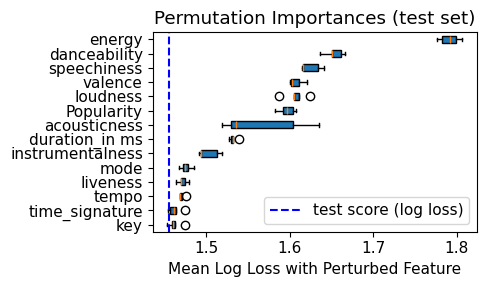


Aggregated Permutation Importances:
key: Mean=1.4621, Std=0.0071
time_signature: Mean=1.4623, Std=0.0068
tempo: Mean=1.4706, Std=0.0027
liveness: Mean=1.4714, Std=0.0052
mode: Mean=1.4754, Std=0.0061
instrumentalness: Mean=1.5026, Std=0.0113
duration_in ms: Mean=1.5322, Std=0.0038
acousticness: Mean=1.5649, Std=0.0460
Popularity: Mean=1.5968, Std=0.0088
loudness: Mean=1.6067, Std=0.0120
valence: Mean=1.6074, Std=0.0076
speechiness: Mean=1.6243, Std=0.0107
danceability: Mean=1.6528, Std=0.0103
energy: Mean=1.7913, Std=0.0110

Final Results:
Log Loss Scores: [1.4538329574348385, 1.4525935065605573, 1.4469364061420897, 1.4550345023168476, 1.4683337499307363]
F1 Scores: [0.4019114069976291, 0.4098445393141004, 0.4111548575337806, 0.4057568792637882, 0.40418114742555583]
Best Model Parameters: [{'C': 100, 'gamma': 0.01}, {'C': 1, 'gamma': 0.1}, {'C': 1, 'gamma': 0.1}, {'C': 1, 'gamma': 0.1}, {'C': 10, 'gamma': 0.01}]

Average Log Loss across random states: 1.4553
Log Loss Standard Deviatio

In [3]:
#SVM cfl
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import log_loss, f1_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np

#Return baseline logloss and baseline accuracy scores as a reference
def calculate_baseline_scores(y):
    class_counts = y.value_counts(normalize=True)
    baseline_logloss = -np.sum(class_counts * np.log(class_counts))
    most_frequent_class = class_counts.idxmax()
    y_baseline_pred = [most_frequent_class] * len(y)
    baseline_f1 = f1_score(y, y_baseline_pred, average='macro')  # Use macro for multi-class F1
    return baseline_f1, baseline_logloss



def main_pipelinesvm(data_path):
    #Load data
    df = pd.read_csv(data_path)
    df = df.drop(columns=['Artist Name', 'Track Name'], errors='ignore')
    
    #Unify the unit of the duration column
    df["duration_in min/ms"] = np.where(df["duration_in min/ms"] < 100, df["duration_in min/ms"] * 60000, df["duration_in min/ms"])
    df.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace=True)
    
    #Preprocessing pipeline
    onehot_ftrs = ["key", "mode", "time_signature"]
    minmax_ftrs = ["acousticness", "instrumentalness"]
    std_ftrs = [
        "Popularity", "danceability", "energy", "loudness", "speechiness",
        "liveness", "valence", "tempo", "duration_in ms"
    ]

    #Preprocessing transformers
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Handle categorical missing values
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    minmax_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical features in minmax_ftrs
        ('scaler', MinMaxScaler())
    ])

    numerical_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical data
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),  #categorical features
        ('minmax', minmax_transformer, minmax_ftrs),       #minmax features with imputation
        ('std', numerical_transformer, std_ftrs)          #other numerical features with imputation
    ])

    #Parameter grid for hyperparameter tuning
    param_grid = {
        "C": [0.1, 1, 10, 100],        # Regularization parameter
        "gamma": [0.01, 0.1, 1]  # Kernel coefficient
    }

    #Initialize lists to store results
    logloss_scores = []
    f1_scores = []
    best_models = []
    aggregated_importances = {feature: [] for feature in df.columns if feature != 'Class'}
    baseline_f1_scores = []
    baseline_logloss_scores = []
    fold_scores_list = []
    fold_std_list = []
    target = "Class"  

    #Loop over 5 different random states
    for random_state in range(5):
        print(f"\nRandom State {random_state}: Starting...")

        #Define target and features
        X = df.drop(columns=[target])
        y = df[target]

        #Split data into other and test sets
        X_other, X_test, y_other, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state, stratify=y)
        
        # Calculate baseline scores for this random state using y_test
        baseline_f1, baseline_logloss = calculate_baseline_scores(y_test)
        print(f"Random State {random_state} - Baseline F1 Score: {baseline_f1:.4f}")
        print(f"Random State {random_state} - Baseline Log Loss: {baseline_logloss:.4f}")

        # Append baseline scores
        baseline_f1_scores.append(baseline_f1)
        baseline_logloss_scores.append(baseline_logloss)

        #Prepare StratifiedKFold cross-validation
        kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)

        #Initialize variables for the best model
        best_score = float("inf")
        best_params = None
        best_model = None

        #Iterate over parameter grid
        for params_idx, params in enumerate(ParameterGrid(param_grid)):
            print(f"Random State {random_state}, Parameter Set {params_idx + 1}/{len(ParameterGrid(param_grid))}: {params}")
            fold_scores = []

            #Perform StratifiedKFold cross-validation (manual)
            for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_other,y_other)):
                print(f"    Fold {fold_idx + 1}/{kf.get_n_splits()} in progress...")
                #Train/validation split for this fold
                X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
                y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]

                #Fit preprocessor on the training set only
                preprocessor.fit(X_train)

                #Transform both training and validation sets
                X_train_prep = preprocessor.transform(X_train)
                X_val_prep = preprocessor.transform(X_val)

                #Get feature names and drop unnecessary columns
                feature_names = preprocessor.get_feature_names_out()
                X_train_prep = pd.DataFrame(X_train_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
                X_val_prep = pd.DataFrame(X_val_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

                #Train the SVM model
                model = SVC(class_weight='balanced',
                    C=params["C"],
                    gamma=params["gamma"],
                    kernel="rbf",
                    probability=True,
                    random_state=random_state
                )

                #Train and predict on validation set
                model.fit(X_train_prep, y_train)
                val_pred_proba = model.predict_proba(X_val_prep)
                fold_log_loss = log_loss(y_val, val_pred_proba)
                fold_scores.append(fold_log_loss)

            #Average log loss across folds
            avg_log_loss = np.mean(fold_scores)

            # Calculate standard deviation of fold scores
            std_log_loss = np.std(fold_scores)

            # Store fold scores and standard deviation
            fold_scores_list.append(fold_scores)
            fold_std_list.append(std_log_loss)
            #Update the best model if current is better
            if avg_log_loss < best_score:
                best_score = avg_log_loss
                best_params = params
                best_model = model

        #Evaluate the best model on the test set
        X_test_prep = preprocessor.transform(X_test)
        X_test_prep = pd.DataFrame(X_test_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

        y_test_proba = best_model.predict_proba(X_test_prep)
        y_test_pred = best_model.predict(X_test_prep)
        test_logloss = log_loss(y_test, y_test_proba)
        test_f1 = f1_score(y_test, y_test_pred, average='macro')
        logloss_scores.append(test_logloss)
        f1_scores.append(test_f1)
        best_models.append(best_params)

        # Permutation Importance
        print(f"\nCalculating Permutation Importance for Random State {random_state}...")
        for feature in X_test.columns:
            X_test_shuffled = X_test.copy()
            X_test_shuffled[feature] = np.random.permutation(X_test[feature].values)

            X_test_shuffled_prep = preprocessor.transform(X_test_shuffled)
            X_test_shuffled_prep = pd.DataFrame(
                X_test_shuffled_prep, columns=preprocessor.get_feature_names_out()
            ).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

            shuffled_pred_proba = best_model.predict_proba(X_test_shuffled_prep)
            shuffled_log_loss = log_loss(y_test, shuffled_pred_proba)
            aggregated_importances[feature].append(shuffled_log_loss)

        print(f"Random State {random_state}: Best Log Loss = {test_logloss:.4f}, Test F1 = {test_f1:.4f}")
    
    # Final results
    average_logloss = np.mean(logloss_scores)
    std_logloss = np.std(logloss_scores)
    average_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    avg_baseline_f1 = np.mean(baseline_f1_scores)
    std_baseline_f1 = np.std(baseline_f1_scores)
    avg_baseline_logloss = np.mean(baseline_logloss_scores)
    std_baseline_logloss = np.std(baseline_logloss_scores)

    # Print fold score statistics
    print("\nValidation Scores Across Parameter Combinations:")
    for idx, (scores, std) in enumerate(zip(fold_scores_list, fold_std_list)):
        print(f"Parameter Combo {idx + 1}: Mean Log Loss = {np.mean(scores):.4f}, Std Dev = {std:.4f}")

    # Aggregate permutation importances
    mean_importances = {k: np.mean(v) for k, v in aggregated_importances.items()}
    std_importances = {k: np.std(v) for k, v in aggregated_importances.items()}
    sorted_features = sorted(mean_importances, key=mean_importances.get, reverse=True)

    # Visualize aggregated permutation importances using boxplot
    sorted_features = sorted(aggregated_importances.keys(), key=lambda x: np.mean(aggregated_importances[x]), reverse=False)
    # Convert aggregated_importances to a matrix for boxplot
    scores_matrix = np.array([aggregated_importances[feature] for feature in sorted_features])

    plt.rcParams.update({'font.size': 11})
    plt.figure(figsize=(5, 3))
    plt.boxplot(scores_matrix.T, vert=False, patch_artist=True, tick_labels=sorted_features)
    plt.axvline(average_logloss, color='blue', linestyle='--', label='test score (log loss)')
    plt.title("Permutation Importances (test set)")
    plt.xlabel('Mean Log Loss with Perturbed Feature')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\nAggregated Permutation Importances:")
    for feature in sorted_features:
        print(f"{feature}: Mean={mean_importances[feature]:.4f}, Std={std_importances[feature]:.4f}")


    print("\nFinal Results:")
    print("Log Loss Scores:", logloss_scores)
    print("F1 Scores:", f1_scores)
    print("Best Model Parameters:", best_models)
    print(f"\nAverage Log Loss across random states: {average_logloss:.4f}")
    print(f"Log Loss Standard Deviation: {std_logloss:.4f}")
    print(f"Average Test F1 across random states: {average_f1:.4f}")
    print(f"Test F1 Standard Deviation: {std_f1:.4f}")
    print("\nBaseline Scores Across Random States:")
    print(f"Average Baseline F1: {avg_baseline_f1:.4f}, Std Dev: {std_baseline_f1:.4f}")
    print(f"Average Baseline Log Loss: {avg_baseline_logloss:.4f}, Std Dev: {std_baseline_logloss:.4f}")


    # Return results
    return {
        'Best Models': best_models,
        'Log Loss Scores': logloss_scores,
        'F1 Scores': f1_scores,
        'Average Log Loss': average_logloss,
        'Log Loss Std Dev': std_logloss,
        'Average Test F1': average_f1,
        'F1 Std Dev': std_f1,
        'Permutation Importances': aggregated_importances,
        'Baseline F1 Scores': baseline_f1_scores,
        'Baseline Log Loss Scores': baseline_logloss_scores,
        'Fold Scores': fold_scores_list,
        'Fold Score Standard Deviations': fold_std_list
    }


#Run pipeline
if __name__ == "__main__":
    data_path = 'music.csv'
    results = main_pipelinesvm(data_path)
    print("Pipeline completed.")


Random State 0: Starting...
Random State 0 - Baseline F1 Score: 0.0392
Random State 0 - Baseline Log Loss: 2.1237
Random State 0, Parameter Set 1/5: {'C': 0.01}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 2/5: {'C': 0.1}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 3/5: {'C': 1}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 4/5: {'C': 10}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 5/5: {'C': 100}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...

Calculating Permutation Importance for Random State 0...
Random State 0: Best Log Loss = 1.7349,

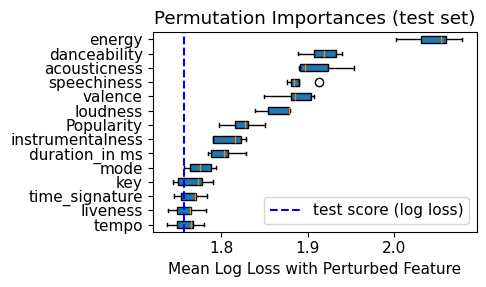


Aggregated Permutation Importances:
tempo: Mean=1.7594, Std=0.0149
liveness: Mean=1.7596, Std=0.0152
time_signature: Mean=1.7645, Std=0.0137
key: Mean=1.7669, Std=0.0174
mode: Mean=1.7753, Std=0.0141
duration_in ms: Mean=1.8022, Std=0.0156
instrumentalness: Mean=1.8097, Std=0.0162
Popularity: Mean=1.8241, Std=0.0178
loudness: Mean=1.8657, Std=0.0165
valence: Mean=1.8851, Std=0.0206
speechiness: Mean=1.8888, Std=0.0129
acousticness: Mean=1.9110, Std=0.0242
danceability: Mean=1.9173, Std=0.0185
energy: Mean=2.0457, Std=0.0264

Final Results:
Log Loss Scores: [1.734853096923254, 1.7444266206025636, 1.763774352556394, 1.7636273391169746, 1.7776602984828216]
F1 Scores: [0.37972077646438046, 0.36970289481563035, 0.3525260969300987, 0.37262585953087174, 0.3669493347001964]
Best Model Parameters: [{'C': 1}, {'C': 1}, {'C': 1}, {'C': 1}, {'C': 1}]

Average Log Loss across random states: 1.7569
Log Loss Standard Deviation: 0.0153
Average Test F1 across random states: 0.3683
Test F1 Standard Dev

In [ ]:
# Logistic regression (ridge regularization)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, f1_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Return baseline logloss and baseline accuracy scores as a reference
def calculate_baseline_scores(y):
    class_counts = y.value_counts(normalize=True)
    baseline_logloss = -np.sum(class_counts * np.log(class_counts))
    most_frequent_class = class_counts.idxmax()
    y_baseline_pred = [most_frequent_class] * len(y)
    baseline_f1 = f1_score(y, y_baseline_pred, average='macro')  # Use macro for multi-class F1
    return baseline_f1, baseline_logloss



def main_pipeline_lrl2(data_path):
    # Load data
    df = pd.read_csv(data_path)
    df = df.drop(columns=['Artist Name', 'Track Name'], errors='ignore')
    
    # Unify the unit of the duration column
    df["duration_in min/ms"] = np.where(df["duration_in min/ms"] < 100, df["duration_in min/ms"] * 60000, df["duration_in min/ms"])
    df.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace=True)
    
    # Preprocessing pipeline
    onehot_ftrs = ["key", "mode", "time_signature"]
    minmax_ftrs = ["acousticness", "instrumentalness"]
    std_ftrs = [
        "Popularity", "danceability", "energy", "loudness", "speechiness",
        "liveness", "valence", "tempo", "duration_in ms"
    ]

    # Preprocessing transformers
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Categorical missing values
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    minmax_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  # Multivariate imputation for numerical features in minmax_ftrs
        ('scaler', MinMaxScaler())
    ])

    numerical_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  # Multivariate imputation for numerical data
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),  # Categorical features
        ('minmax', minmax_transformer, minmax_ftrs),       # Minmax features with imputation
        ('std', numerical_transformer, std_ftrs)          # Other numerical features with imputation
    ])

    # Parameter grid for hyperparameter tuning
    param_grid = {
        "C": [0.01, 0.1, 1, 10, 100]  # Regularization strength (inverse of alpha)
    }

    # Initialize lists to store results
    logloss_scores = []
    f1_scores = []
    best_models = []
    aggregated_importances = {feature: [] for feature in df.columns if feature != 'Class'}
    baseline_f1_scores = []
    baseline_logloss_scores = []
    fold_scores_list = []  # Store all fold scores for each parameter combo
    fold_std_list = []     # Store the standard deviations for each parameter combo
    target = "Class"  

    # Loop over 5 different random states
    for random_state in range(5):
        print(f"\nRandom State {random_state}: Starting...")

        # Define target and features
        X = df.drop(columns=[target])
        y = df[target]

        # Split data into other and test sets
        X_other, X_test, y_other, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state, stratify=y)

        # Calculate baseline scores for this random state using y_test
        baseline_f1, baseline_logloss = calculate_baseline_scores(y_test)
        print(f"Random State {random_state} - Baseline F1 Score: {baseline_f1:.4f}")
        print(f"Random State {random_state} - Baseline Log Loss: {baseline_logloss:.4f}")

        baseline_f1_scores.append(baseline_f1)
        baseline_logloss_scores.append(baseline_logloss)

        # Prepare StratifiedKFold cross-validation
        kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)

        # Initialize variables for the best model
        best_score = float("inf")
        best_params = None
        best_model = None

        # Iterate over parameter grid
        for params_idx, params in enumerate(ParameterGrid(param_grid)):
            print(f"Random State {random_state}, Parameter Set {params_idx + 1}/{len(ParameterGrid(param_grid))}: {params}")
            fold_scores = []

            # Perform StratifiedKFold cross-validation (manual)
            for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_other,y_other)):
                print(f"    Fold {fold_idx + 1}/{kf.get_n_splits()} in progress...")
                X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
                y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]

                preprocessor.fit(X_train)
                X_train_prep = preprocessor.transform(X_train)
                X_val_prep = preprocessor.transform(X_val)

                feature_names = preprocessor.get_feature_names_out()
                X_train_prep = pd.DataFrame(X_train_prep, columns=feature_names).drop(
                    columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore'
                )
                X_val_prep = pd.DataFrame(X_val_prep, columns=feature_names).drop(
                    columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore'
                )

                model = LogisticRegression(class_weight='balanced',
                    C=params["C"], penalty="l2", solver="lbfgs", max_iter=1000, random_state=random_state
                )
                model.fit(X_train_prep, y_train)
                val_pred_proba = model.predict_proba(X_val_prep)
                fold_scores.append(log_loss(y_val, val_pred_proba))

            avg_log_loss = np.mean(fold_scores)
            std_log_loss = np.std(fold_scores)
            fold_scores_list.append(fold_scores)  # Add the fold scores for this parameter combo
            fold_std_list.append(std_log_loss)   # Add the standard deviation for this parameter combo

            if avg_log_loss < best_score:
                best_score = avg_log_loss
                best_params = params
                best_model = model

        # Evaluate the best model on the test set
        X_test_prep = preprocessor.transform(X_test)
        X_test_prep = pd.DataFrame(X_test_prep, columns=feature_names).drop(
            columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore'
        )
        feature_names = X_test_prep.columns.tolist()
        y_test_proba = best_model.predict_proba(X_test_prep)
        y_test_pred = best_model.predict(X_test_prep)
        test_logloss = log_loss(y_test, y_test_proba)
        test_f1 = f1_score(y_test, y_test_pred, average='macro')
        logloss_scores.append(test_logloss)
        f1_scores.append(test_f1)
        best_models.append(best_params)

        # Permutation Importance
        print(f"\nCalculating Permutation Importance for Random State {random_state}...")
        for feature in X_test.columns:
            X_test_shuffled = X_test.copy()
            X_test_shuffled[feature] = np.random.permutation(X_test[feature].values)

            X_test_shuffled_prep = preprocessor.transform(X_test_shuffled)
            X_test_shuffled_prep = pd.DataFrame(
                X_test_shuffled_prep, columns=preprocessor.get_feature_names_out()
            ).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

            shuffled_pred_proba = best_model.predict_proba(X_test_shuffled_prep)
            shuffled_log_loss = log_loss(y_test, shuffled_pred_proba)
            aggregated_importances[feature].append(shuffled_log_loss)
        print(f"Random State {random_state}: Best Log Loss = {test_logloss:.4f}, Test F1 = {test_f1:.4f}")
    
    print("\nValidation Scores Across Parameter Combinations:")
    for idx, (scores, std) in enumerate(zip(fold_scores_list, fold_std_list)):
        print(f"Parameter Combo {idx + 1}: Mean Log Loss = {np.mean(scores):.4f}, Std Dev = {std:.4f}")
        
    # Final results
    average_logloss = np.mean(logloss_scores)
    std_logloss = np.std(logloss_scores)
    average_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    avg_baseline_f1 = np.mean(baseline_f1_scores)
    std_baseline_f1 = np.std(baseline_f1_scores)
    avg_baseline_logloss = np.mean(baseline_logloss_scores)
    std_baseline_logloss = np.std(baseline_logloss_scores)

    # Aggregate permutation importances
    mean_importances = {k: np.mean(v) for k, v in aggregated_importances.items()}
    std_importances = {k: np.std(v) for k, v in aggregated_importances.items()}
    sorted_features = sorted(mean_importances, key=mean_importances.get, reverse=True)

  # Visualize aggregated permutation importances using boxplot
    sorted_features = sorted(aggregated_importances.keys(), key=lambda x: np.mean(aggregated_importances[x]), reverse=False)
    # Convert aggregated_importances to a matrix for boxplot
    scores_matrix = np.array([aggregated_importances[feature] for feature in sorted_features])

    plt.rcParams.update({'font.size': 11})
    plt.figure(figsize=(5, 3))
    plt.boxplot(scores_matrix.T, vert=False, patch_artist=True, tick_labels=sorted_features)
    plt.axvline(average_logloss, color='blue', linestyle='--', label='test score (log loss)')
    plt.title("Permutation Importances (test set)")
    plt.xlabel('Mean Log Loss with Perturbed Feature')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\nAggregated Permutation Importances:")
    for feature in sorted_features:
        print(f"{feature}: Mean={mean_importances[feature]:.4f}, Std={std_importances[feature]:.4f}")


    print("\nFinal Results:")
    print("Log Loss Scores:", logloss_scores)
    print("F1 Scores:", f1_scores)
    print("Best Model Parameters:", best_models)
    print(f"\nAverage Log Loss across random states: {average_logloss:.4f}")
    print(f"Log Loss Standard Deviation: {std_logloss:.4f}")
    print(f"Average Test F1 across random states: {average_f1:.4f}")
    print(f"Test F1 Standard Deviation: {std_f1:.4f}")
    print("\nBaseline Scores Across Random States:")
    print(f"Average Baseline F1: {avg_baseline_f1:.4f}, Std Dev: {std_baseline_f1:.4f}")
    print(f"Average Baseline Log Loss: {avg_baseline_logloss:.4f}, Std Dev: {std_baseline_logloss:.4f}")

    # Return results
    return {
        'Best Models': best_models,
        'Log Loss Scores': logloss_scores,
        'F1 Scores': f1_scores,
        'Average Log Loss': average_logloss,
        'Log Loss Std Dev': std_logloss,
        'Average Test F1': average_f1,
        'F1 Std Dev': std_f1,
        'Permutation Importances': aggregated_importances,
        'Baseline F1 Scores': baseline_f1_scores,
        'Baseline Log Loss Scores': baseline_logloss_scores,
        'Fold Scores': fold_scores_list,
        'Fold Score Standard Deviations': fold_std_list
    }


# Run pipeline
if __name__ == "__main__":
    data_path = 'music.csv'
    results = main_pipeline_lrl2(data_path)
    print("Pipeline completed.")


Random State 0: Starting...
Random State 0 - Baseline F1 Score: 0.0392
Random State 0 - Baseline Log Loss: 2.1237
Random State 0, Parameter Set 1/15: {'C': 0.01, 'l1_ratio': 0.1}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 2/15: {'C': 0.01, 'l1_ratio': 0.5}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 3/15: {'C': 0.01, 'l1_ratio': 0.9}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 4/15: {'C': 0.1, 'l1_ratio': 0.1}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 5/15: {'C': 0.1, 'l1_ratio': 0.5}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Ra

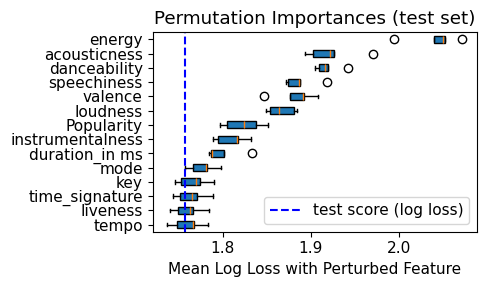


Aggregated Permutation Importances:
tempo: Mean=1.7606, Std=0.0162
liveness: Mean=1.7607, Std=0.0151
time_signature: Mean=1.7639, Std=0.0159
key: Mean=1.7668, Std=0.0159
mode: Mean=1.7772, Std=0.0139
duration_in ms: Mean=1.7989, Std=0.0179
instrumentalness: Mean=1.8102, Std=0.0158
Popularity: Mean=1.8229, Std=0.0202
loudness: Mean=1.8665, Std=0.0140
valence: Mean=1.8833, Std=0.0206
speechiness: Mean=1.8880, Std=0.0165
danceability: Mean=1.9183, Std=0.0129
acousticness: Mean=1.9230, Std=0.0265
energy: Mean=2.0416, Std=0.0257

Final Results:
Log Loss Scores: [1.7347680378003374, 1.7443465963100293, 1.7629890220561655, 1.7628935181019683, 1.7800015515348642]
F1 Scores: [0.3807326204087906, 0.36948689268940355, 0.3530538135743797, 0.3728168801292935, 0.3669393973149845]
Best Model Parameters: [{'C': 1, 'l1_ratio': 0.9}, {'C': 1, 'l1_ratio': 0.9}, {'C': 1, 'l1_ratio': 0.9}, {'C': 1, 'l1_ratio': 0.9}, {'C': 1, 'l1_ratio': 0.9}]

Average Log Loss across random states: 1.7570
Log Loss Standar

In [2]:
#logistic regression (elastic net regularization)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, f1_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Return baseline logloss and baseline accuracy scores as a reference
def calculate_baseline_scores(y):
    class_counts = y.value_counts(normalize=True)
    baseline_logloss = -np.sum(class_counts * np.log(class_counts))
    most_frequent_class = class_counts.idxmax()
    y_baseline_pred = [most_frequent_class] * len(y)
    baseline_f1 = f1_score(y, y_baseline_pred, average='macro')  # Use macro for multi-class F1
    return baseline_f1, baseline_logloss



def main_pipeline_elastic_net(data_path):
    #Load data
    df = pd.read_csv(data_path)
    df = df.drop(columns=['Artist Name', 'Track Name'], errors='ignore')
    
    #Unify the unit of the duration column
    df["duration_in min/ms"] = np.where(df["duration_in min/ms"] < 100, df["duration_in min/ms"] * 60000, df["duration_in min/ms"])
    df.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace=True)
    
    #Preprocessing pipeline
    onehot_ftrs = ["key", "mode", "time_signature"]
    minmax_ftrs = ["acousticness", "instrumentalness"]
    std_ftrs = [
        "Popularity", "danceability", "energy", "loudness", "speechiness",
        "liveness", "valence", "tempo", "duration_in ms"
    ]

    #Preprocessing transformers
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  #categorical missing values
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    minmax_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical features in minmax_ftrs
        ('scaler', MinMaxScaler())
    ])

    numerical_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical data
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),  #categorical features
        ('minmax', minmax_transformer, minmax_ftrs),       #minmax features with imputation
        ('std', numerical_transformer, std_ftrs)          #other numerical features with imputation
    ])

    #Parameter grid for hyperparameter tuning
    param_grid = {
        "C": [0.01, 0.1, 1, 10, 100],     #Regularization strength (inverse of alpha)
        "l1_ratio": [0.1, 0.5, 0.9]       #Mixing ratio between L1 and L2
    }

    #Initialize lists to store results
    logloss_scores = []
    f1_scores = []
    best_models = []
    aggregated_importances = {feature: [] for feature in df.columns if feature != 'Class'}
    baseline_f1_scores = []
    baseline_logloss_scores = []
    fold_scores_list = []
    fold_std_list = []

    target = "Class"  
    
    #Loop over 5 different random states
    for random_state in range(5):
        print(f"\nRandom State {random_state}: Starting...")

        #Define target and features
        X = df.drop(columns=[target])
        y = df[target]

        #Split data into other and test sets
        X_other, X_test, y_other, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state, stratify=y)
        
        # Calculate baseline scores for this random state using y_test
        baseline_f1, baseline_logloss = calculate_baseline_scores(y_test)
        print(f"Random State {random_state} - Baseline F1 Score: {baseline_f1:.4f}")
        print(f"Random State {random_state} - Baseline Log Loss: {baseline_logloss:.4f}")

        # Append baseline scores
        baseline_f1_scores.append(baseline_f1)
        baseline_logloss_scores.append(baseline_logloss)

        #Prepare StratifiedKFold cross-validation
        kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)

        #Initialize variables for the best model
        best_score = float("inf")
        best_params = None
        best_model = None

        #Iterate over parameter grid
        for params_idx, params in enumerate(ParameterGrid(param_grid)):
            print(f"Random State {random_state}, Parameter Set {params_idx + 1}/{len(ParameterGrid(param_grid))}: {params}")
            fold_scores = []

            #Perform Stratified K-Fold cross-validation (manual)
            for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_other,y_other)):
                print(f"    Fold {fold_idx + 1}/{kf.get_n_splits()} in progress...")
                #Train/validation split for this fold
                X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
                y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]

                #Fit preprocessor on the training set only
                preprocessor.fit(X_train)

                #Transform both training and validation sets
                X_train_prep = preprocessor.transform(X_train)
                X_val_prep = preprocessor.transform(X_val)

                #Get feature names and drop unnecessary columns
                feature_names = preprocessor.get_feature_names_out()
                X_train_prep = pd.DataFrame(X_train_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
                X_val_prep = pd.DataFrame(X_val_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

                #Train the Logistic Regression model with Elastic Net
                model = LogisticRegression(class_weight='balanced',
                    C=params["C"],
                    penalty="elasticnet",  #Elastic Net regularization
                    solver="saga",        #Solver supporting Elastic Net
                    l1_ratio=params["l1_ratio"],  #Mixing ratio
                    max_iter=2000,
                    random_state=random_state
                )

                #Train and predict on validation set
                model.fit(X_train_prep, y_train)
                val_pred_proba = model.predict_proba(X_val_prep)
                fold_log_loss = log_loss(y_val, val_pred_proba)
                fold_scores.append(fold_log_loss)

            #Average log loss across folds
            avg_log_loss = np.mean(fold_scores)

            # Calculate standard deviation of fold scores
            std_log_loss = np.std(fold_scores)

            # Store fold scores and standard deviation
            fold_scores_list.append(fold_scores)
            fold_std_list.append(std_log_loss)

            #Update the best model if current is better
            if avg_log_loss < best_score:
                best_score = avg_log_loss
                best_params = params
                best_model = model

        # valuate the best model on the test set
        X_test_prep = preprocessor.transform(X_test)
        X_test_prep = pd.DataFrame(X_test_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

        y_test_proba = best_model.predict_proba(X_test_prep)
        y_test_pred = best_model.predict(X_test_prep)
        test_logloss = log_loss(y_test, y_test_proba)
        test_f1 = f1_score(y_test, y_test_pred, average='macro')
        logloss_scores.append(test_logloss)
        f1_scores.append(test_f1)
        best_models.append(best_params)

        # Permutation Importance
        print(f"\nCalculating Permutation Importance for Random State {random_state}...")
        for feature in X_test.columns:
            X_test_shuffled = X_test.copy()
            X_test_shuffled[feature] = np.random.permutation(X_test[feature].values)

            X_test_shuffled_prep = preprocessor.transform(X_test_shuffled)
            X_test_shuffled_prep = pd.DataFrame(
                X_test_shuffled_prep, columns=preprocessor.get_feature_names_out()
            ).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

            shuffled_pred_proba = best_model.predict_proba(X_test_shuffled_prep)
            shuffled_log_loss = log_loss(y_test, shuffled_pred_proba)
            aggregated_importances[feature].append(shuffled_log_loss)
            
        print(f"Random State {random_state}: Best Log Loss = {test_logloss:.4f}, Test F1 = {test_f1:.4f}")

    # Final results
    average_logloss = np.mean(logloss_scores)
    std_logloss = np.std(logloss_scores)  
    average_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    avg_baseline_f1 = np.mean(baseline_f1_scores)
    std_baseline_f1 = np.std(baseline_f1_scores)
    avg_baseline_logloss = np.mean(baseline_logloss_scores)
    std_baseline_logloss = np.std(baseline_logloss_scores)

    # Print fold score statistics
    print("\nValidation Scores Across Parameter Combinations:")
    for idx, (scores, std) in enumerate(zip(fold_scores_list, fold_std_list)):
        print(f"Parameter Combo {idx + 1}: Mean Log Loss = {np.mean(scores):.4f}, Std Dev = {std:.4f}")

    # Aggregate permutation importances
    mean_importances = {k: np.mean(v) for k, v in aggregated_importances.items()}
    std_importances = {k: np.std(v) for k, v in aggregated_importances.items()}
    sorted_features = sorted(mean_importances, key=mean_importances.get, reverse=True)

    # Visualize aggregated permutation importances using boxplot
    sorted_features = sorted(aggregated_importances.keys(), key=lambda x: np.mean(aggregated_importances[x]), reverse=False)
    # Convert aggregated_importances to a matrix for boxplot
    scores_matrix = np.array([aggregated_importances[feature] for feature in sorted_features])

    plt.rcParams.update({'font.size': 11})
    plt.figure(figsize=(5, 3))
    plt.boxplot(scores_matrix.T, vert=False, patch_artist=True, tick_labels=sorted_features)
    plt.axvline(average_logloss, color='blue', linestyle='--', label='test score (log loss)')
    plt.title("Permutation Importances (test set)")
    plt.xlabel('Mean Log Loss with Perturbed Feature')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\nAggregated Permutation Importances:")
    for feature in sorted_features:
        print(f"{feature}: Mean={mean_importances[feature]:.4f}, Std={std_importances[feature]:.4f}")


    print("\nFinal Results:")
    print("Log Loss Scores:", logloss_scores)
    print("F1 Scores:", f1_scores)
    print("Best Model Parameters:", best_models)
    print(f"\nAverage Log Loss across random states: {average_logloss:.4f}")
    print(f"Log Loss Standard Deviation: {std_logloss:.4f}")
    print(f"Average Test F1 across random states: {average_f1:.4f}")
    print(f"Test F1 Standard Deviation: {std_f1:.4f}")
    print("\nBaseline Scores Across Random States:")
    print(f"Average Baseline F1: {avg_baseline_f1:.4f}, Std Dev: {std_baseline_f1:.4f}")
    print(f"Average Baseline Log Loss: {avg_baseline_logloss:.4f}, Std Dev: {std_baseline_logloss:.4f}")
    # Return results
    return {
        'Best Models': best_models,
        'Log Loss Scores': logloss_scores,
        'F1 Scores': f1_scores,
        'Average Log Loss': average_logloss,
        'Log Loss Std Dev': std_logloss,
        'Average Test F1': average_f1,
        'F1 Std Dev': std_f1,
        'Permutation Importances': aggregated_importances,
        'Baseline F1 Scores': baseline_f1_scores,
        'Baseline Log Loss Scores': baseline_logloss_scores,
        'Fold Scores': fold_scores_list,
        'Fold Score Standard Deviations': fold_std_list
    }

#Run pipeline
if __name__ == "__main__":
    data_path = 'music.csv'
    results = main_pipeline_elastic_net(data_path)
    print("Pipeline completed.")


Random State 0: Starting...
Random State 0 - Baseline F1 Score: 0.0392
Random State 0 - Baseline Log Loss: 2.1237
Random State 0, Parameter Set 1/28: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 2/28: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 3/28: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 4/28: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 5/28: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
    Fold 1

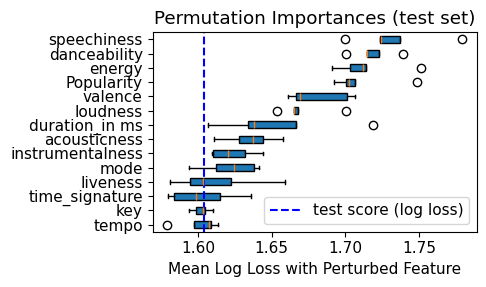


Aggregated Permutation Importances:
tempo: Mean=1.6010, Std=0.0122
key: Mean=1.6019, Std=0.0055
time_signature: Mean=1.6023, Std=0.0209
liveness: Mean=1.6118, Std=0.0271
mode: Mean=1.6219, Std=0.0173
instrumentalness: Mean=1.6231, Std=0.0132
acousticness: Mean=1.6353, Std=0.0158
duration_in ms: Mean=1.6528, Std=0.0381
loudness: Mean=1.6705, Std=0.0158
valence: Mean=1.6810, Std=0.0190
Popularity: Mean=1.7101, Std=0.0200
energy: Mean=1.7142, Std=0.0203
danceability: Mean=1.7184, Std=0.0127
speechiness: Mean=1.7328, Std=0.0263

Final Results:
Log Loss Scores: [1.6109336408559987, 1.5836467561403946, 1.5895148069140295, 1.5945758255600972, 1.6420769942095041]
F1 Scores: [0.30991819698554174, 0.3011331391277357, 0.3163786568094576, 0.29648674561163824, 0.30650424297150775]
Best Model Parameters: [{'n_neighbors': 200, 'p': 1, 'weights': 'uniform'}, {'n_neighbors': 200, 'p': 1, 'weights': 'uniform'}, {'n_neighbors': 200, 'p': 1, 'weights': 'uniform'}, {'n_neighbors': 200, 'p': 1, 'weights': 

In [ ]:
#K Nearest Neighbors
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, f1_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np

#Return baseline logloss and baseline accuracy scores as a reference
def calculate_baseline_scores(y):
    class_counts = y.value_counts(normalize=True)
    baseline_logloss = -np.sum(class_counts * np.log(class_counts))
    most_frequent_class = class_counts.idxmax()
    y_baseline_pred = [most_frequent_class] * len(y)
    baseline_f1 = f1_score(y, y_baseline_pred, average='macro')  # Use macro for multi-class F1
    return baseline_f1, baseline_logloss



def main_pipeline_knn(data_path):
    #Load data
    df = pd.read_csv(data_path)
    df = df.drop(columns=['Artist Name', 'Track Name'], errors='ignore')
    
    #Unify the unit of the duration column
    df["duration_in min/ms"] = np.where(df["duration_in min/ms"] < 100, df["duration_in min/ms"] * 60000, df["duration_in min/ms"])
    df.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace=True)
    
    #Preprocessing pipeline
    onehot_ftrs = ["key", "mode", "time_signature"]
    minmax_ftrs = ["acousticness", "instrumentalness"]
    std_ftrs = [
        "Popularity", "danceability", "energy", "loudness", "speechiness",
        "liveness", "valence", "tempo", "duration_in ms"
    ]

    #Preprocessing transformers
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  #categorical missing values
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    minmax_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical features in minmax_ftrs
        ('scaler', MinMaxScaler())
    ])

    numerical_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical data
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),  #categorical features
        ('minmax', minmax_transformer, minmax_ftrs),       #minmax features with imputation
        ('std', numerical_transformer, std_ftrs)          #numerical features with imputation
    ])

    #Parameter grid for hyperparameter tuning
    param_grid = {
        "n_neighbors": [3, 9, 20, 30, 50, 100, 200],   #Number of neighbors
        "weights": ["uniform", "distance"],  #Weighting strategy
        "p": [1, 2]  #Distance metric: 1 (Manhattan), 2 (Euclidean)
    }

    #Initialize lists to store results
    logloss_scores = []
    f1_scores = []
    best_models = []
    aggregated_importances = {feature: [] for feature in df.columns if feature != 'Class'}
    baseline_f1_scores = []
    baseline_logloss_scores = []
    fold_scores_list = []
    fold_std_list = []

    target = "Class"  

    #Loop over 5 different random states
    for random_state in range(5):
        print(f"\nRandom State {random_state}: Starting...")

        #Define target and features
        X = df.drop(columns=[target])
        y = df[target]

        #Split data into other and test sets
        X_other, X_test, y_other, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state, stratify=y)
        
        # Calculate baseline scores for this random state using y_test
        baseline_f1, baseline_logloss = calculate_baseline_scores(y_test)
        print(f"Random State {random_state} - Baseline F1 Score: {baseline_f1:.4f}")
        print(f"Random State {random_state} - Baseline Log Loss: {baseline_logloss:.4f}")

        # Append baseline scores
        baseline_f1_scores.append(baseline_f1)
        baseline_logloss_scores.append(baseline_logloss)

        #Prepare StratifiedKFold cross-validation
        kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)

        #Initialize variables for the best model
        best_score = float("inf")
        best_params = None
        best_model = None

        #Iterate over parameter grid
        for params_idx, params in enumerate(ParameterGrid(param_grid)):
            print(f"Random State {random_state}, Parameter Set {params_idx + 1}/{len(ParameterGrid(param_grid))}: {params}")
            fold_scores = []

            #Perform StratifiedKFold cross-validation (manual)
            for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_other,y_other)):
                print(f"    Fold {fold_idx + 1}/{kf.get_n_splits()} in progress...")
                #Train/validation split for this fold
                X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
                y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]

                #Fit preprocessor on the training set only
                preprocessor.fit(X_train)

                #Transform both training and validation sets
                X_train_prep = preprocessor.transform(X_train)
                X_val_prep = preprocessor.transform(X_val)

                #Get feature names and drop unnecessary columns
                feature_names = preprocessor.get_feature_names_out()
                X_train_prep = pd.DataFrame(X_train_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
                X_val_prep = pd.DataFrame(X_val_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

                #Train the KNN model
                model = KNeighborsClassifier(
                    n_neighbors=params["n_neighbors"],
                    weights=params["weights"],
                    p=params["p"]
                )

                #Train and predict on validation set
                model.fit(X_train_prep, y_train)
                val_pred_proba = model.predict_proba(X_val_prep)
                fold_log_loss = log_loss(y_val, val_pred_proba)
                fold_scores.append(fold_log_loss)

            #Average log loss across folds
            avg_log_loss = np.mean(fold_scores)
            # Calculate standard deviation of fold scores
            std_log_loss = np.std(fold_scores)

            # Store fold scores and standard deviation
            fold_scores_list.append(fold_scores)
            fold_std_list.append(std_log_loss)

            #Update the best model if current is better
            if avg_log_loss < best_score:
                best_score = avg_log_loss
                best_params = params
                best_model = model

        #Evaluate the best model on the test set
        X_test_prep = preprocessor.transform(X_test)
        X_test_prep = pd.DataFrame(X_test_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

        y_test_proba = best_model.predict_proba(X_test_prep)
        y_test_pred = best_model.predict(X_test_prep)
        test_logloss = log_loss(y_test, y_test_proba)
        test_f1 = f1_score(y_test, y_test_pred, average='macro')
        logloss_scores.append(test_logloss)
        f1_scores.append(test_f1)
        best_models.append(best_params)
        # Permutation Importance
        print(f"\nCalculating Permutation Importance for Random State {random_state}...")
        for feature in X_test.columns:
            X_test_shuffled = X_test.copy()
            X_test_shuffled[feature] = np.random.permutation(X_test[feature].values)

            X_test_shuffled_prep = preprocessor.transform(X_test_shuffled)
            X_test_shuffled_prep = pd.DataFrame(
                X_test_shuffled_prep, columns=preprocessor.get_feature_names_out()
            ).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

            shuffled_pred_proba = best_model.predict_proba(X_test_shuffled_prep)
            shuffled_log_loss = log_loss(y_test, shuffled_pred_proba)
            aggregated_importances[feature].append(shuffled_log_loss)
        print(f"Random State {random_state}: Best Log Loss = {test_logloss:.4f}, Test F1 = {test_f1:.4f}")

    # Final results
    average_logloss = np.mean(logloss_scores)
    std_logloss = np.std(logloss_scores)  
    average_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    avg_baseline_f1 = np.mean(baseline_f1_scores)
    std_baseline_f1 = np.std(baseline_f1_scores)
    avg_baseline_logloss = np.mean(baseline_logloss_scores)
    std_baseline_logloss = np.std(baseline_logloss_scores)

    # Print fold score statistics
    print("\nValidation Scores Across Parameter Combinations:")
    for idx, (scores, std) in enumerate(zip(fold_scores_list, fold_std_list)):
        print(f"Parameter Combo {idx + 1}: Mean Log Loss = {np.mean(scores):.4f}, Std Dev = {std:.4f}")


    # Aggregate permutation importances
    mean_importances = {k: np.mean(v) for k, v in aggregated_importances.items()}
    std_importances = {k: np.std(v) for k, v in aggregated_importances.items()}
    sorted_features = sorted(mean_importances, key=mean_importances.get, reverse=True)

    # Visualize aggregated permutation importances using boxplot
    sorted_features = sorted(aggregated_importances.keys(), key=lambda x: np.mean(aggregated_importances[x]), reverse=False)
    # Convert aggregated_importances to a matrix for boxplot
    scores_matrix = np.array([aggregated_importances[feature] for feature in sorted_features])

    plt.rcParams.update({'font.size': 11})
    plt.figure(figsize=(5, 3))
    plt.boxplot(scores_matrix.T, vert=False, patch_artist=True, tick_labels=sorted_features)
    plt.axvline(average_logloss, color='blue', linestyle='--', label='test score (log loss)')
    plt.title("Permutation Importances (test set)")
    plt.xlabel('Mean Log Loss with Perturbed Feature')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\nAggregated Permutation Importances:")
    for feature in sorted_features:
        print(f"{feature}: Mean={mean_importances[feature]:.4f}, Std={std_importances[feature]:.4f}")

    print("\nFinal Results:")
    print("Log Loss Scores:", logloss_scores)
    print("F1 Scores:", f1_scores)
    print("Best Model Parameters:", best_models)
    print(f"\nAverage Log Loss across random states: {average_logloss:.4f}")
    print(f"Log Loss Standard Deviation: {std_logloss:.4f}")
    print(f"Average Test F1 across random states: {average_f1:.4f}")
    print(f"Test F1 Standard Deviation: {std_f1:.4f}")
    print("\nBaseline Scores Across Random States:")
    print(f"Average Baseline F1: {avg_baseline_f1:.4f}, Std Dev: {std_baseline_f1:.4f}")
    print(f"Average Baseline Log Loss: {avg_baseline_logloss:.4f}, Std Dev: {std_baseline_logloss:.4f}")


    # Return results
    return {
        'Best Models': best_models,
        'Log Loss Scores': logloss_scores,
        'F1 Scores': f1_scores,
        'Average Log Loss': average_logloss,
        'Log Loss Std Dev': std_logloss,
        'Average Test F1': average_f1,
        'F1 Std Dev': std_f1,
        'Permutation Importances': aggregated_importances,
        'Baseline F1 Scores': baseline_f1_scores,
        'Baseline Log Loss Scores': baseline_logloss_scores,
        'Fold Scores': fold_scores_list,
        'Fold Score Standard Deviations': fold_std_list
    }

#Run pipeline
if __name__ == "__main__":
    data_path = 'music.csv'
    results = main_pipeline_knn(data_path)
    print("Pipeline completed.")


Random State 0: Starting...
Random State 0 - Baseline F1 Score: 0.0392
Random State 0 - Baseline Log Loss: 2.1237
Random State 0, Parameter Set 1/27: {'max_depth': 3, 'reg_alpha': 1.0, 'reg_lambda': 10.0}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 2/27: {'max_depth': 3, 'reg_alpha': 1.0, 'reg_lambda': 100.0}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 3/27: {'max_depth': 3, 'reg_alpha': 1.0, 'reg_lambda': 1000.0}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 4/27: {'max_depth': 3, 'reg_alpha': 10.0, 'reg_lambda': 10.0}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 5/27: {'max_depth': 3, 'reg_alpha': 10.

<Figure size 1200x1000 with 0 Axes>

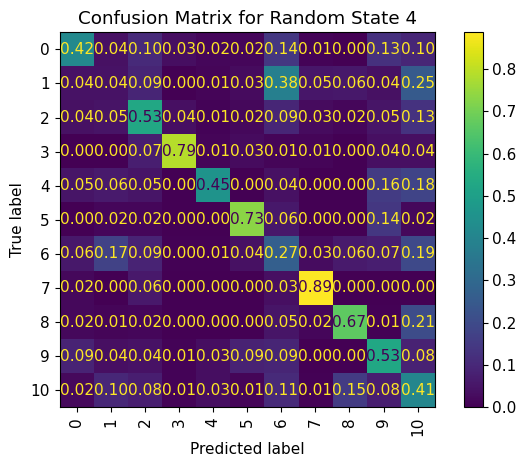


Calculating SHAP values for Random State 4...


100%|===================| 39599/39600 [320:45<00:00]         


Shape details:
X_test_prep shape: (3600, 27)
SHAP values shape: (3600, 27, 11)


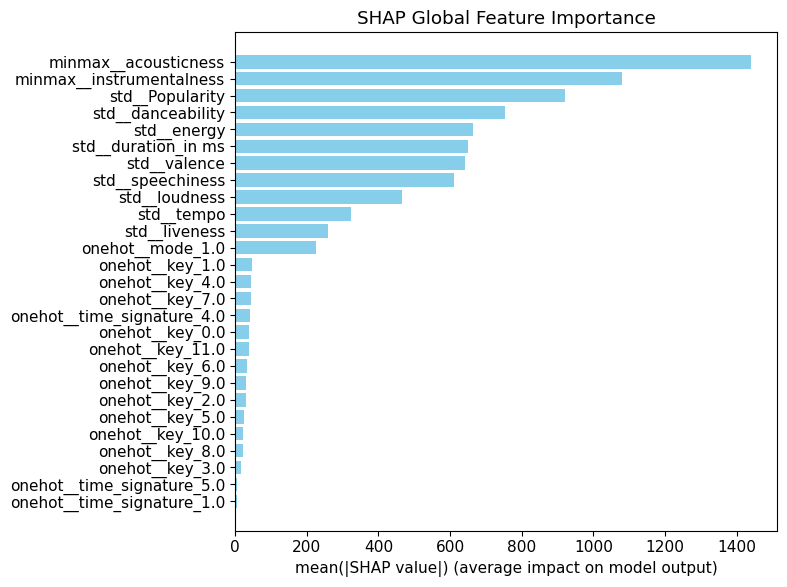

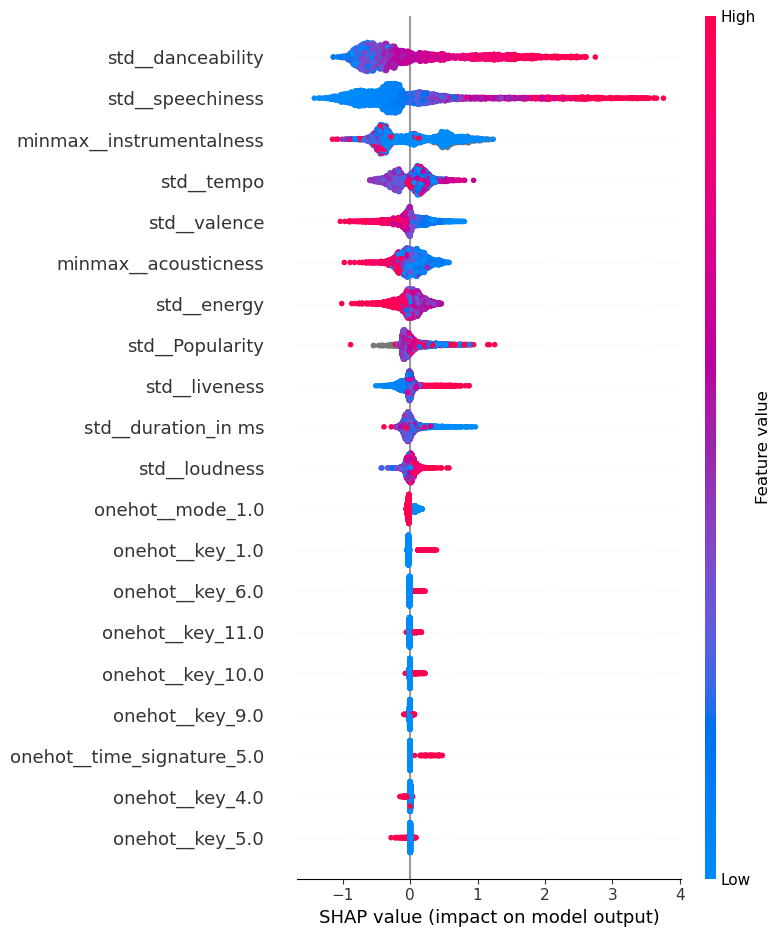

<Figure size 640x480 with 0 Axes>

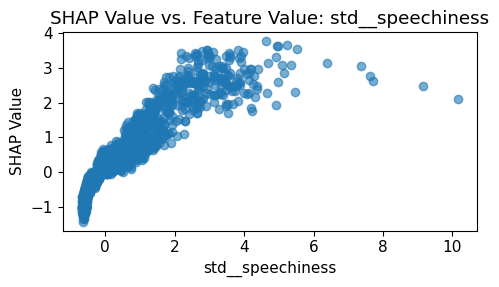

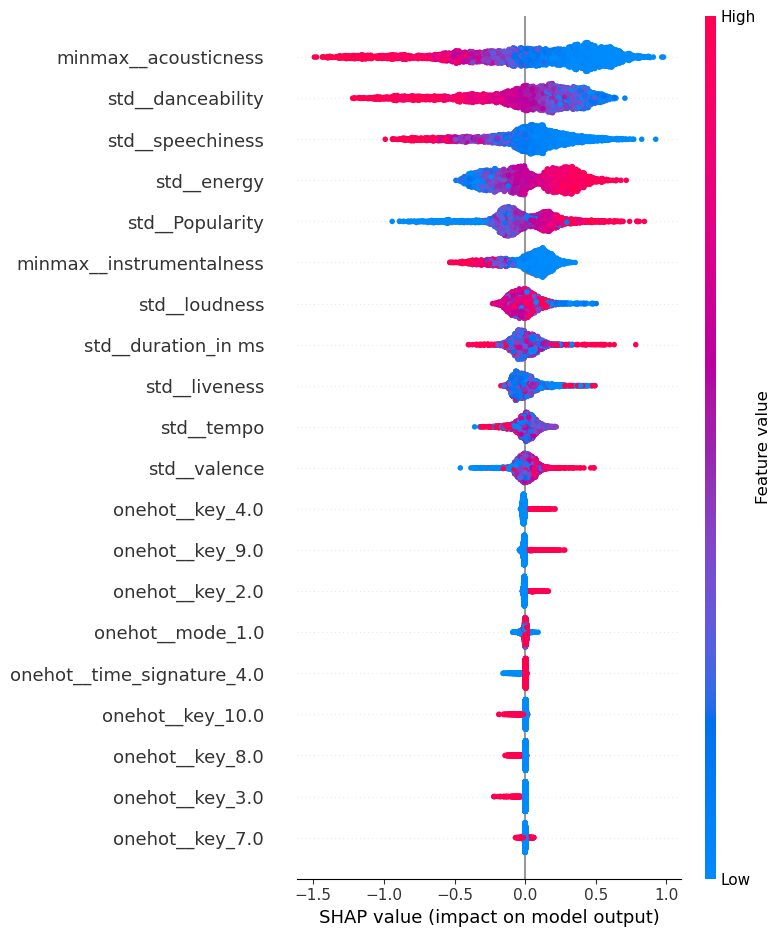

<Figure size 640x480 with 0 Axes>

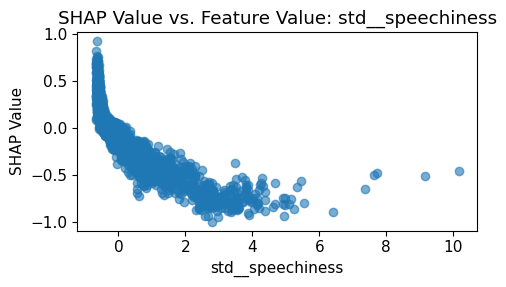


Expected value for class 5 (Index 10): -1.42


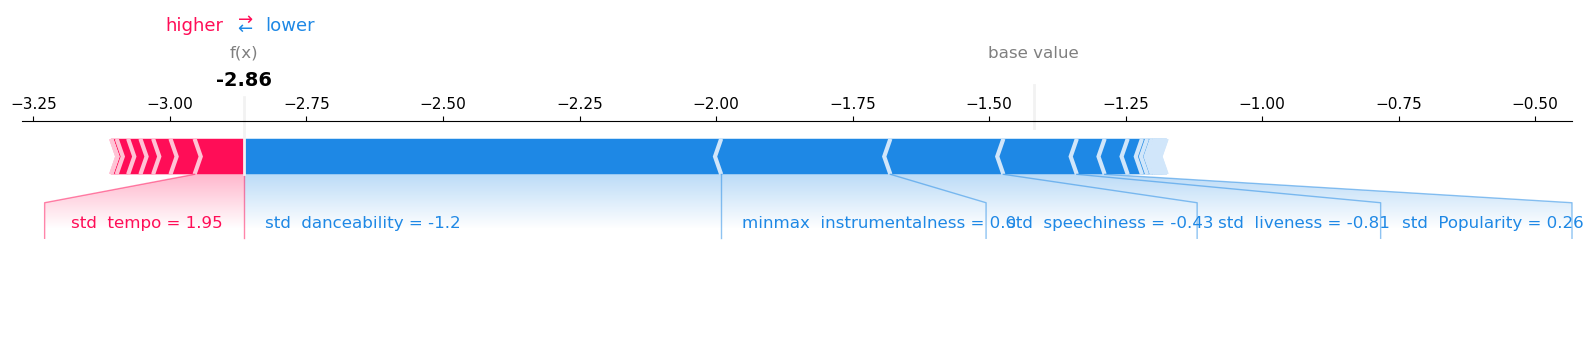


Expected value for class 5 (Index 100): -1.42


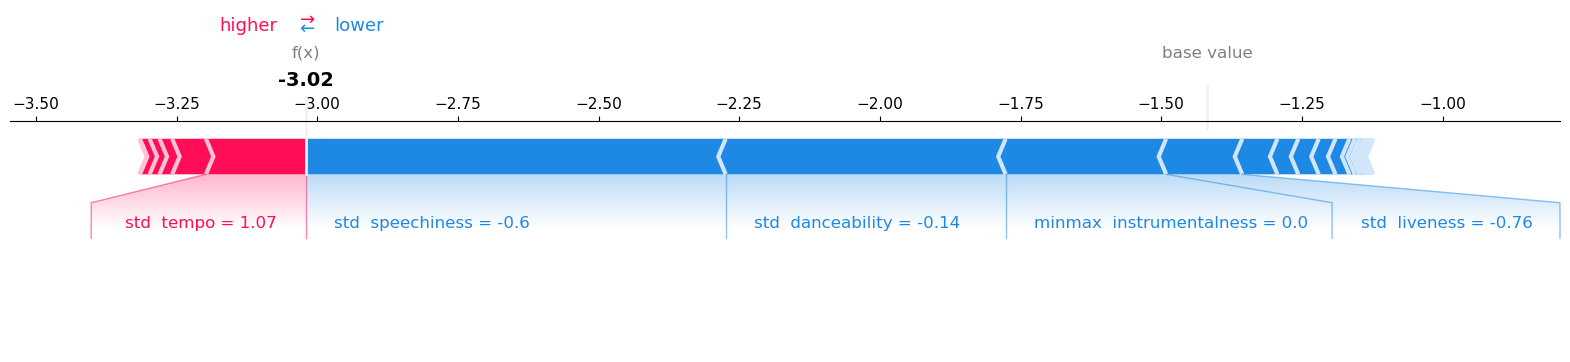


Expected value for class 5 (Index 1000): -1.42


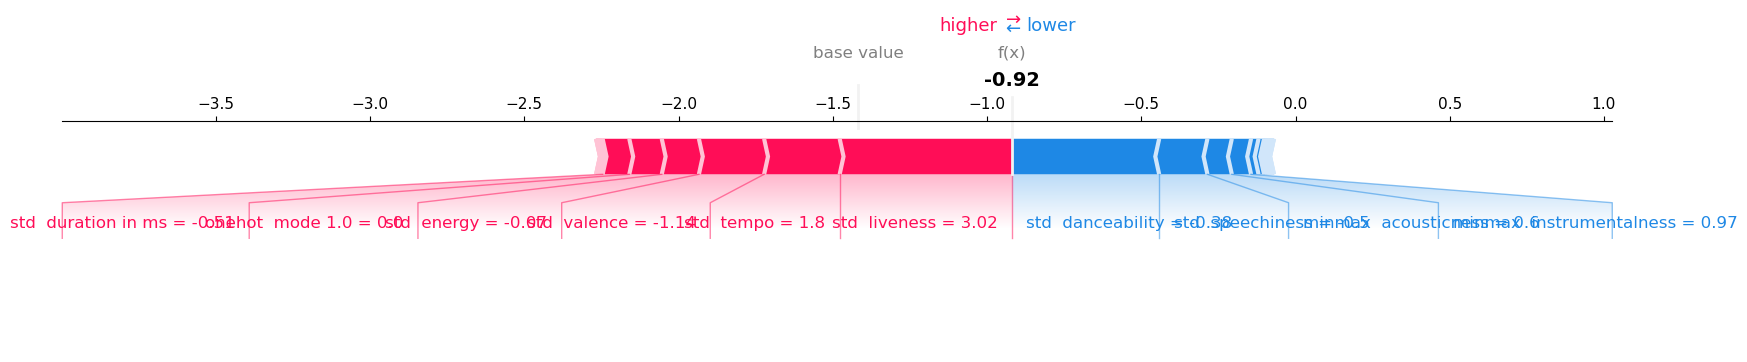


Calculating Permutation Importance for Random State 4...
Random State 4: Best Log Loss = 1.4453, Test F1 = 0.4834

Validation Scores Across Parameter Combinations:
Parameter Combo 1: Mean Log Loss = 1.4787, Std Dev = 0.0190
Parameter Combo 2: Mean Log Loss = 1.4854, Std Dev = 0.0186
Parameter Combo 3: Mean Log Loss = 1.5031, Std Dev = 0.0178
Parameter Combo 4: Mean Log Loss = 1.4801, Std Dev = 0.0177
Parameter Combo 5: Mean Log Loss = 1.4870, Std Dev = 0.0189
Parameter Combo 6: Mean Log Loss = 1.5048, Std Dev = 0.0175
Parameter Combo 7: Mean Log Loss = 1.5077, Std Dev = 0.0169
Parameter Combo 8: Mean Log Loss = 1.5113, Std Dev = 0.0163
Parameter Combo 9: Mean Log Loss = 1.5243, Std Dev = 0.0162
Parameter Combo 10: Mean Log Loss = 1.5093, Std Dev = 0.0187
Parameter Combo 11: Mean Log Loss = 1.4775, Std Dev = 0.0165
Parameter Combo 12: Mean Log Loss = 1.4770, Std Dev = 0.0189
Parameter Combo 13: Mean Log Loss = 1.4922, Std Dev = 0.0167
Parameter Combo 14: Mean Log Loss = 1.4770, Std Dev

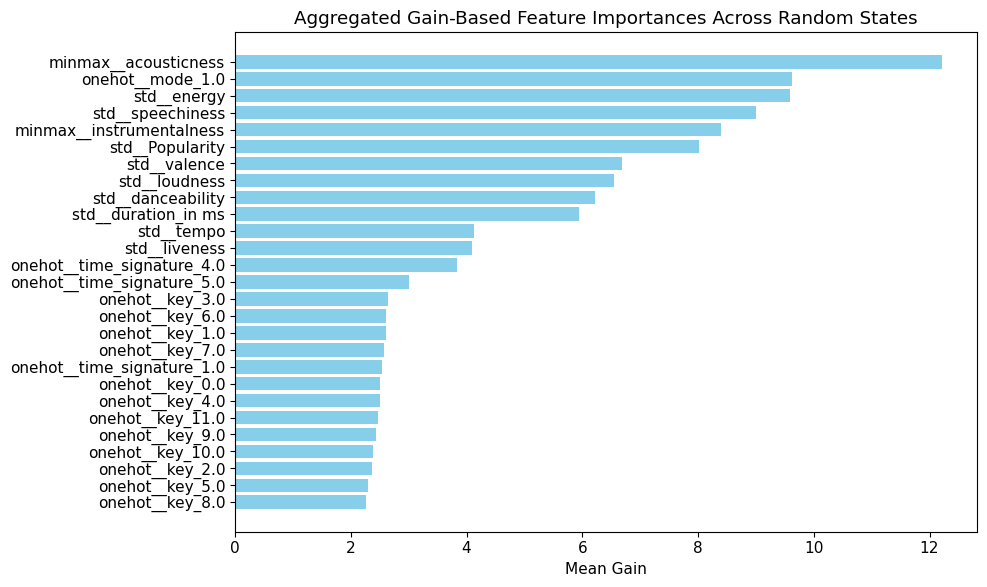


Aggregated Gain-Based Feature Importances Across Random States:
minmax__acousticness: Mean Gain = 12.2095
onehot__mode_1.0: Mean Gain = 9.6182
std__energy: Mean Gain = 9.5823
std__speechiness: Mean Gain = 9.0090
minmax__instrumentalness: Mean Gain = 8.3898
std__Popularity: Mean Gain = 8.0099
std__valence: Mean Gain = 6.6790
std__loudness: Mean Gain = 6.5505
std__danceability: Mean Gain = 6.2174
std__duration_in ms: Mean Gain = 5.9463
std__tempo: Mean Gain = 4.1318
std__liveness: Mean Gain = 4.1013
onehot__time_signature_4.0: Mean Gain = 3.8406
onehot__time_signature_5.0: Mean Gain = 3.0091
onehot__key_3.0: Mean Gain = 2.6461
onehot__key_6.0: Mean Gain = 2.6149
onehot__key_1.0: Mean Gain = 2.5996
onehot__key_7.0: Mean Gain = 2.5655
onehot__time_signature_1.0: Mean Gain = 2.5306
onehot__key_0.0: Mean Gain = 2.5043
onehot__key_4.0: Mean Gain = 2.4974
onehot__key_11.0: Mean Gain = 2.4736
onehot__key_9.0: Mean Gain = 2.4287
onehot__key_10.0: Mean Gain = 2.3827
onehot__key_2.0: Mean Gain = 

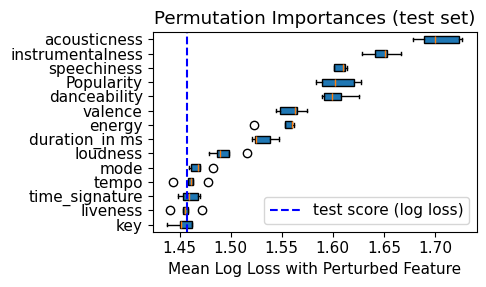


Aggregated Permutation Importances:
key: Mean=1.4528, Std=0.0091
liveness: Mean=1.4556, Std=0.0101
time_signature: Mean=1.4597, Std=0.0084
tempo: Mean=1.4606, Std=0.0112
mode: Mean=1.4678, Std=0.0082
loudness: Mean=1.4937, Std=0.0126
duration_in ms: Mean=1.5309, Std=0.0102
energy: Mean=1.5515, Std=0.0146
valence: Mean=1.5588, Std=0.0112
danceability: Mean=1.6028, Std=0.0134
Popularity: Mean=1.6046, Std=0.0173
speechiness: Mean=1.6074, Std=0.0055
instrumentalness: Mean=1.6482, Std=0.0125
acousticness: Mean=1.7036, Std=0.0189

Final Results:
Log Loss Scores: [1.450299554093694, 1.4644010976352522, 1.456047575388929, 1.4681800939482903, 1.4452831278448957]
F1 Scores: [0.48195561776850265, 0.47106905671757465, 0.471687294352925, 0.46921333740033494, 0.4834182506959994]
Best Model Parameters: [{'max_depth': 10, 'reg_alpha': 10.0, 'reg_lambda': 1000.0}, {'max_depth': 10, 'reg_alpha': 10.0, 'reg_lambda': 100.0}, {'max_depth': 10, 'reg_alpha': 10.0, 'reg_lambda': 100.0}, {'max_depth': 10, 're

In [3]:
import shap
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import log_loss, f1_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Return baseline logloss and baseline accuracy scores as a reference
def calculate_baseline_scores(y):
    class_counts = y.value_counts(normalize=True)
    baseline_logloss = -np.sum(class_counts * np.log(class_counts))
    most_frequent_class = class_counts.idxmax()
    y_baseline_pred = [most_frequent_class] * len(y)
    baseline_f1 = f1_score(y, y_baseline_pred, average='macro')  # Use macro for multi-class F1
    return baseline_f1, baseline_logloss


def main_pipeline_xgb(data_path):
    # Load data
    df = pd.read_csv(data_path)
    df = df.drop(columns=['Artist Name', 'Track Name'], errors='ignore')
    
    # Unify the unit of the duration column
    df["duration_in min/ms"] = np.where(df["duration_in min/ms"] < 100, df["duration_in min/ms"] * 60000, df["duration_in min/ms"])
    df.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace=True)
    
    # Preprocessing pipeline
    onehot_ftrs = ["key", "mode", "time_signature"]
    minmax_ftrs = ["acousticness", "instrumentalness"]
    std_ftrs = [
        "Popularity", "danceability", "energy", "loudness", "speechiness",
        "liveness", "valence", "tempo", "duration_in ms"
    ]

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ])

    #Parameter grid for hyperparameter tuning
    param_grid = {
        "reg_alpha": [1e0, 1e1, 1e2],
        "reg_lambda": [1e1, 1e2, 1e3],
        "max_depth": [3, 10, 15]
    }

    # Initialize lists to store results
    logloss_scores = []
    f1_scores = []
    best_models = []
    gain_importances = {}
    baseline_f1_scores = []
    baseline_logloss_scores = []
    fold_scores_list = []
    fold_std_list = []
    aggregated_importances = {feature: [] for feature in df.columns if feature != 'Class'}
    shap_mean_abs_values = []

    target = "Class" 

    # Loop over 5 different random states
    for random_state in range(5):
        print(f"\nRandom State {random_state}: Starting...")

        # Define target and features
        X = df.drop(columns=[target])
        y = df[target]

        # Split data into other and test sets
        X_other, X_test, y_other, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state, stratify=y)
        
        # Calculate baseline scores for this random state using y_test
        baseline_f1, baseline_logloss = calculate_baseline_scores(y_test)
        print(f"Random State {random_state} - Baseline F1 Score: {baseline_f1:.4f}")
        print(f"Random State {random_state} - Baseline Log Loss: {baseline_logloss:.4f}")

        # Append baseline scores
        baseline_f1_scores.append(baseline_f1)
        baseline_logloss_scores.append(baseline_logloss)

        # Prepare StratifiedKFold K-Fold cross-validation
        kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)

        # Initialize variables for the best model
        best_score = float("inf")
        best_params = None
        best_model = None

        # Iterate over parameter grid
        for params_idx, params in enumerate(ParameterGrid(param_grid)):
            print(f"Random State {random_state}, Parameter Set {params_idx + 1}/{len(ParameterGrid(param_grid))}: {params}")
            fold_scores = []

            # Perform StratifiedKFold cross-validation (manual)
            for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_other,y_other)):
                print(f"    Fold {fold_idx + 1}/{kf.get_n_splits()} in progress...")
                # Train/validation split for this fold
                X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
                y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]
                # Compute sample weights
                class_weights = y_train.value_counts(normalize=True).to_dict()
                sample_weights = y_train.map(lambda x: 1.0 / class_weights[x]).values

                # Fit preprocessor on the training set only
                preprocessor.fit(X_train)

                # Transform both training and validation sets
                X_train_prep = preprocessor.transform(X_train)
                X_val_prep = preprocessor.transform(X_val)

                # Get feature names and drop unnecessary columns
                feature_names = preprocessor.get_feature_names_out()
                X_train_prep = pd.DataFrame(X_train_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
                X_val_prep = pd.DataFrame(X_val_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

                # Convert to DMatrix for XGBoost
                dtrain = xgb.DMatrix(X_train_prep, label=y_train, weight=sample_weights)
                dval = xgb.DMatrix(X_val_prep, label=y_val)

                # Set XGBoost parameters
                xgb_params = {
                    "learning_rate": 0.03,
                    "colsample_bytree": 0.9,
                    "subsample": 0.66,
                    "objective": "multi:softprob",
                    "eval_metric": "mlogloss",
                    "num_class": len(np.unique(y_train)),
                    "n_jobs": -1,
                    "random_state": random_state,
                    **params
                }

                # Train the model with early stopping
                model = xgb.train(
                    params=xgb_params,
                    dtrain=dtrain,
                    num_boost_round=10000,
                    evals=[(dval, "validation")],
                    early_stopping_rounds=50,
                    verbose_eval=False
                )

                # Evaluate log loss on validation set
                val_pred = model.predict(dval)
                fold_log_loss = log_loss(y_val, val_pred)
                fold_scores.append(fold_log_loss)

            # Average log loss across folds
            avg_log_loss = np.mean(fold_scores)

            # Calculate standard deviation of fold scores
            std_log_loss = np.std(fold_scores)

            # Store fold scores and standard deviation
            fold_scores_list.append(fold_scores)
            fold_std_list.append(std_log_loss)

            # Update the best model if current is better
            if avg_log_loss < best_score:
                best_score = avg_log_loss
                best_params = params
                best_model = model

        # Evaluate the best model on the test set
        X_test_prep = preprocessor.transform(X_test)
        X_test_prep = pd.DataFrame(X_test_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
        dtest = xgb.DMatrix(X_test_prep, label=y_test)
        feature_names = X_test_prep.columns.tolist() 

        y_test_proba = best_model.predict(dtest)
        y_test_pred = np.argmax(y_test_proba, axis=1)
        test_logloss = log_loss(y_test, y_test_proba)
        test_f1 = f1_score(y_test, y_test_pred, average='macro')
        logloss_scores.append(test_logloss)
        f1_scores.append(test_f1)
        best_models.append(best_params)
        # SHAP analysis for random state 4
        if random_state == 4:
            # Confusion Matrix for Random State 4
            print("\nGenerating Confusion Matrix for Random State 4...")
            conf_matrix = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test),normalize="true")
            disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
            plt.figure(figsize=(12, 10))
            disp.plot(cmap="viridis", xticks_rotation="vertical", colorbar=True, values_format=".2f")
            plt.title("Confusion Matrix for Random State 4")
            plt.tight_layout()
            plt.show()

            print("\nCalculating SHAP values for Random State 4...")
            
            # Create explainer and calculate SHAP values for all data points
            shap_explainer = shap.TreeExplainer(best_model,X_test_prep)
            shap_values = shap_explainer(X_test_prep)
            
            print("\nShape details:")
            print("X_test_prep shape:", X_test_prep.shape)
            print("SHAP values shape:", np.array(shap_values).shape)
            
            # Calculate mean absolute SHAP values for global importance
            shap_global_importance = np.sum(np.abs(shap_values.values), axis=0)  # Shape: (num_features, num_classes)
            shap_global_importance_mean = np.mean(shap_global_importance, axis=1)  # Shape: (num_features,)
            shap_mean_abs_values.append(list(shap_global_importance_mean))

            # Sort features by global importance
            sorted_indices = np.argsort(shap_global_importance_mean)[::-1]  # Descending order
            sorted_features = [feature_names[i] for i in sorted_indices]
            sorted_importances = shap_global_importance_mean[sorted_indices]

            # Plot the SHAP based global feature importance
            plt.figure(figsize=(8, 6))
            plt.barh(sorted_features[::-1], sorted_importances[::-1], color="skyblue")  # Reverse for descending order
            plt.xlabel("mean(|SHAP value|) (average impact on model output)")
            plt.title("SHAP Global Feature Importance")
            plt.tight_layout()
            plt.show()

            # Summary plot for class 5 and 10
            class_inds = [5,10]
            for class_ind in class_inds:
                plt.figure(figsize=(10, 6))
                shap.summary_plot(
                    shap_values.values[:, :, class_ind],      # Get SHAP values for the class 
                    X_test_prep.values,                   # Original feature matrix
                    feature_names=feature_names,
                )
                plt.tight_layout()
                plt.show()

                # SHAP value vs feature value plot
                feature_to_plot = "std__speechiness"
                if feature_to_plot in feature_names:
                    indx = feature_names.index(feature_to_plot)
                    plt.figure(figsize=(5, 3))
                    plt.scatter(
                        X_test_prep.iloc[:, indx],            # Original feature values
                        shap_values.values[:, indx, class_ind],    # SHAP values for the class
                        alpha=0.6
                    )
                    plt.xlabel(feature_to_plot)
                    plt.ylabel("SHAP Value")
                    plt.title(f"SHAP Value vs. Feature Value: {feature_to_plot}")
                    plt.tight_layout()
                    plt.show()
                else:
                    print(f"Feature '{feature_to_plot}' not found in test data!")

            # Force plots for individual predictions
            indices = [10, 100, 1000]  # Indices for which to generate force plots
            for idx in indices:
                print(f"\nExpected value for class 5 (Index {idx}): {shap_explainer.expected_value[5]:.2f}")
                
                # Round features for better visualization
                features_rounded = X_test_prep.iloc[idx].round(2)
                
                # Generate the force plot
                force_plot = shap.force_plot(
                    base_value=shap_explainer.expected_value[5],
                    shap_values=shap_values.values[idx, :, 5],
                    features=features_rounded,
                    feature_names=[name.replace('_', ' ') for name in feature_names],
                    matplotlib=True
                )
                
        # Permutation Importance
        print(f"\nCalculating Permutation Importance for Random State {random_state}...")
        for feature in X_test.columns:
            X_test_shuffled = X_test.copy()
            X_test_shuffled[feature] = np.random.permutation(X_test[feature].values)

            X_test_shuffled_prep = preprocessor.transform(X_test_shuffled)
            X_test_shuffled_prep = pd.DataFrame(
                X_test_shuffled_prep, columns=preprocessor.get_feature_names_out()
            ).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

            shuffled_pred_proba = best_model.predict(xgb.DMatrix(X_test_shuffled_prep))
            shuffled_log_loss = log_loss(y_test, shuffled_pred_proba)
            aggregated_importances[feature].append(shuffled_log_loss)
        print(f"Random State {random_state}: Best Log Loss = {test_logloss:.4f}, Test F1 = {test_f1:.4f}")

        # Gain importance for current random state
        booster = best_model  # Access the trained XGBoost booster
        importance_scores = booster.get_score(importance_type='gain')
        
        # Map the feature names directly
        gain_importances[random_state] = {feature: importance_scores.get(feature, 0) for feature in feature_names}


    # Final results
    average_logloss = np.mean(logloss_scores)
    std_logloss = np.std(logloss_scores)
    average_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    avg_baseline_f1 = np.mean(baseline_f1_scores)
    std_baseline_f1 = np.std(baseline_f1_scores)
    avg_baseline_logloss = np.mean(baseline_logloss_scores)
    std_baseline_logloss = np.std(baseline_logloss_scores)

    # Print fold score statistics
    print("\nValidation Scores Across Parameter Combinations:")
    for idx, (scores, std) in enumerate(zip(fold_scores_list, fold_std_list)):
        print(f"Parameter Combo {idx + 1}: Mean Log Loss = {np.mean(scores):.4f}, Std Dev = {std:.4f}")

    # Aggregate gain-based feature importances
    aggregated_importances_gain = {}
    for random_state, importances in gain_importances.items():
        for feature, gain in importances.items():
            if feature not in aggregated_importances_gain:
                aggregated_importances_gain[feature] = []
            aggregated_importances_gain[feature].append(gain)

    # Visualize aggregated gain-based feature importances
    mean_importances_gain = {k: np.mean(v) for k, v in aggregated_importances_gain.items()}
    sorted_features_gain = sorted(mean_importances_gain, key=mean_importances_gain.get, reverse=True)

    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features_gain, [mean_importances_gain[feature] for feature in sorted_features_gain], color="skyblue")
    plt.title("Aggregated Gain-Based Feature Importances Across Random States")
    plt.xlabel("Mean Gain")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print("\nAggregated Gain-Based Feature Importances Across Random States:")
    for feature in sorted_features_gain:
        print(f"{feature}: Mean Gain = {mean_importances_gain[feature]:.4f}")


    # Aggregate permutation importances
    mean_importances = {k: np.mean(v) for k, v in aggregated_importances.items()}
    std_importances = {k: np.std(v) for k, v in aggregated_importances.items()}
    sorted_features = sorted(mean_importances, key=mean_importances.get, reverse=True)

    # Visualize aggregated permutation importances using boxplot
    sorted_features = sorted(aggregated_importances.keys(), key=lambda x: np.mean(aggregated_importances[x]), reverse=False)
    # Convert aggregated_importances to a matrix for boxplot
    scores_matrix = np.array([aggregated_importances[feature] for feature in sorted_features])

    plt.rcParams.update({'font.size': 11})
    plt.figure(figsize=(5, 3))
    plt.boxplot(scores_matrix.T, vert=False, patch_artist=True, tick_labels=sorted_features)
    plt.axvline(average_logloss, color='blue', linestyle='--', label='test score (log loss)')
    plt.title("Permutation Importances (test set)")
    plt.xlabel('Mean Log Loss with Perturbed Feature')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\nAggregated Permutation Importances:")
    for feature in sorted_features:
        print(f"{feature}: Mean={mean_importances[feature]:.4f}, Std={std_importances[feature]:.4f}")

    print("\nFinal Results:")
    print("Log Loss Scores:", logloss_scores)
    print("F1 Scores:", f1_scores)
    print("Best Model Parameters:", best_models)
    print(f"\nAverage Log Loss across random states: {average_logloss:.4f}")
    print(f"Log Loss Standard Deviation: {std_logloss:.4f}")
    print(f"Average Test F1 across random states: {average_f1:.4f}")
    print(f"Test F1 Standard Deviation: {std_f1:.4f}")
    print("\nBaseline Scores Across Random States:")
    print(f"Average Baseline F1: {avg_baseline_f1:.4f}, Std Dev: {std_baseline_f1:.4f}")
    print(f"Average Baseline Log Loss: {avg_baseline_logloss:.4f}, Std Dev: {std_baseline_logloss:.4f}")

    # Return results
    return {
        'Best Models': best_models,
        'Log Loss Scores': logloss_scores,
        'F1 Scores': f1_scores,
        'Average Log Loss': average_logloss,
        'Log Loss Std Dev': std_logloss,
        'Average Test F1': average_f1,
        'F1 Std Dev': std_f1,
        'Gain Importances': aggregated_importances_gain,
        'SHAP Values Random State 4': shap_values,
        'SHAP Mean Absolute Values Random State 4': shap_mean_abs_values,
        'Baseline F1 Scores': baseline_f1_scores,
        'Baseline Log Loss Scores': baseline_logloss_scores,
        'Fold Scores': fold_scores_list,
        'Fold Score Standard Deviations': fold_std_list,
        'Permutation Importances': aggregated_importances
    }


# Run pipeline
if __name__ == "__main__":
    data_path = 'music.csv'
    results = main_pipeline_xgb(data_path)
    print("Pipeline completed.")

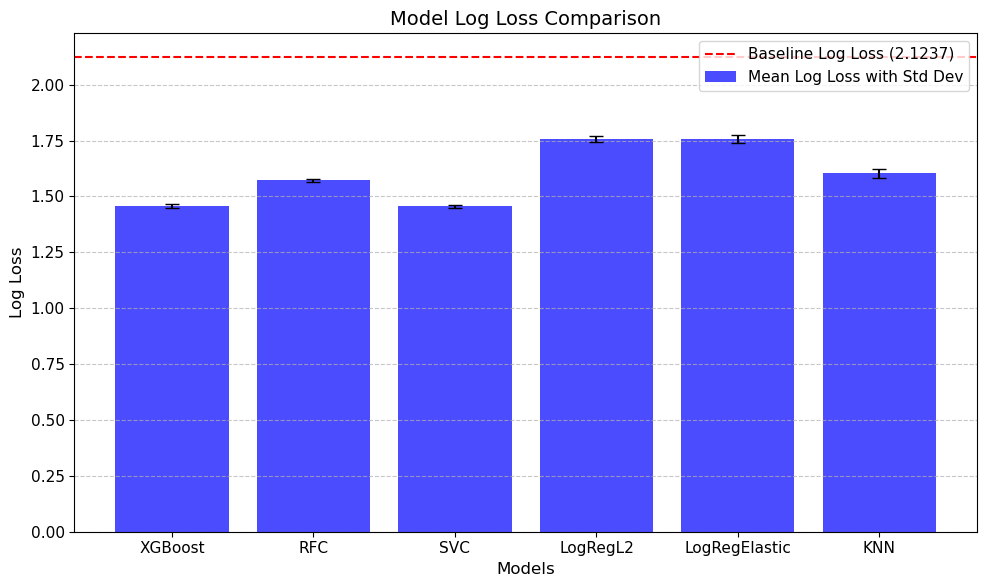

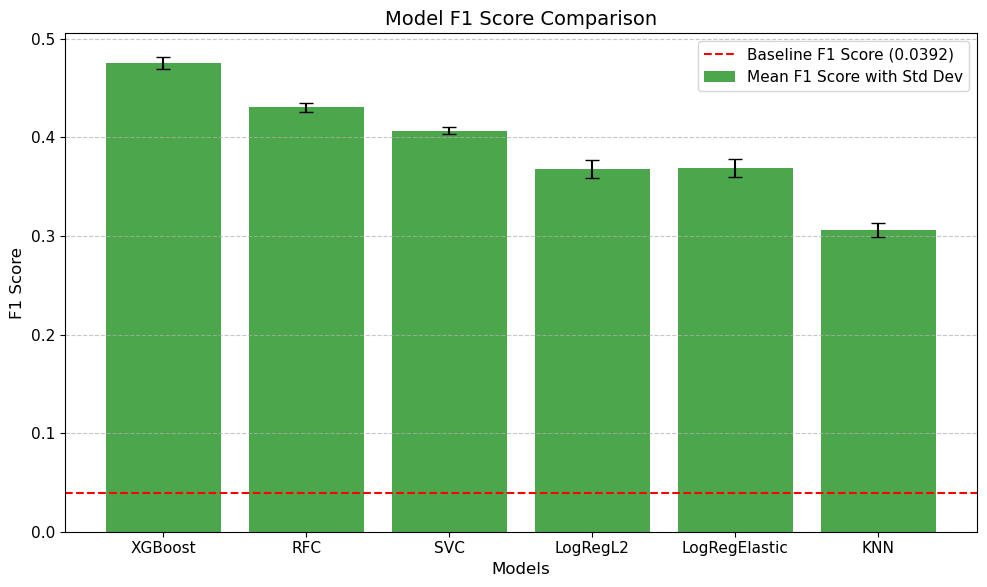

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Variables
models = ["XGBoost", "RFC", "SVC", "LogRegL2", "LogRegElastic", "KNN"]

mean_logloss = [1.4568, 1.5728, 1.4553, 1.7569, 1.7570, 1.6041]
std_logloss = [0.0085, 0.0072, 0.0071, 0.0153, 0.0158, 0.0210]

mean_f1 = [0.4755, 0.4305, 0.4066, 0.3683, 0.3686, 0.3061]
std_f1 = [0.0060, 0.0048, 0.0035, 0.0090, 0.0091, 0.0069]

baseline_logloss = 2.1237
baseline_f1 = 0.0392

# Plot Log Loss
plt.figure(figsize=(10, 6))
x_positions = np.arange(len(models))
plt.bar(x_positions, mean_logloss, yerr=std_logloss, capsize=5, color='blue', alpha=0.7, label='Mean Log Loss with Std Dev')
plt.axhline(y=baseline_logloss, color='red', linestyle='--', label=f'Baseline Log Loss ({baseline_logloss})')
plt.xticks(x_positions, models)
plt.title('Model Log Loss Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Log Loss', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot F1 Score
plt.figure(figsize=(10, 6))
plt.bar(x_positions, mean_f1, yerr=std_f1, capsize=5, color='green', alpha=0.7, label='Mean F1 Score with Std Dev')
plt.axhline(y=baseline_f1, color='red', linestyle='--', label=f'Baseline F1 Score ({baseline_f1})')
plt.xticks(x_positions, models)
plt.title('Model F1 Score Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()